# Micro Credit Defaulter Project

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Micro Credit.csv')

In [3]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [4]:
df.shape

(209593, 37)

In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [7]:
df.drop(['pcircle', 'Unnamed: 0'], axis = 1, inplace = True)

In [8]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

In [9]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

In [10]:
col1 = ['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30']
col2 = ['fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']

In [11]:
df[col1].describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30  
count         209593.000000  209593.000000  
mean              92.025541     262.578110  
std              369.215658    4183.897978  
min             -200.000000       0.000000  
25%               14.600000       0.000000  
50%               36.000000       0.000000  
75%               79.310000       0.000000  
max            41456.500000   99914.441420

In [12]:
df[col2].describe()

fr_da_rech30  cnt_da_rech90   fr_da_rech90    cnt_loans30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean     3749.494447       0.041495       0.045712       2.758981   
std     53885.414979       0.397556       0.951386       2.554502   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       2.000000   
75%         0.000000       0.000000       0.000000       4.000000   
max    999809.240107      38.000000      64.000000      50.000000   

        amnt_loans30  maxamnt_loans30  medianamnt_loans30    cnt_loans90  \
count  209593.000000    209593.000000       209593.000000  209593.000000   
mean       17.952021       274.658747            0.054029      18.520919   
std        17.379741      4245.264648            0.218039     224.797423   
min         0.000000         0.000000            0.000000       0.000000   
25%         6.000000         6.000000            0.000000       1.000000   
50%        12.000000         6.000000            0.000000       2.000000   
75%        24.000000         6.000000            0.000000       5.000000   
max       306.000000     99864.560864            3.000000    4997.517944   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90      payback30  \
count  209593.000000    209593.000000       209593.000000  209593.000000   
mean       23.645398         6.703134            0.046077       3.398826   
std        26.469861         2.103864            0.200692       8.813729   
min         0.000000         0.000000            0.000000       0.000000   
25%         6.000000         6.000000            0.000000       0.000000   
50%        12.000000         6.000000            0.000000       0.000000   
75%        30.000000         6.000000            0.000000       3.750000   
max       438.000000        12.000000            3.000000     171.500000   

           payback90  
count  209593.000000  
mean        4.321485  
std        10.308108  
min         0.000000  
25%         0.000000  
50%         1.666667  
75%         4.500000  
max       171.500000

# Checking and treating missing values

In [13]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

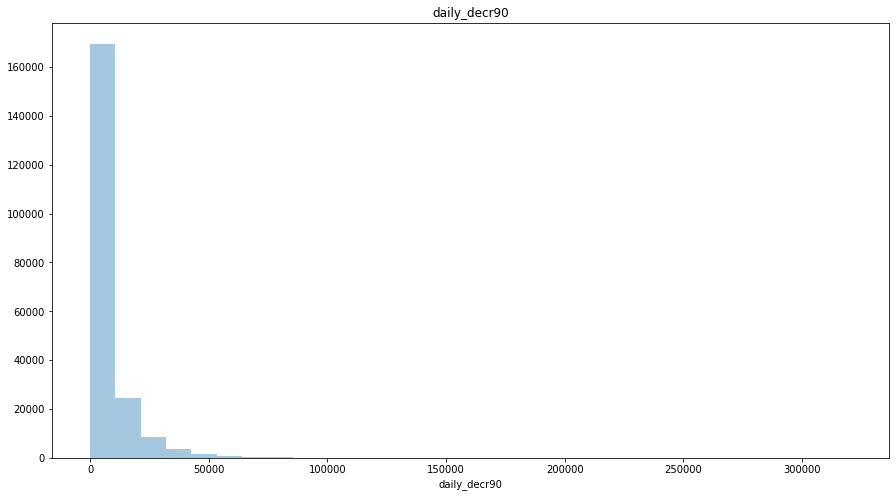

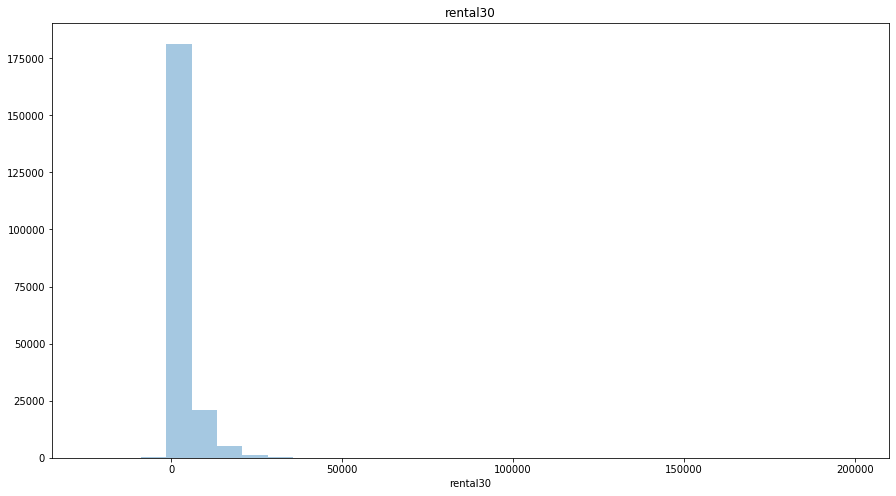

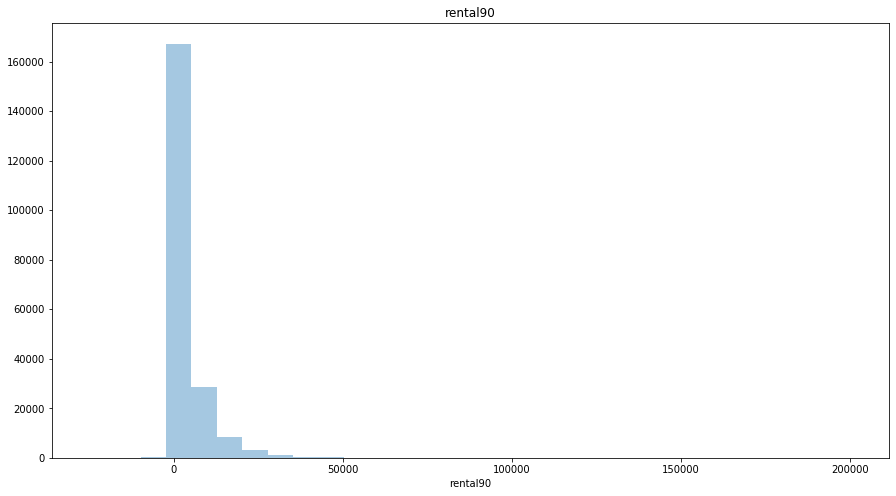

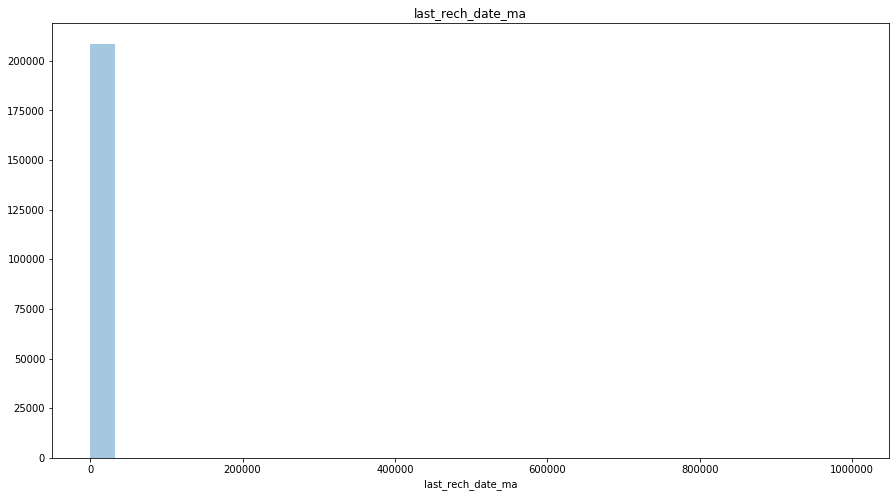

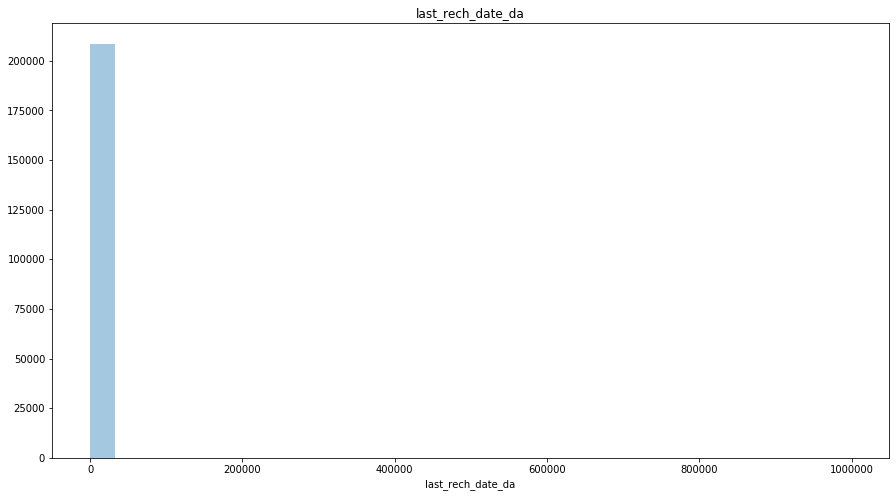

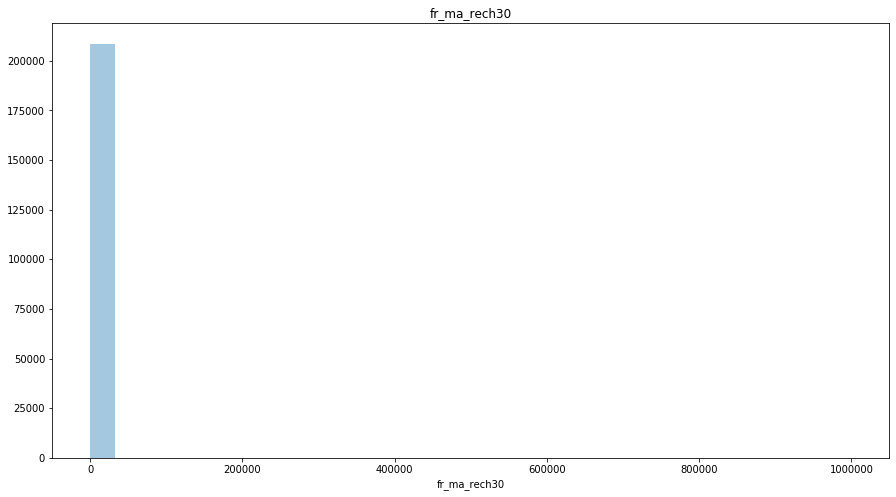

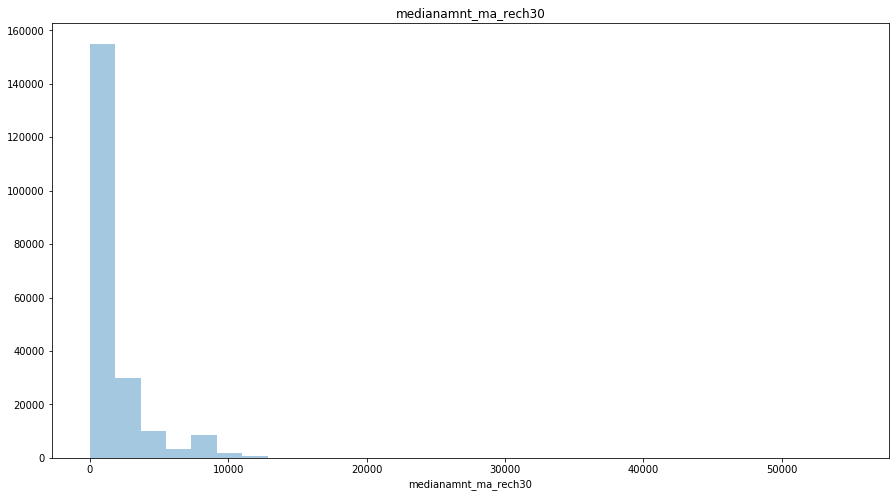

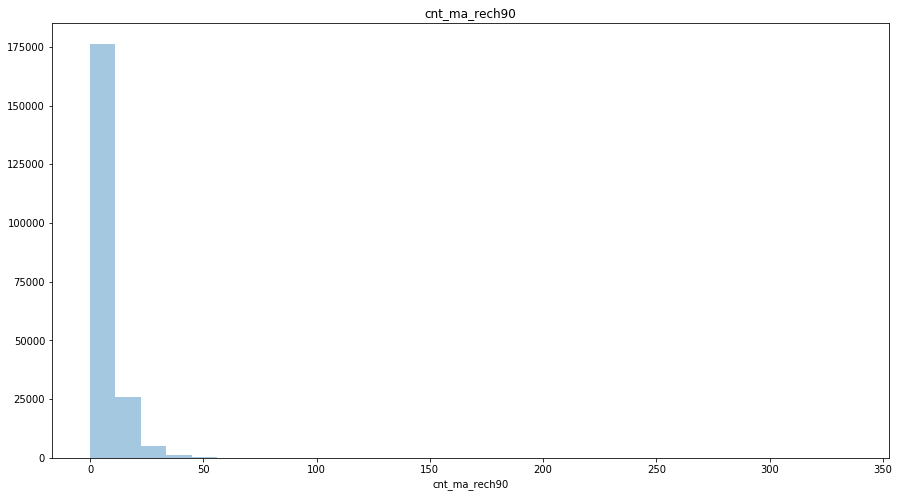

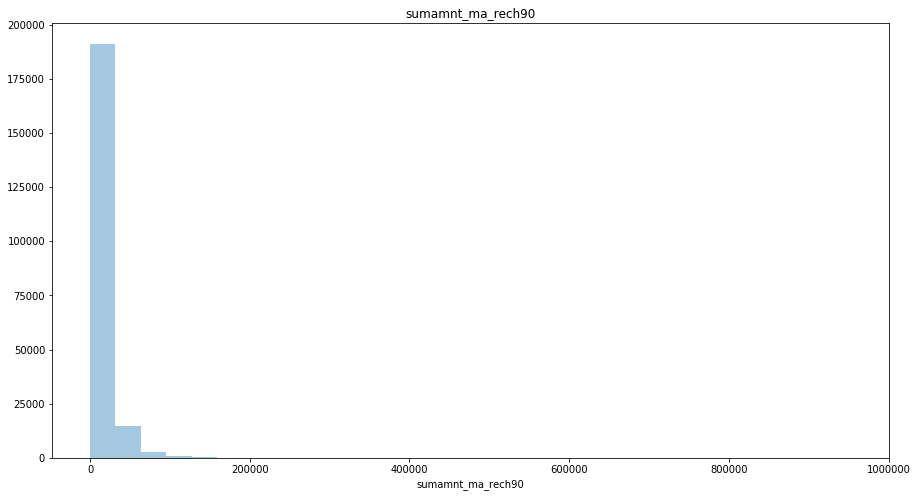

In [15]:
for i in df[col1]:
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 30, kde = False)
    plt.title(i)
    plt.show()

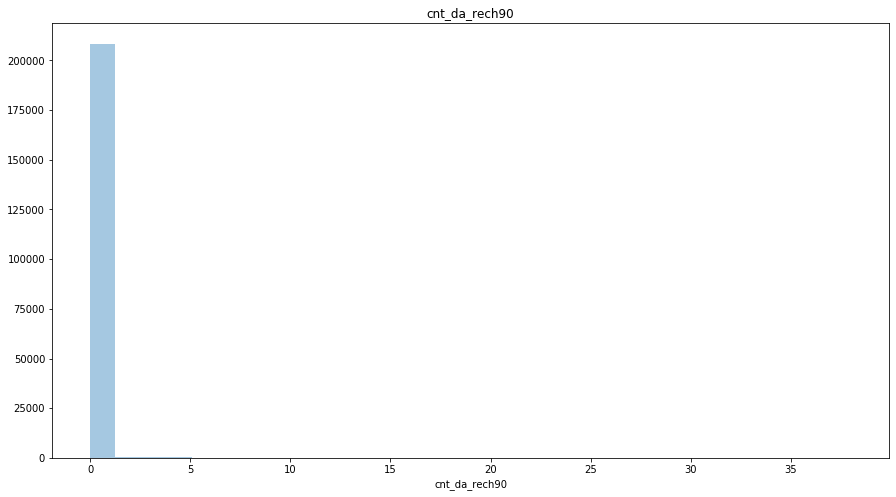

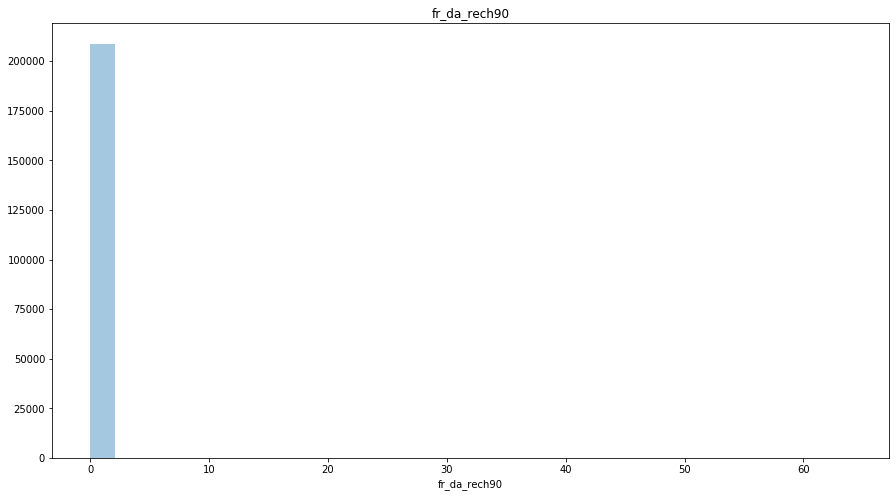

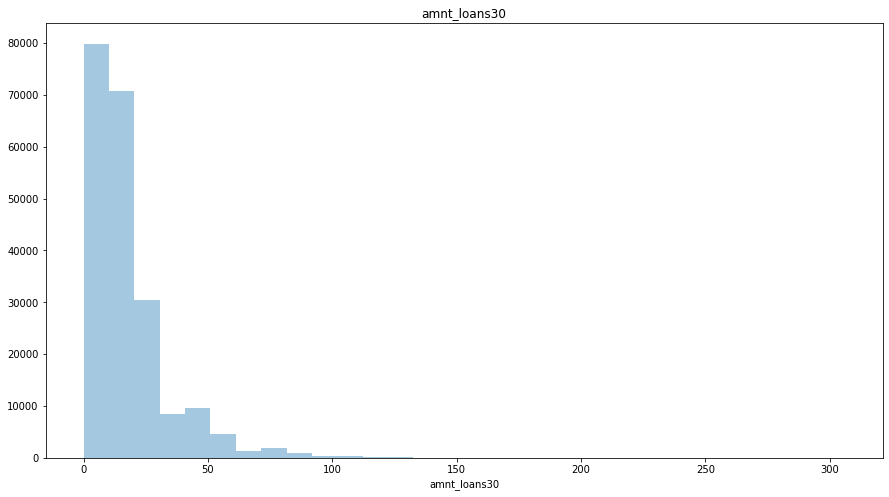

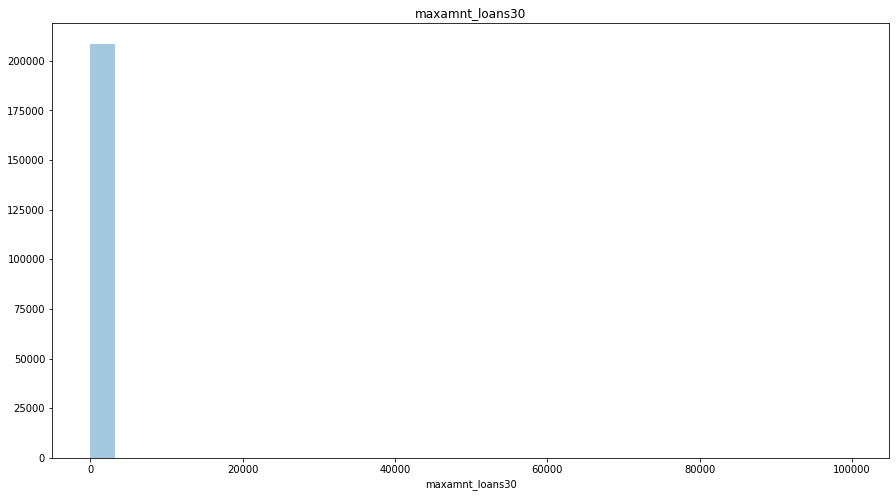

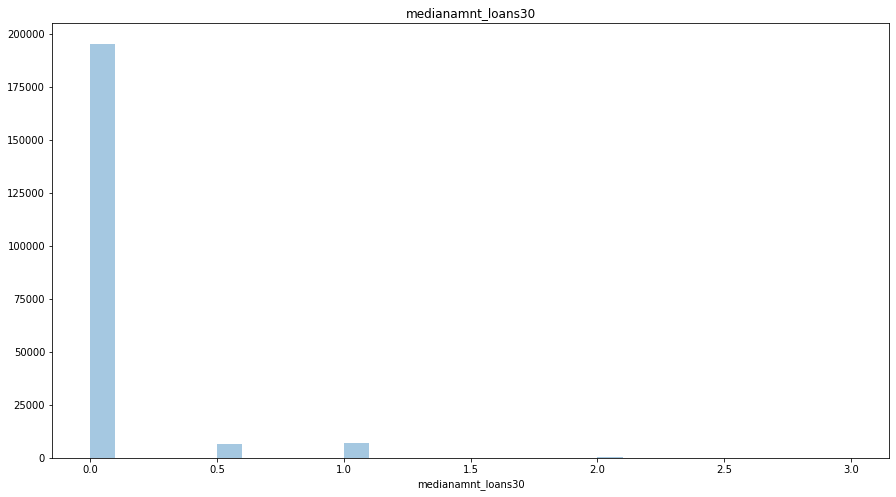

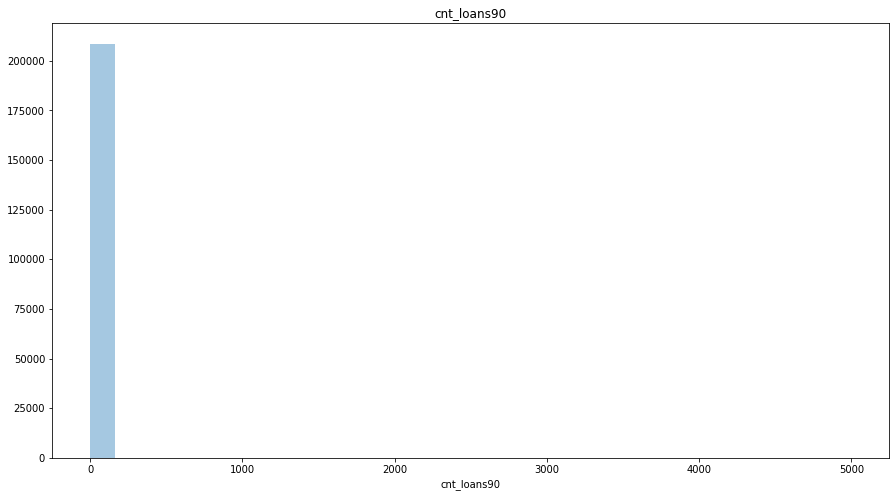

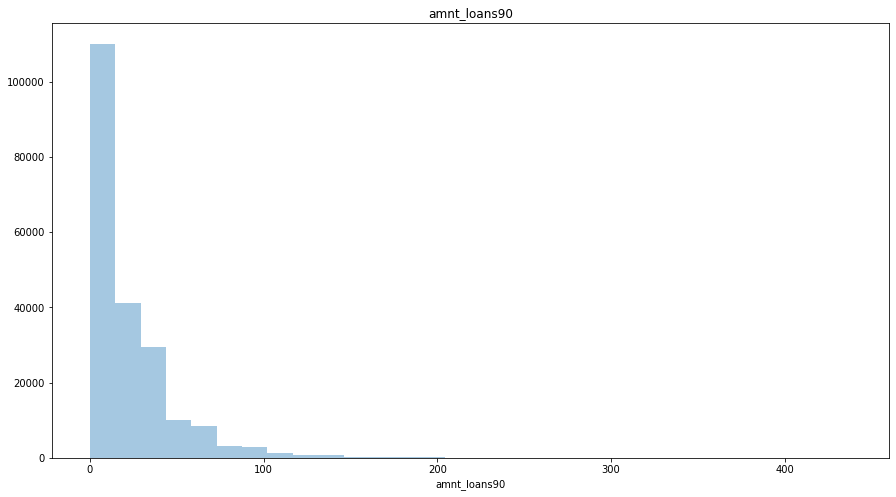

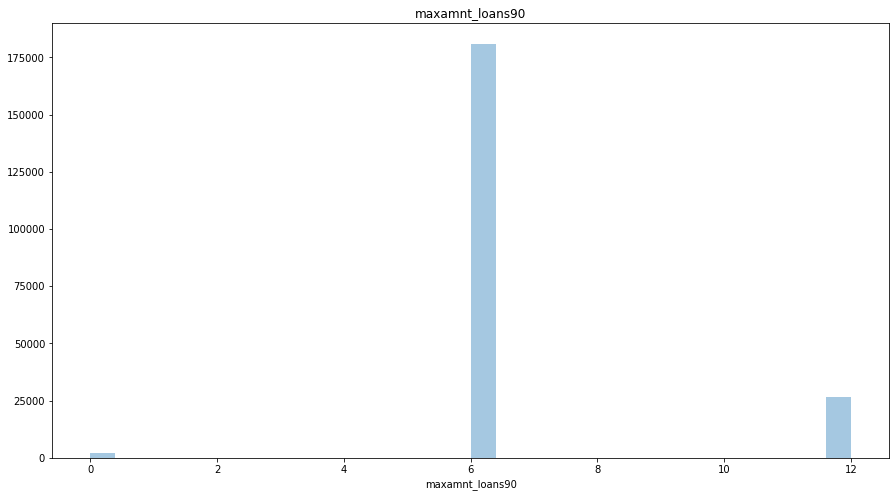

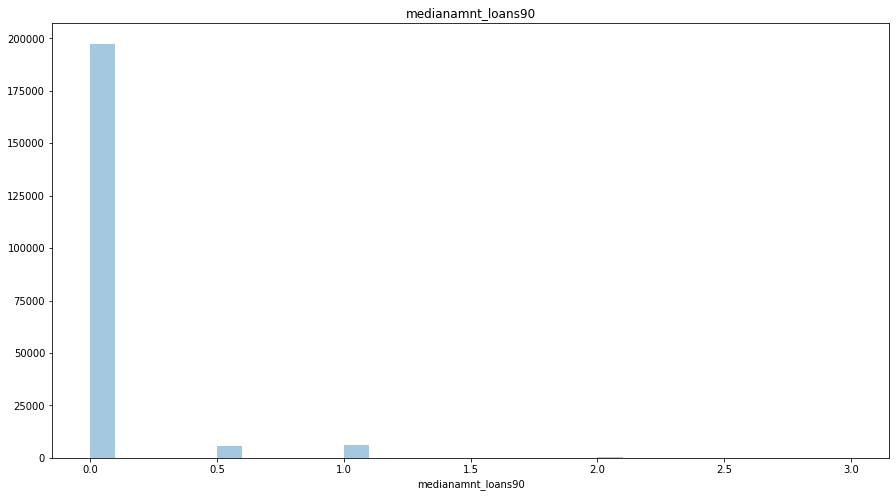

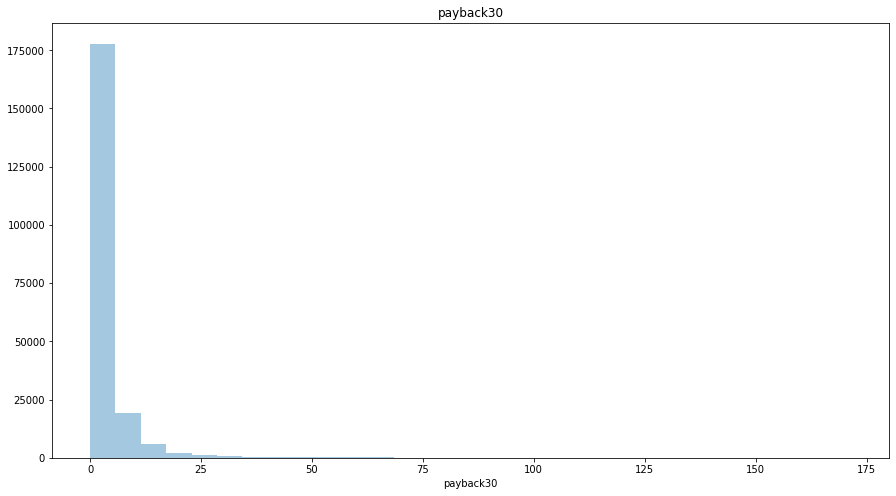

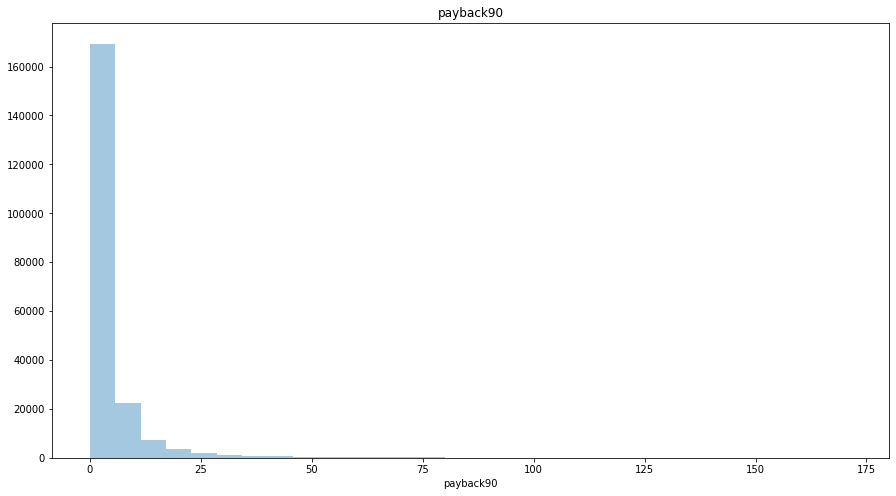

In [16]:
for i in df[col2]:
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 30, kde = False)
    plt.title(i)
    plt.show()

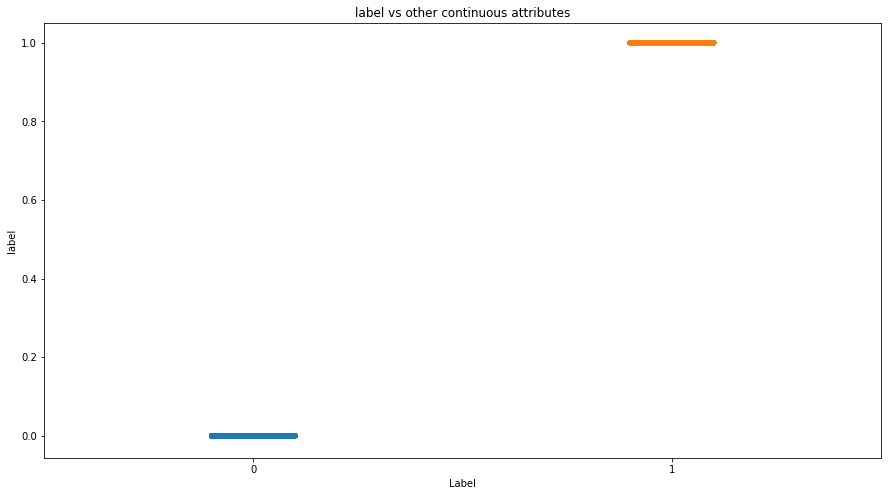

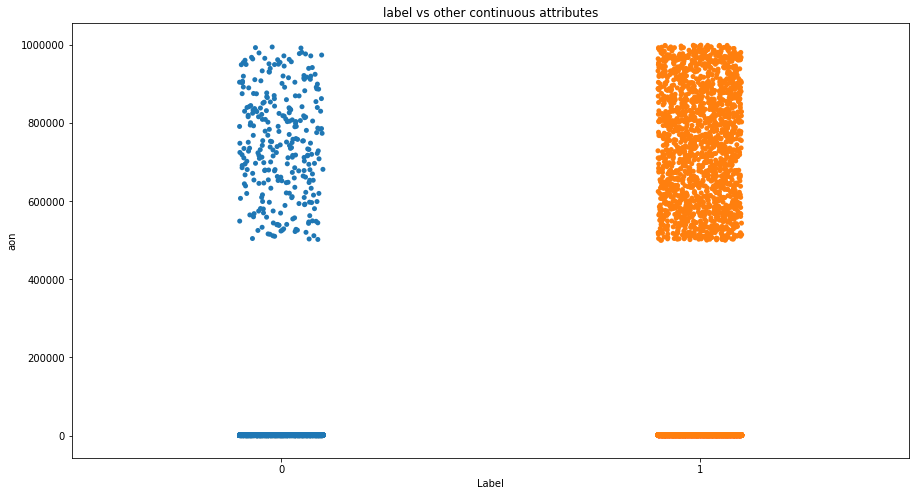

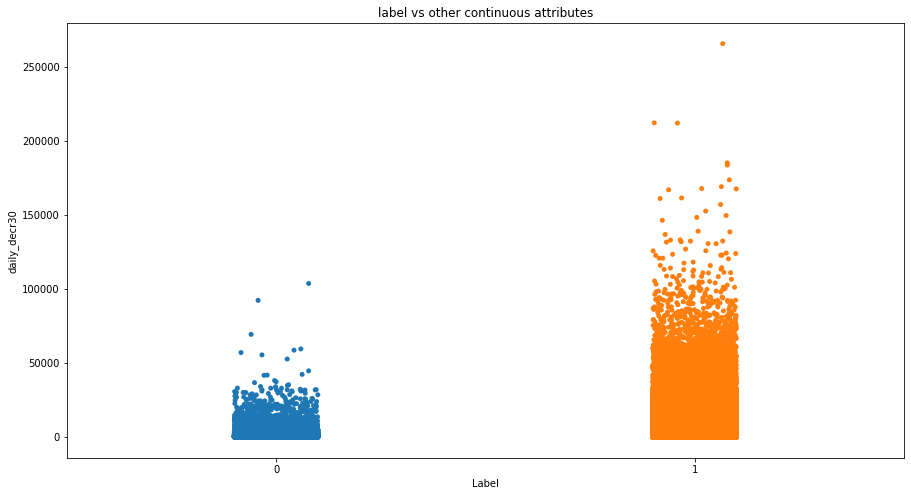

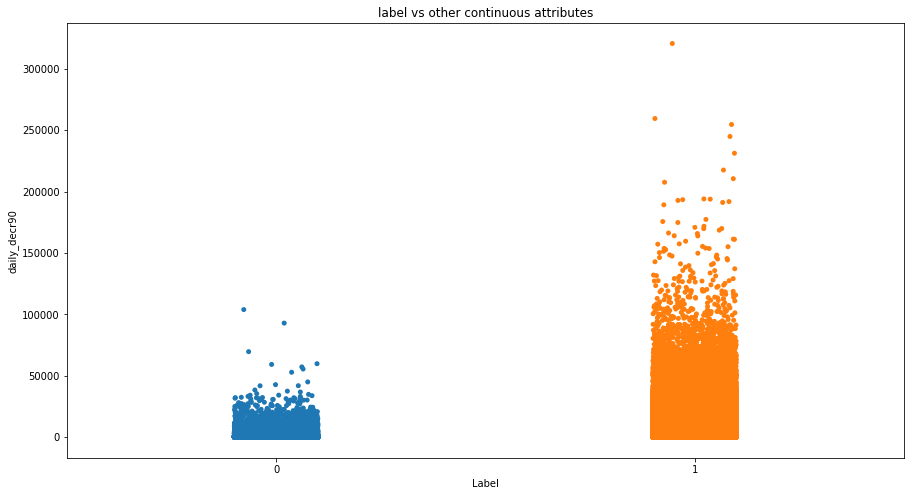

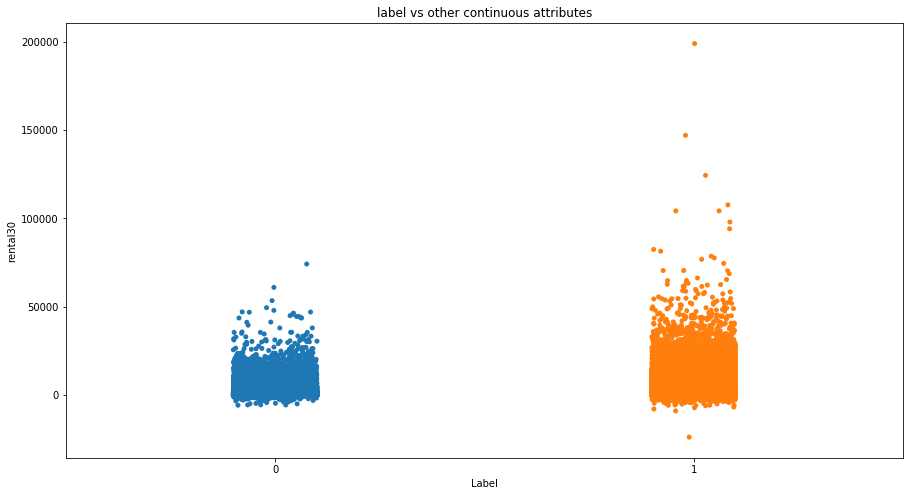

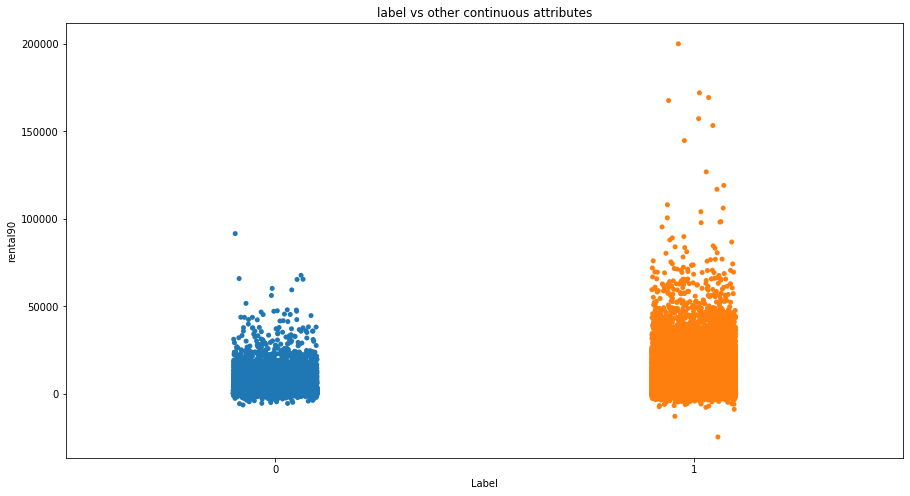

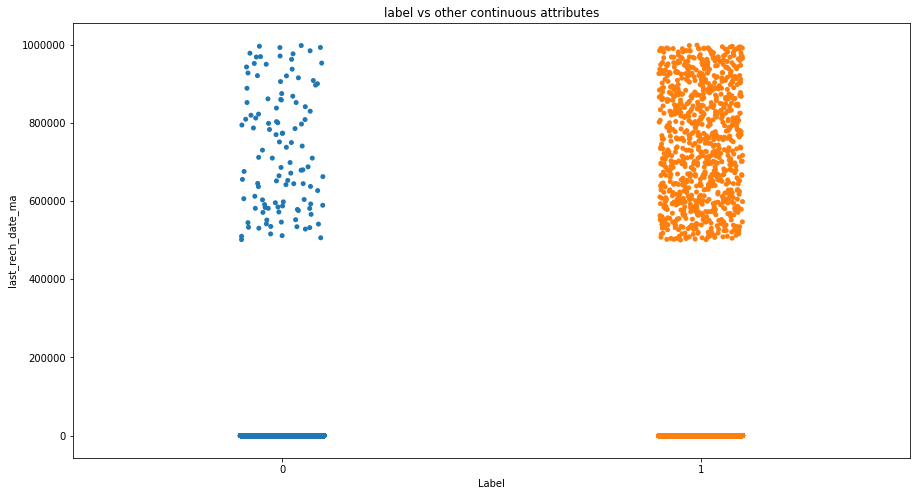

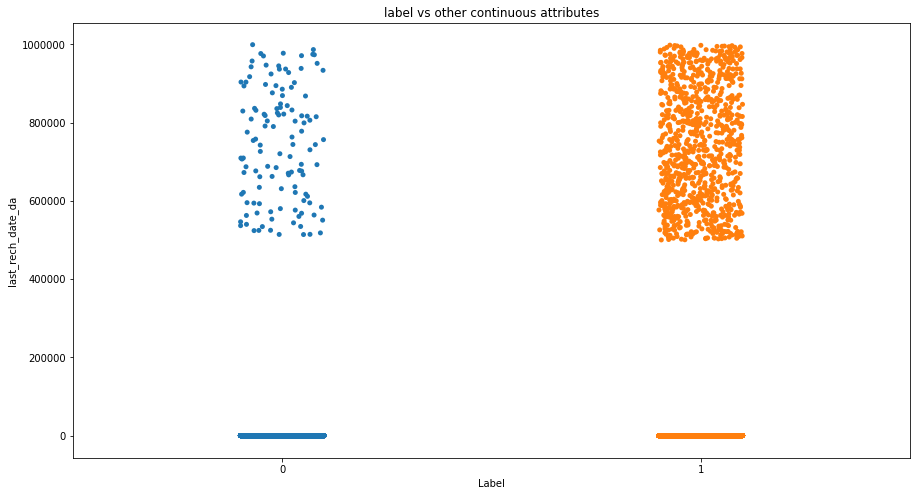

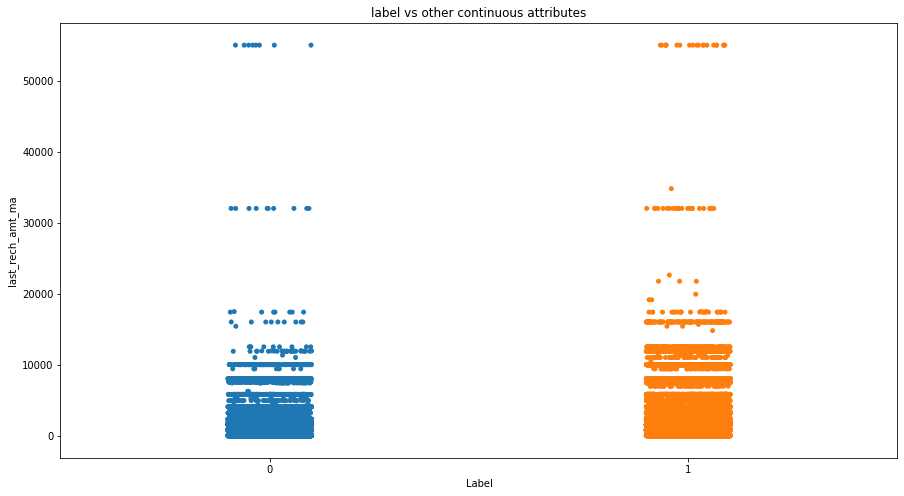

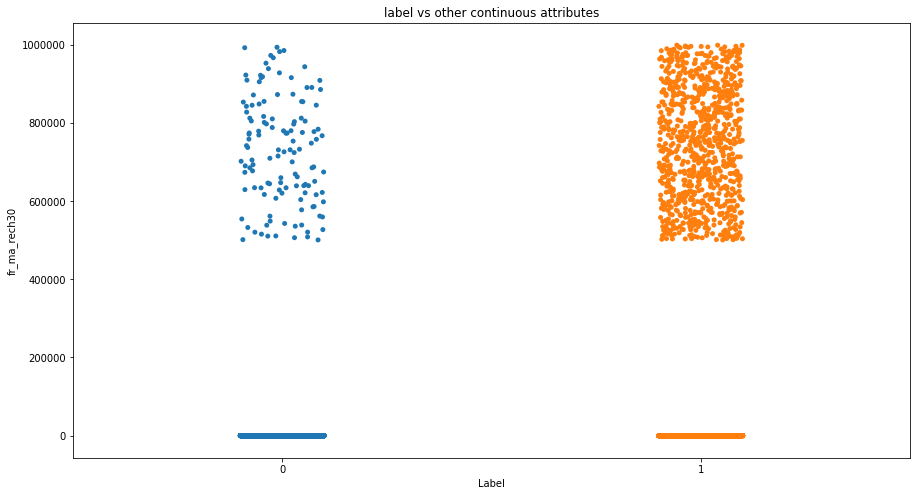

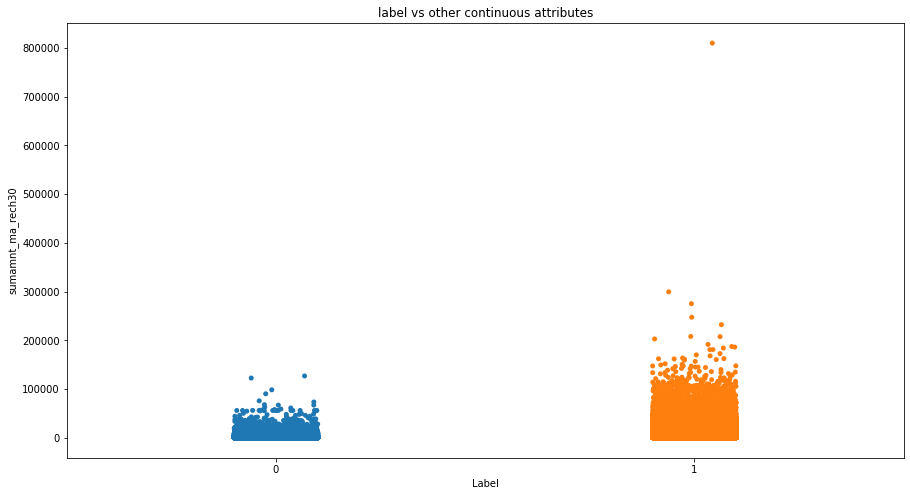

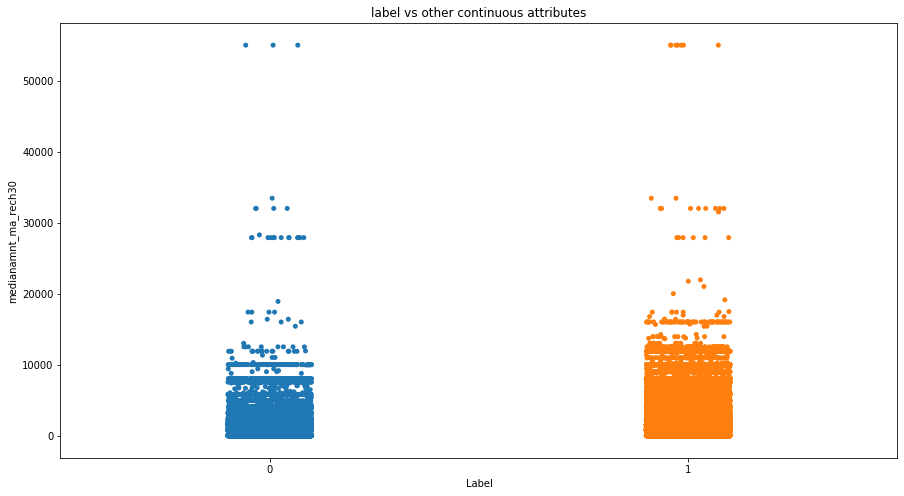

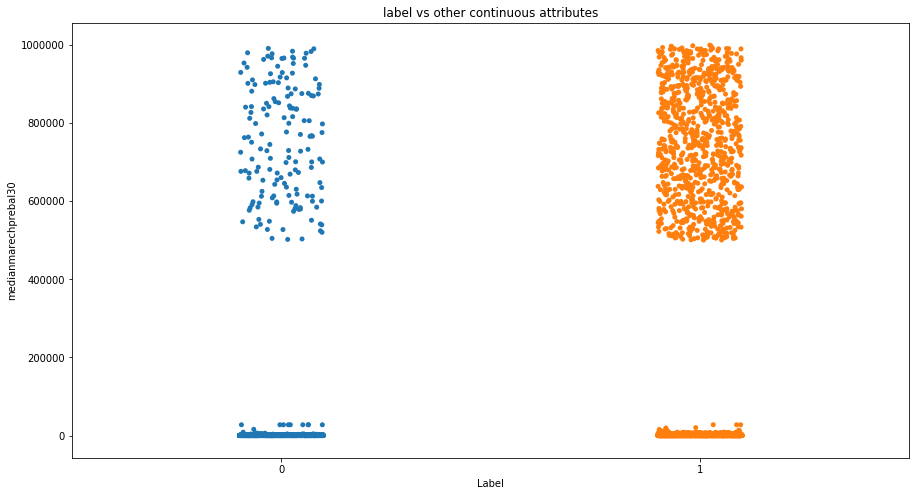

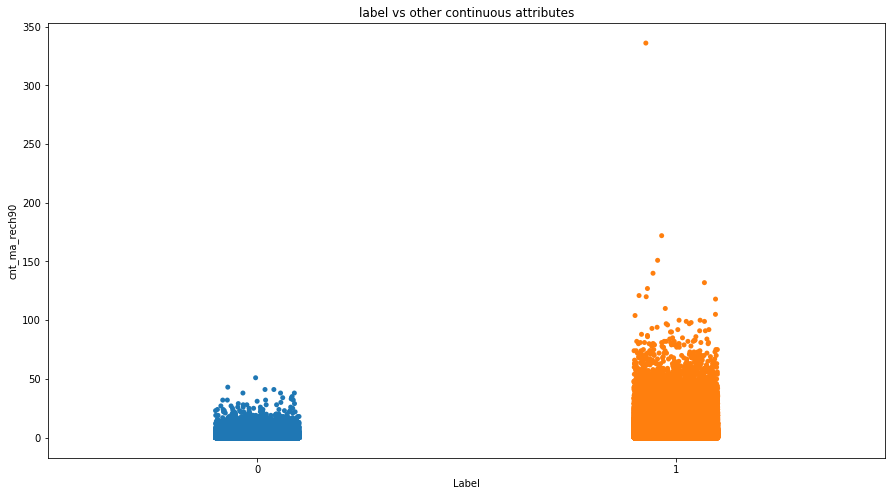

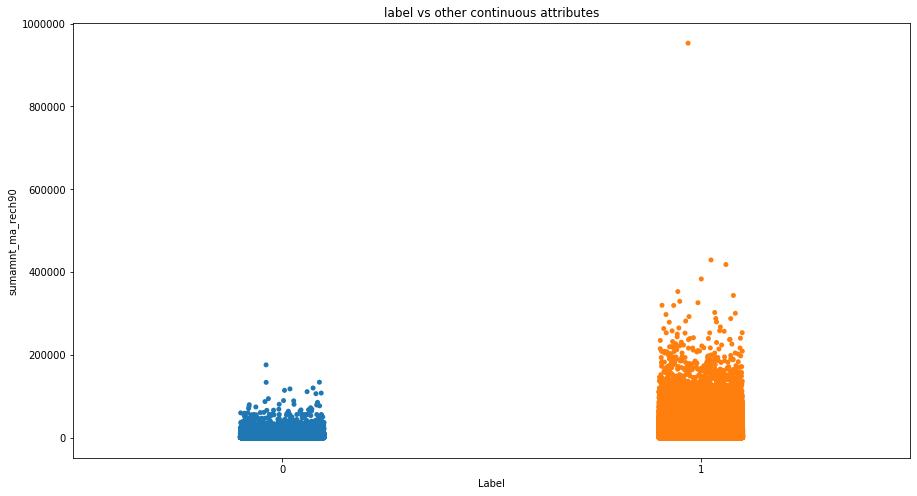

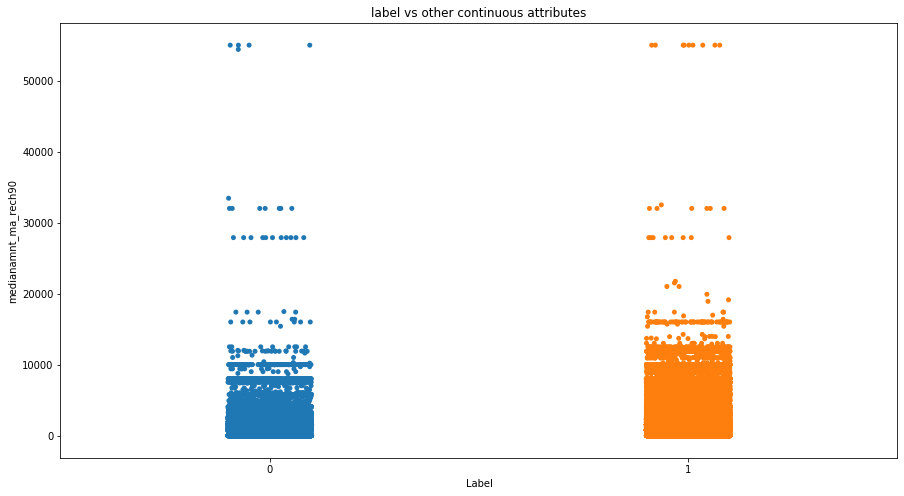

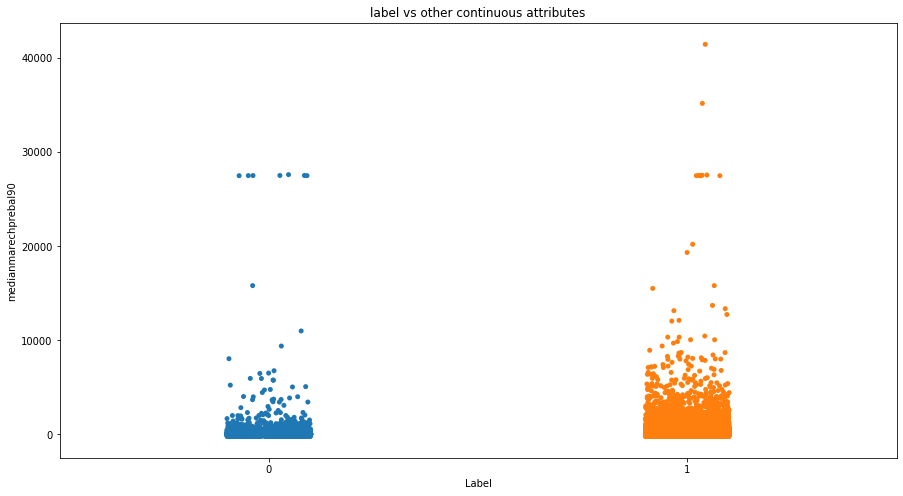

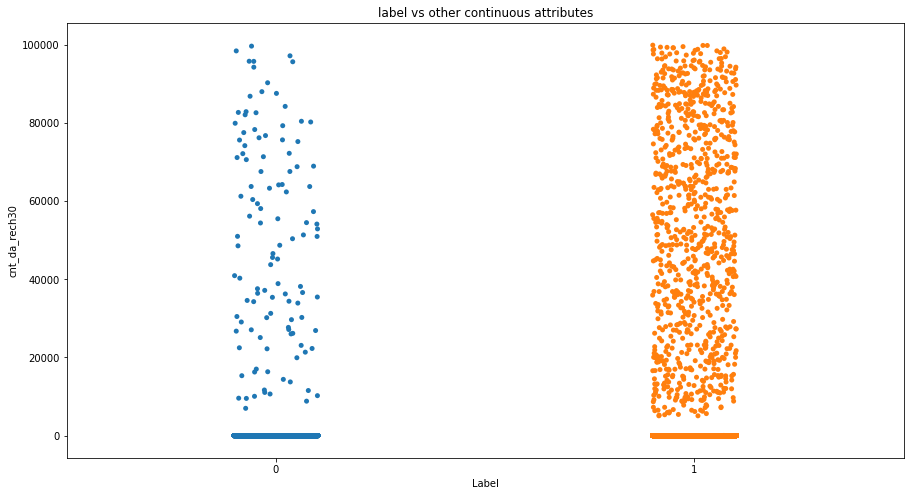

In [17]:
for i in col1:
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['label'], df[i])
    ax.set(xlabel = 'Label', ylabel = i)
    plt.title('label vs other continuous attributes')
    plt.show()

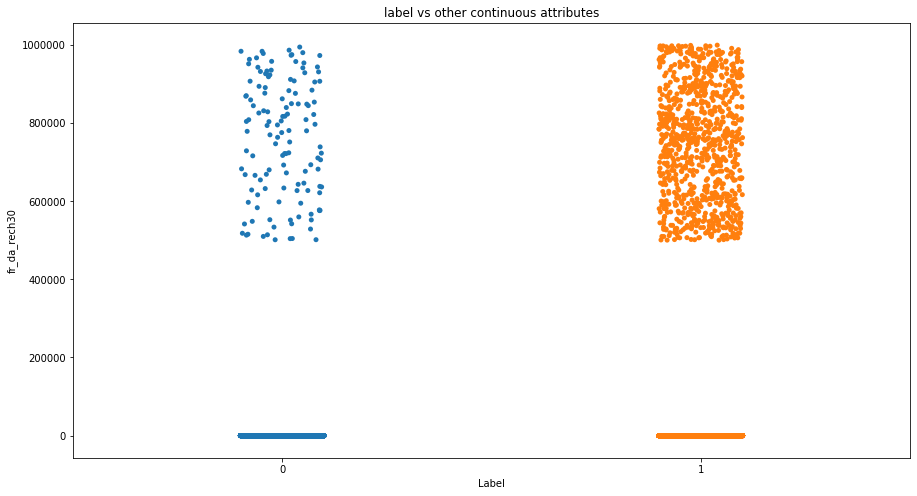

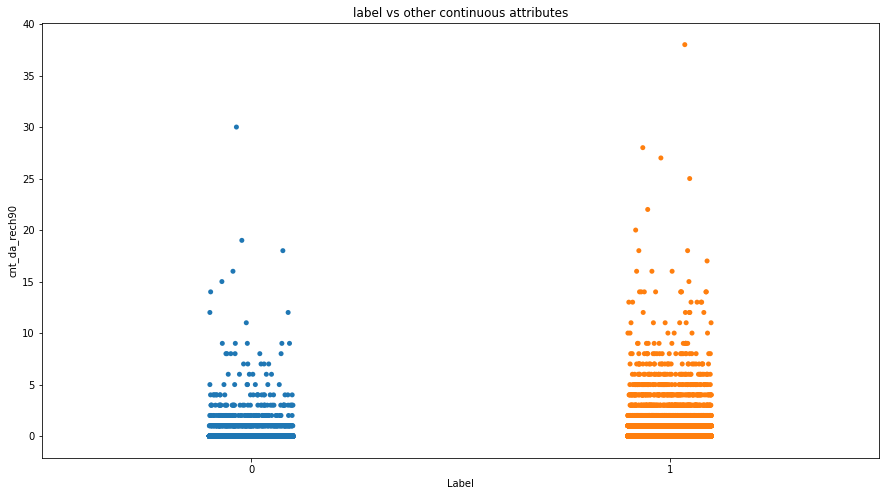

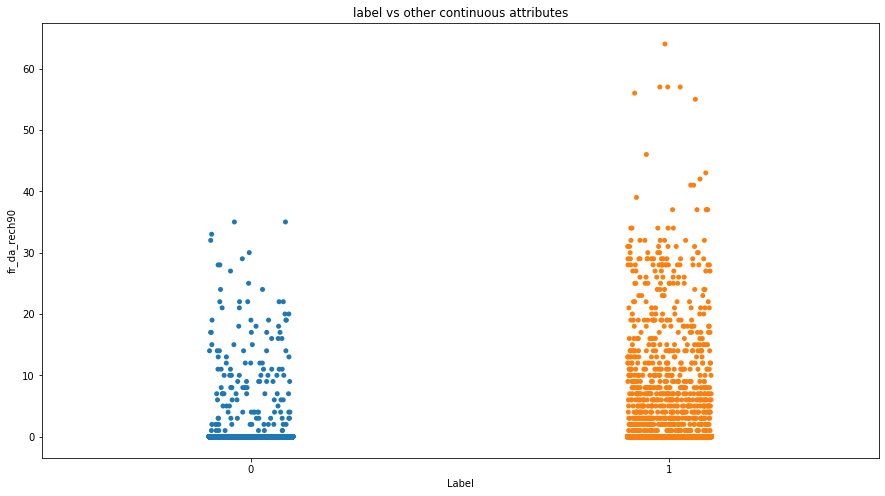

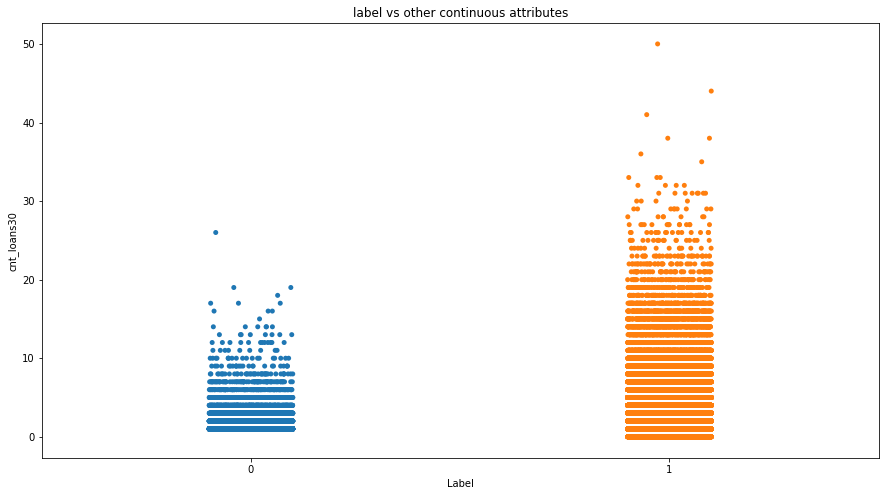

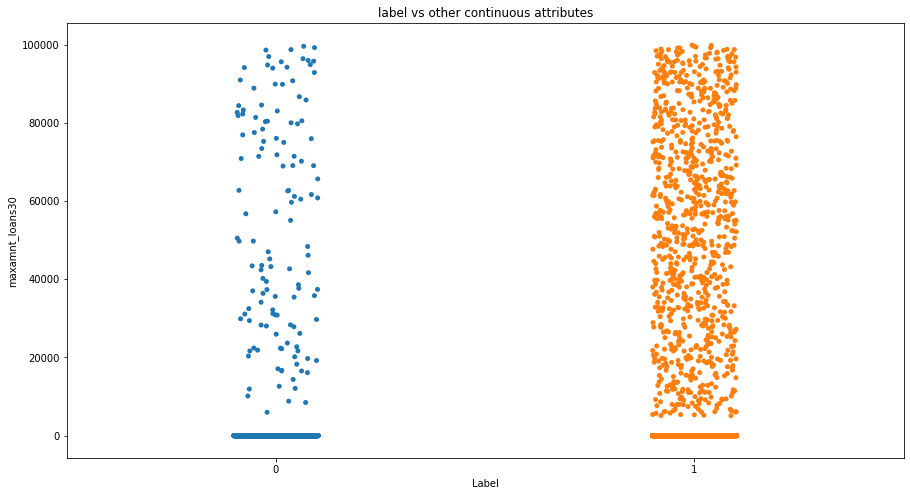

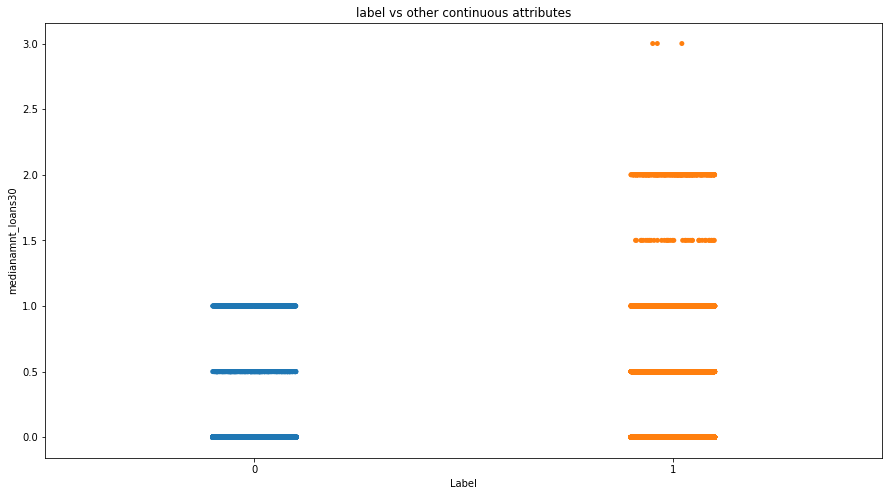

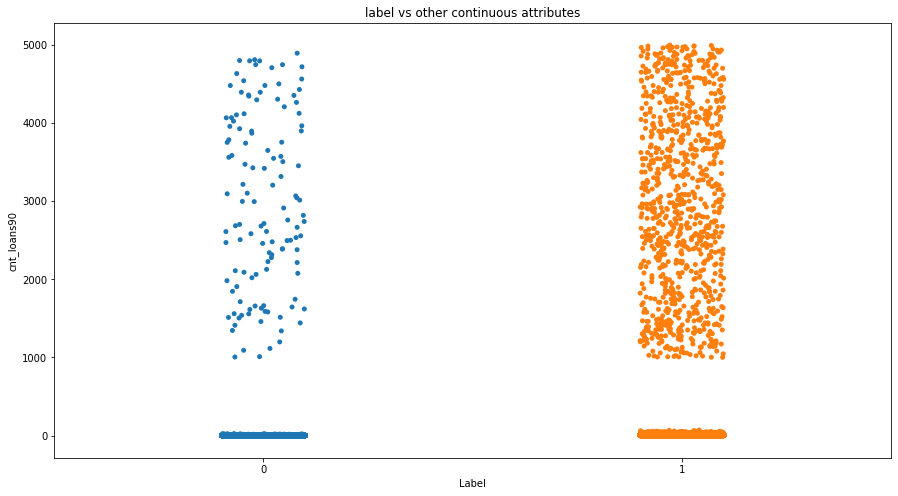

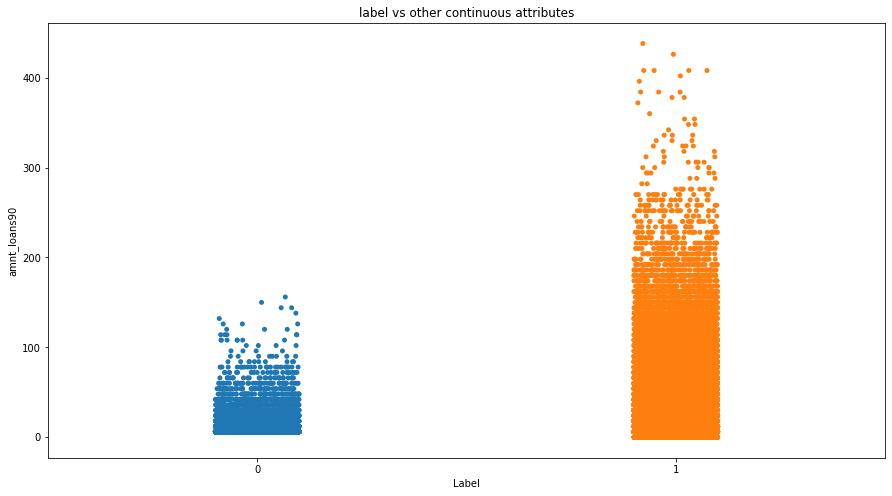

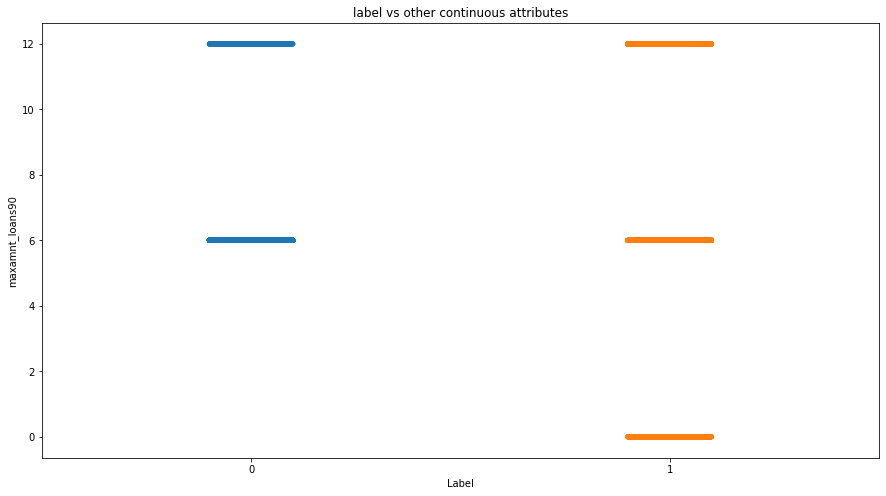

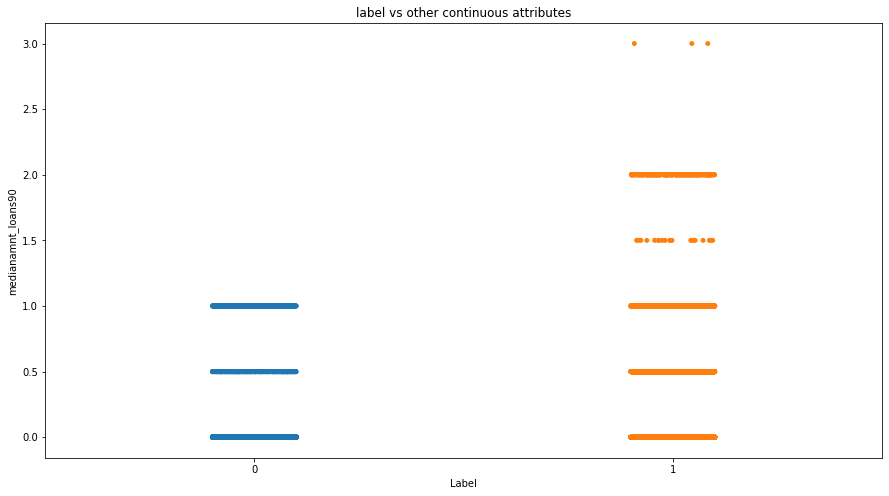

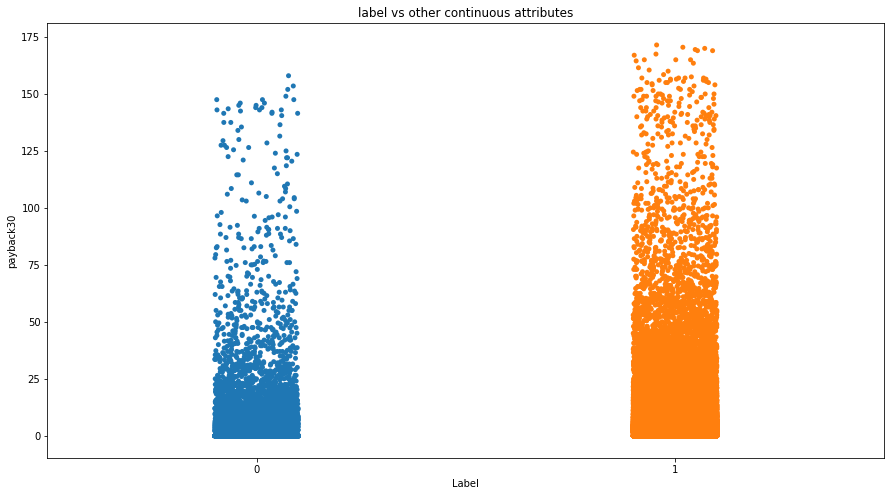

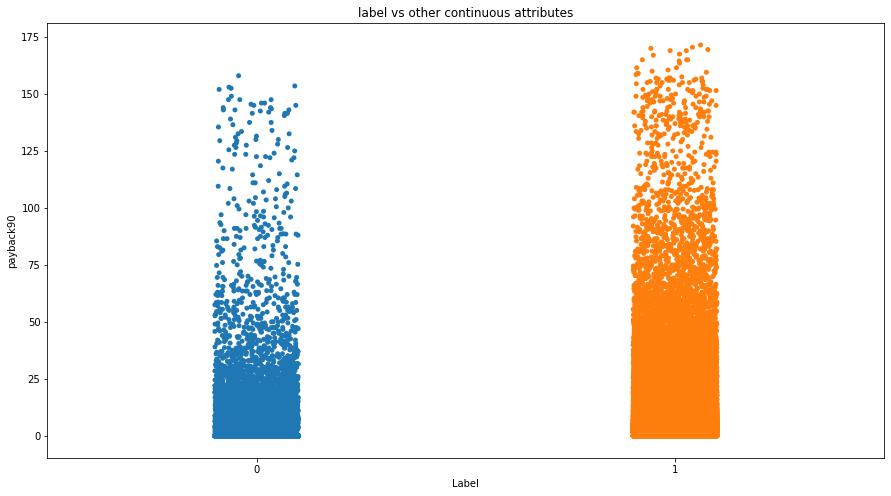

In [18]:
for i in col2:
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['label'], df[i])
    ax.set(xlabel = 'Label', ylabel = i)
    plt.title('label vs other continuous attributes')
    plt.show()

Text(0.5, 1.0, 'Label')

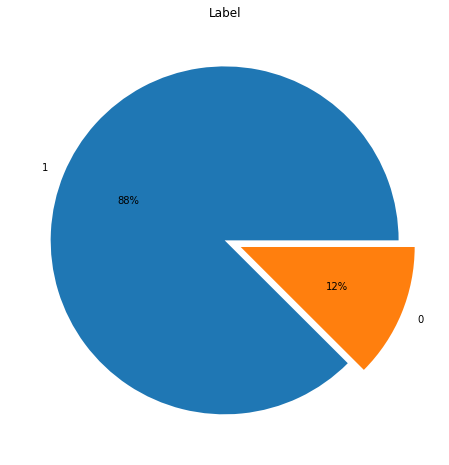

In [19]:
vals = [df.label[df.label == 1].count() , df.label[df.label == 0].count()]
plt.figure(figsize = (15, 8))
label = ["1" , "0"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1))
plt.title("Label")

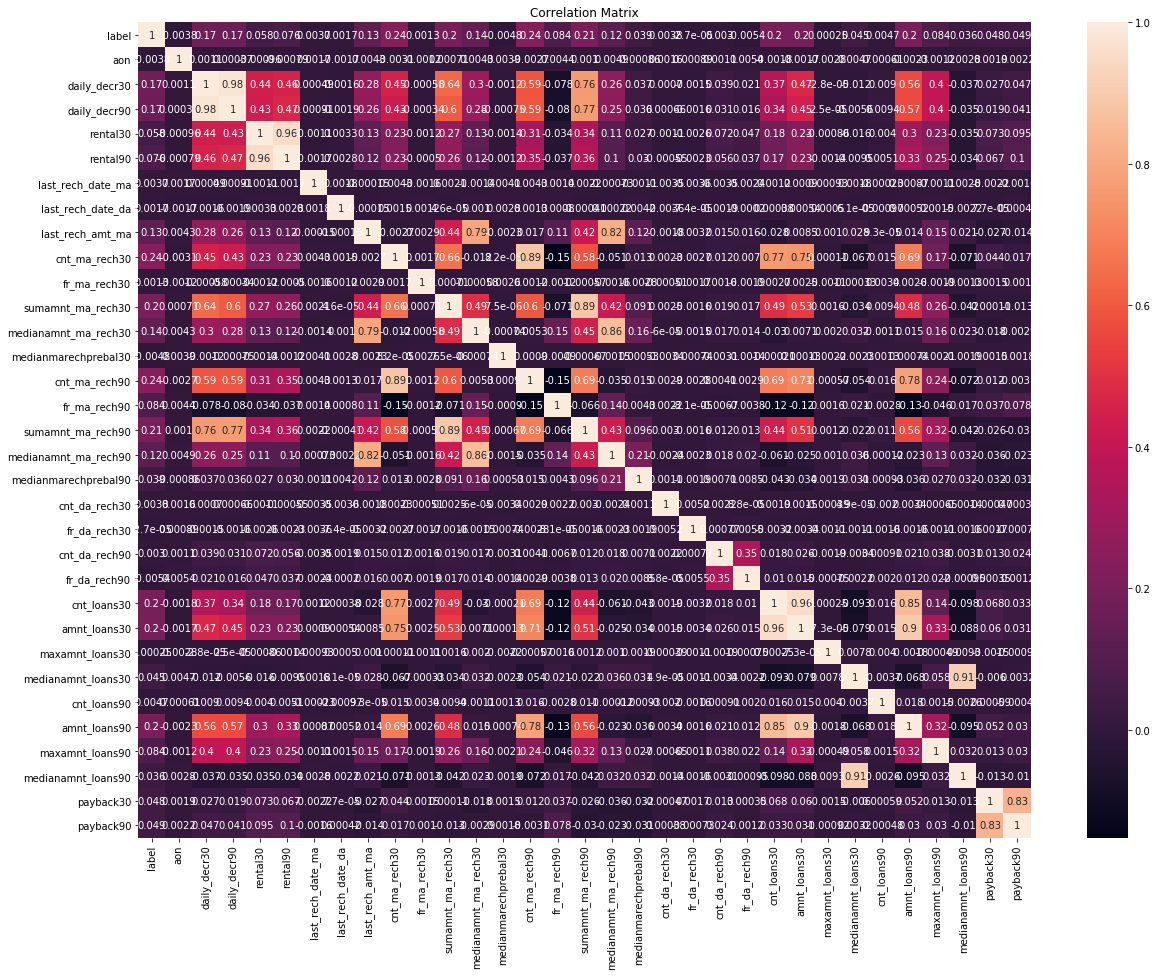

In [20]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

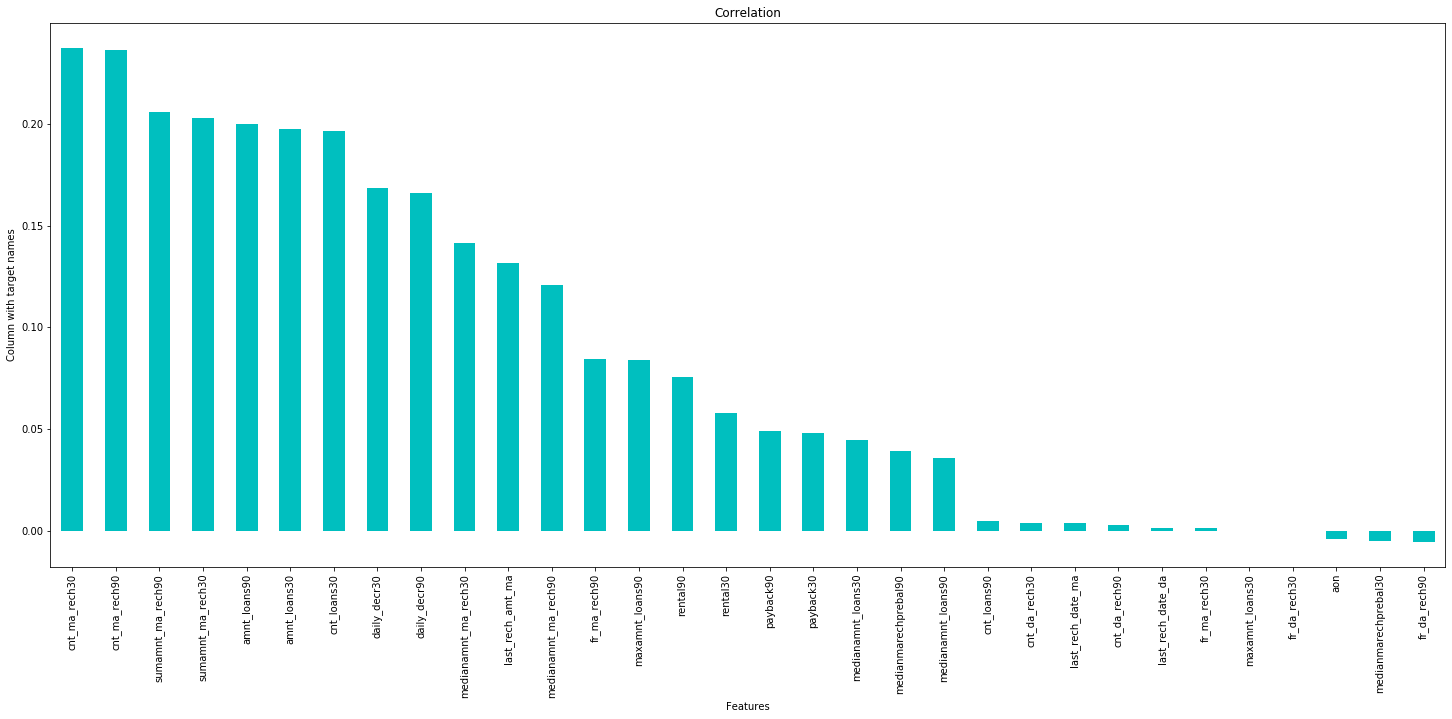

In [21]:
plt.figure(figsize = (25, 10))
df.corr()['label'].sort_values(ascending = False).drop(['label']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [22]:
df.drop(['msisdn', 'fr_da_rech30', 'cnt_loans90', 'cnt_da_rech30', 'last_rech_date_ma', 'cnt_da_rech90', 'last_rech_date_da', 'fr_ma_rech30',
         'maxamnt_loans30', 'aon', 'medianmarechprebal30', 'fr_da_rech90', 'pdate'], axis = 1, inplace = True)

In [23]:
df.head()

label  daily_decr30  daily_decr90  rental30  rental90  last_rech_amt_ma  \
0      0   3055.050000   3065.150000    220.13    260.13              1539   
1      1  12122.000000  12124.750000   3691.26   3691.26              5787   
2      1   1398.000000   1398.000000    900.13    900.13              1539   
3      1     21.228000     21.228000    159.42    159.42               947   
4      1    150.619333    150.619333   1098.90   1098.90              2309   

   cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  ...  \
0              2             3078.0                1539.0              2  ...   
1              1             5787.0                5787.0              1  ...   
2              1             1539.0                1539.0              1  ...   
3              0                0.0                   0.0              1  ...   
4              7            20029.0                2309.0              8  ...   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_loans30  amnt_loans30  \
0                1539.0                  7.50            2            12   
1                5787.0                 61.04            1            12   
2                1539.0                 66.32            1             6   
3                 947.0                  2.50            2            12   
4                2888.0                 35.00            7            42   

   medianamnt_loans30  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0                 0.0            12                6                 0.0   
1                 0.0            12               12                 0.0   
2                 0.0             6                6                 0.0   
3                 0.0            12                6                 0.0   
4                 0.0            42                6                 0.0   

   payback30  payback90  
0  29.000000  29.000000  
1   0.000000   0.000000  
2   0.000000   0.000000  
3   0.000000   0.000000  
4   2.333333   2.333333  

[5 rows x 22 columns]

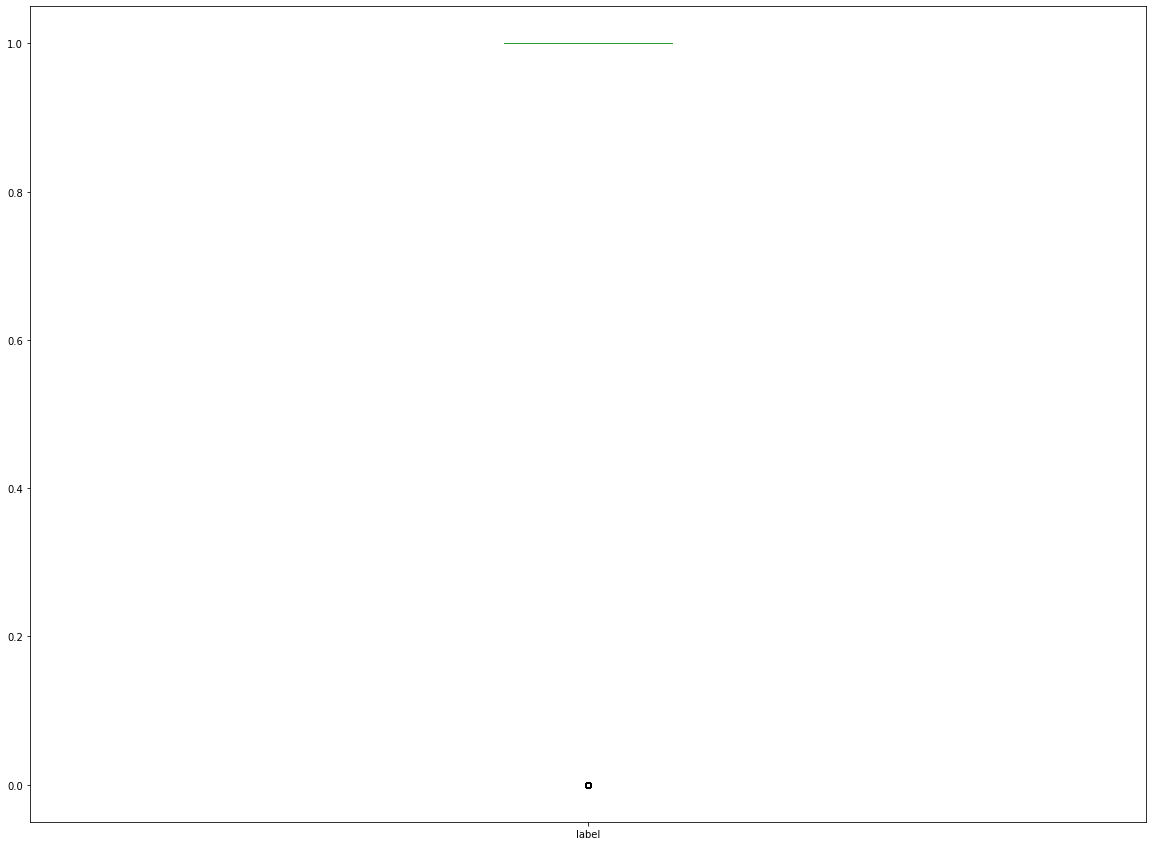

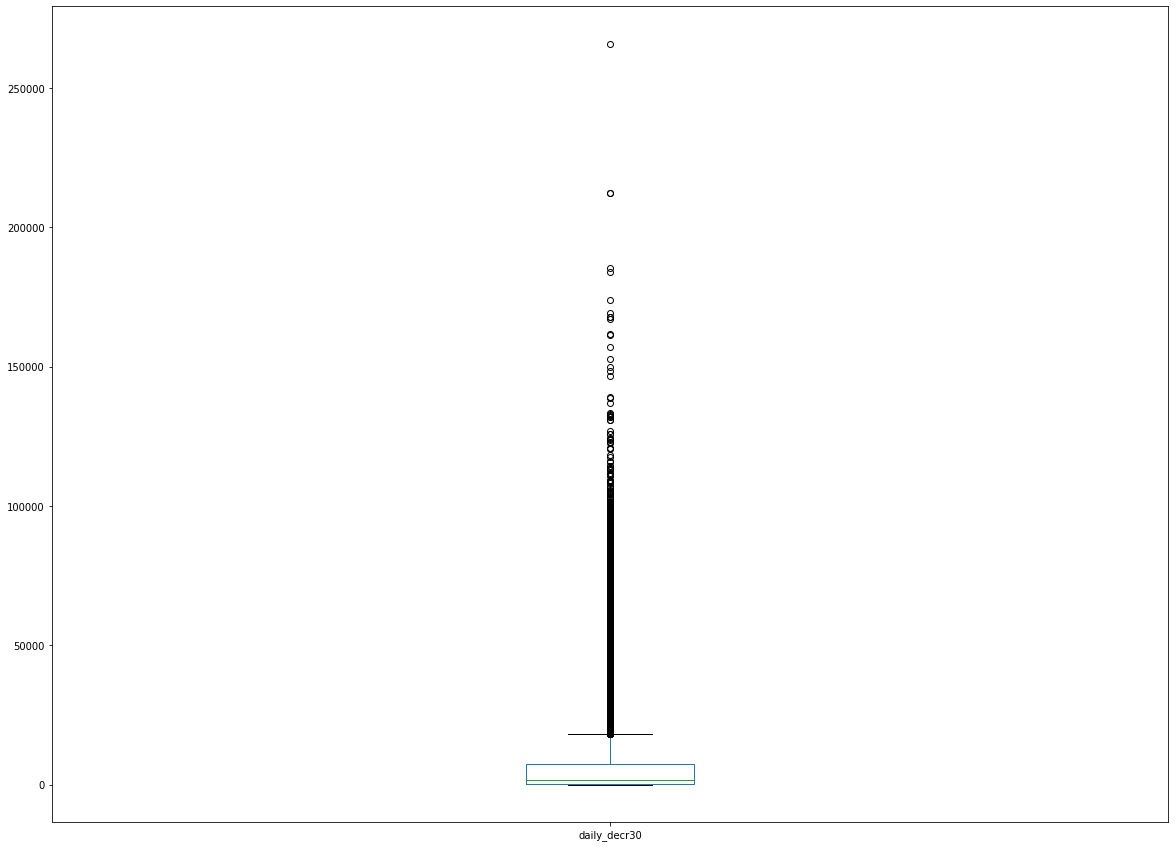

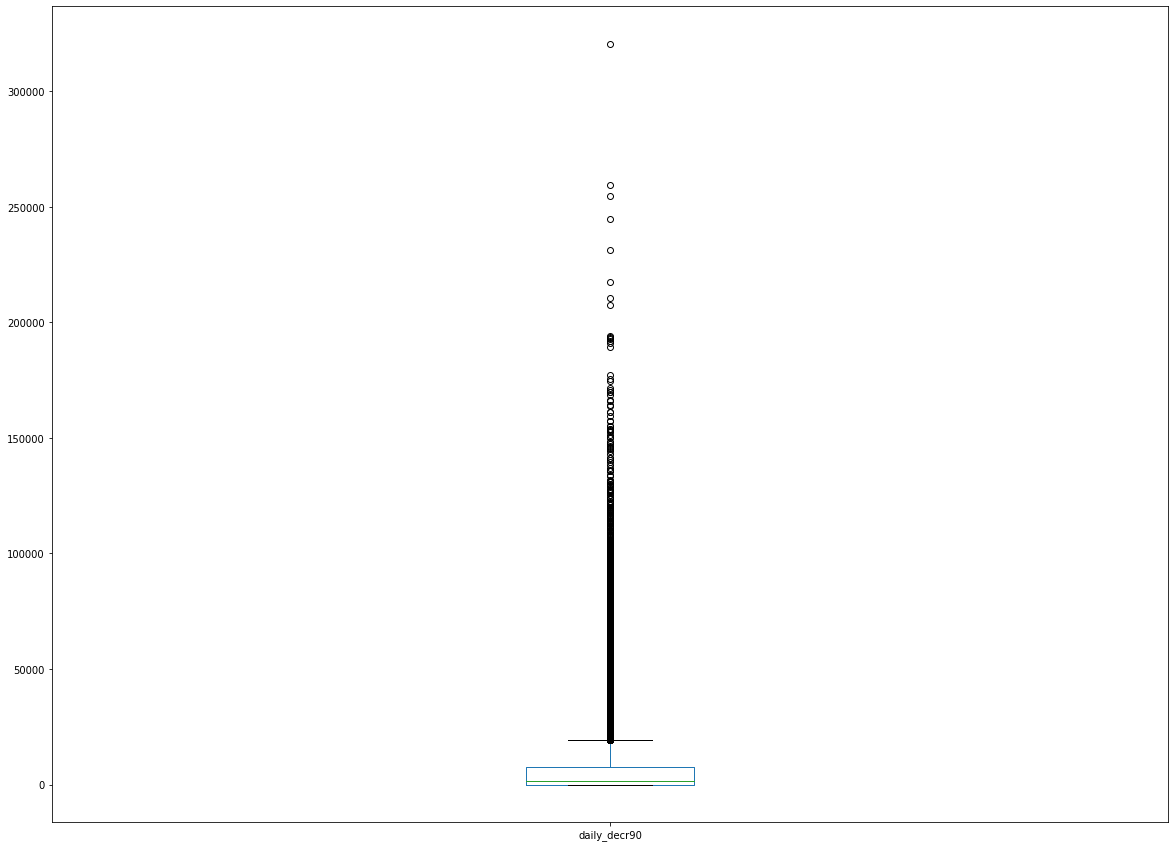

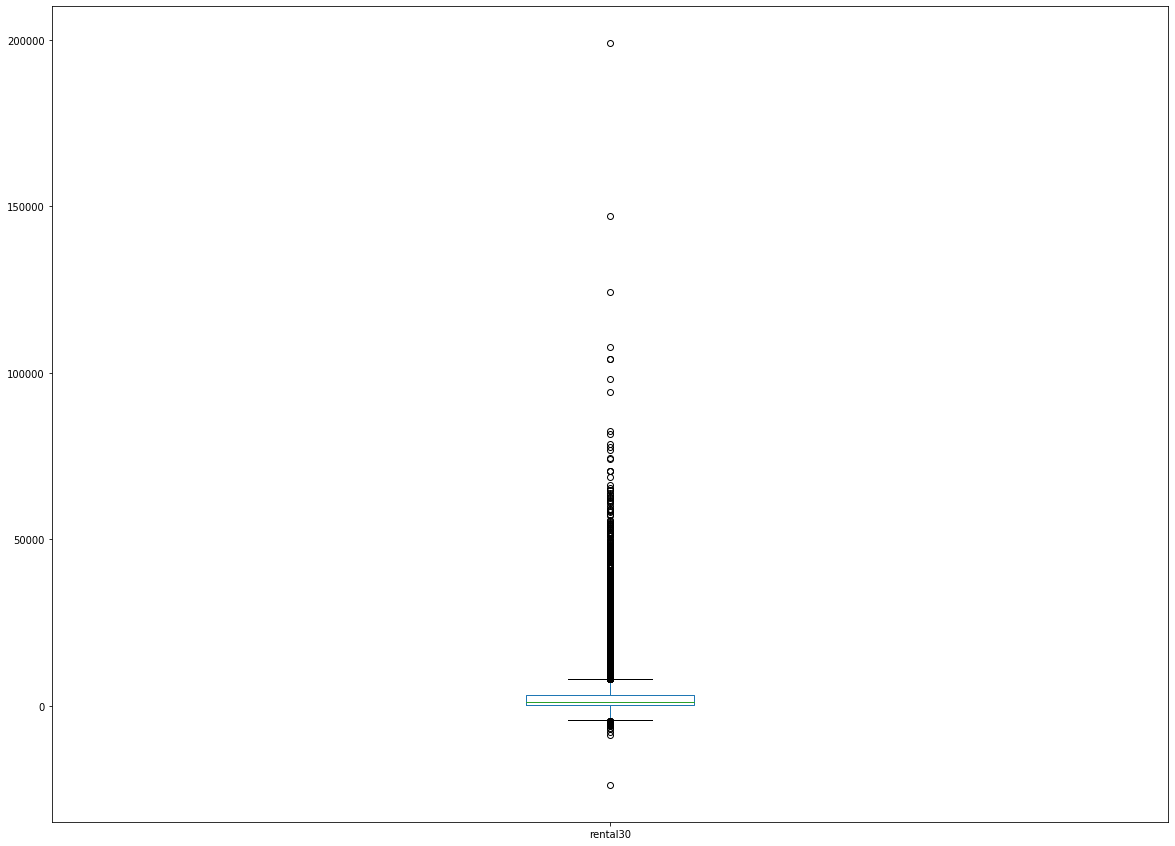

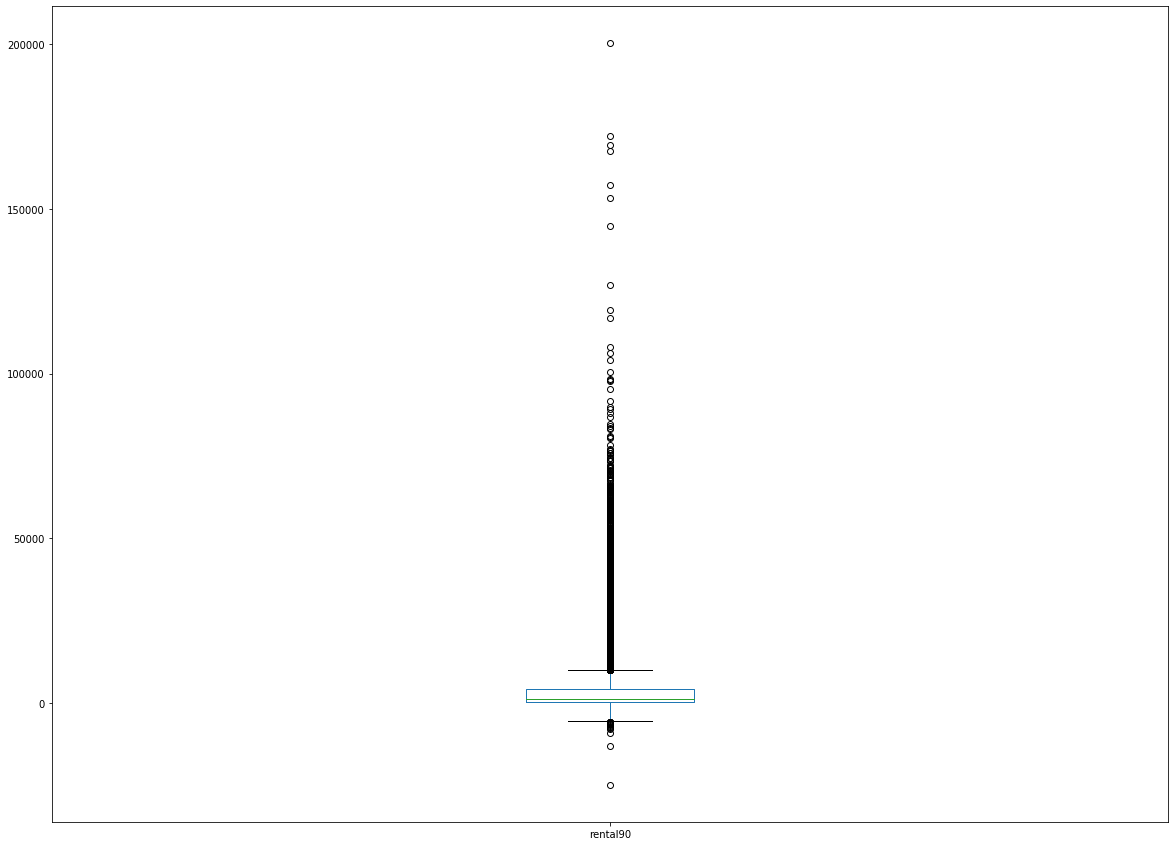

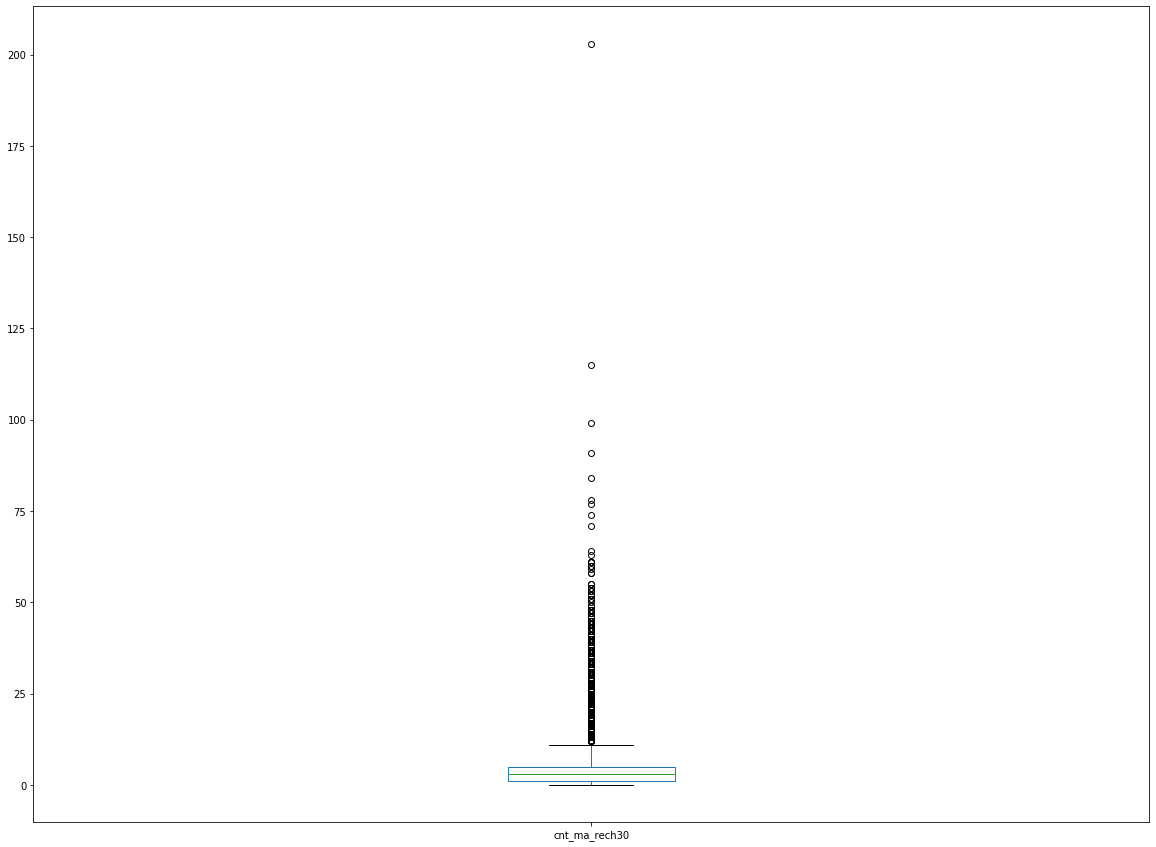

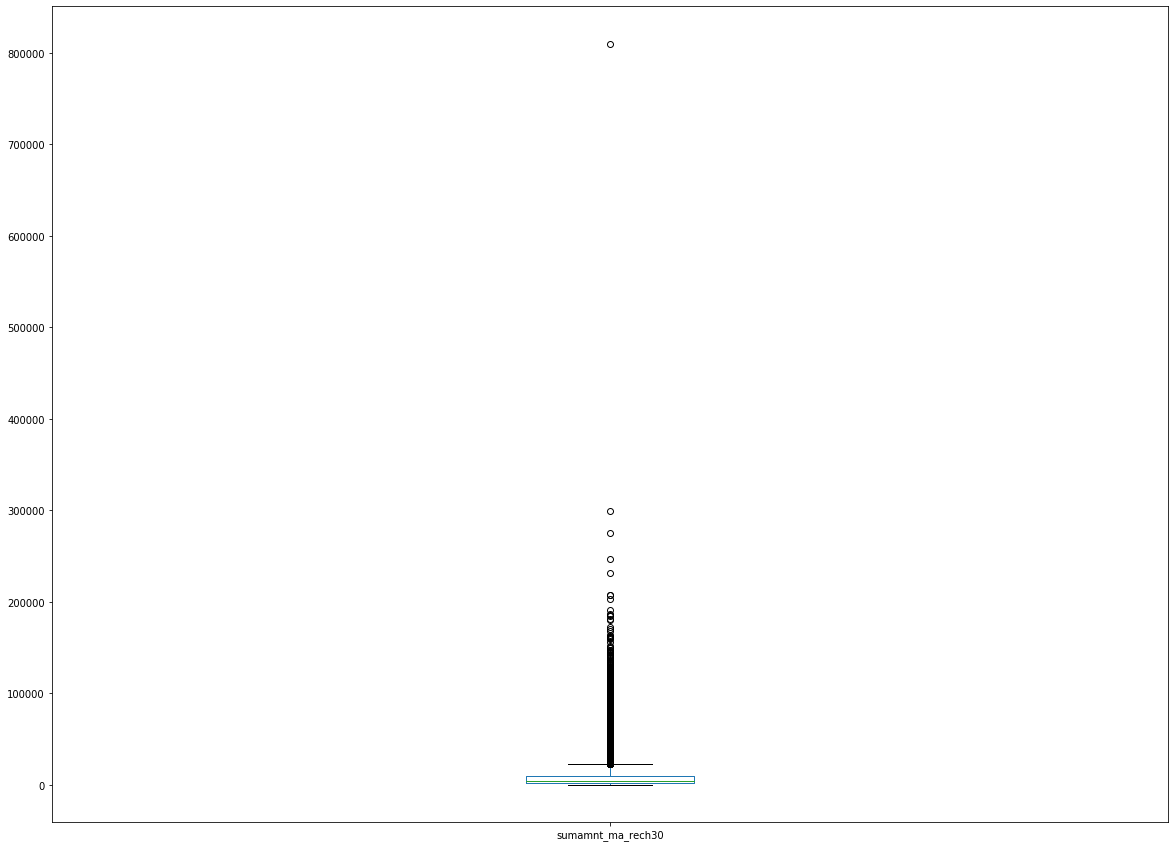

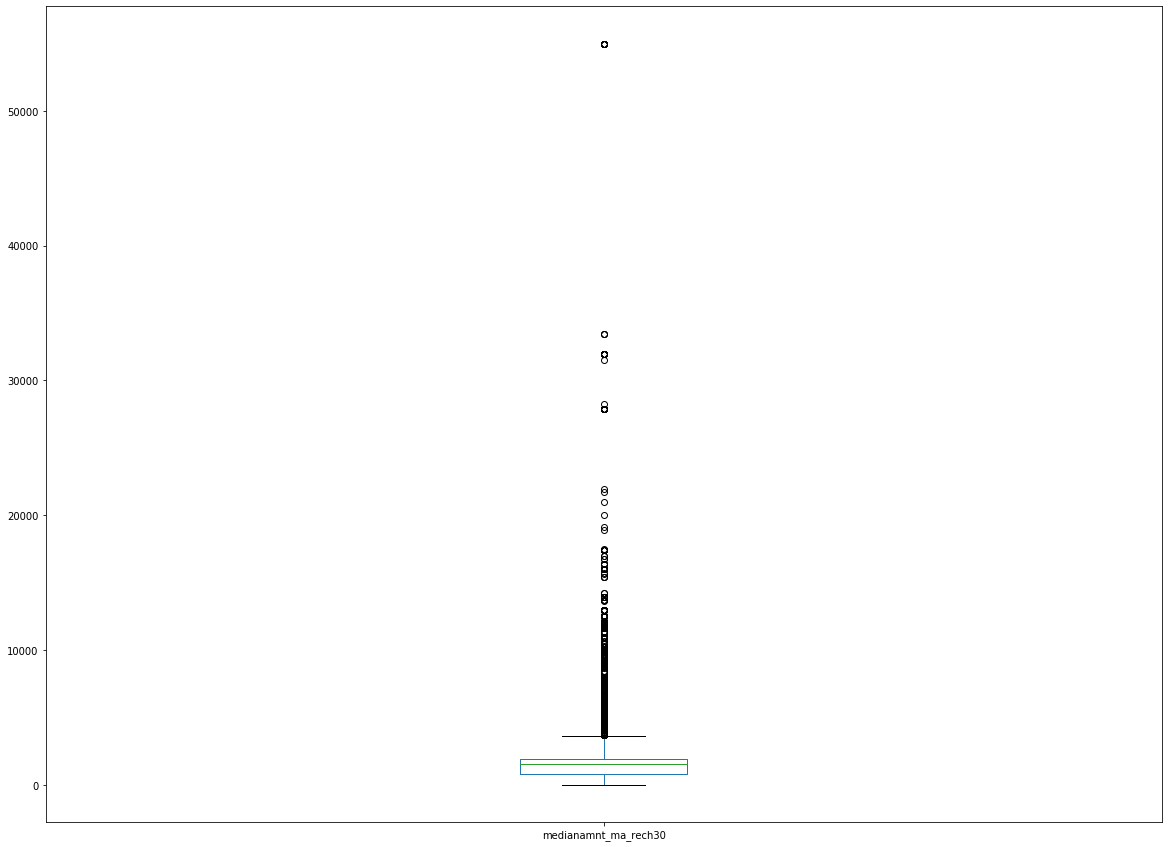

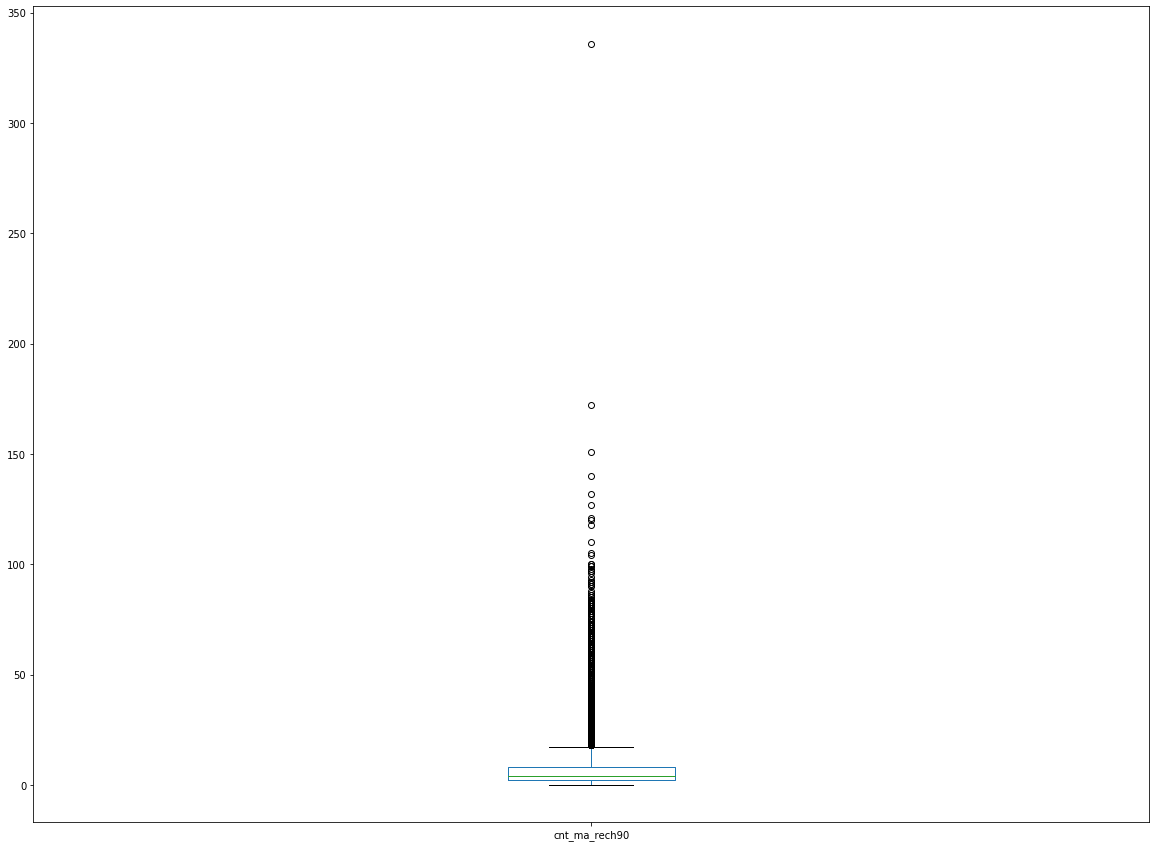

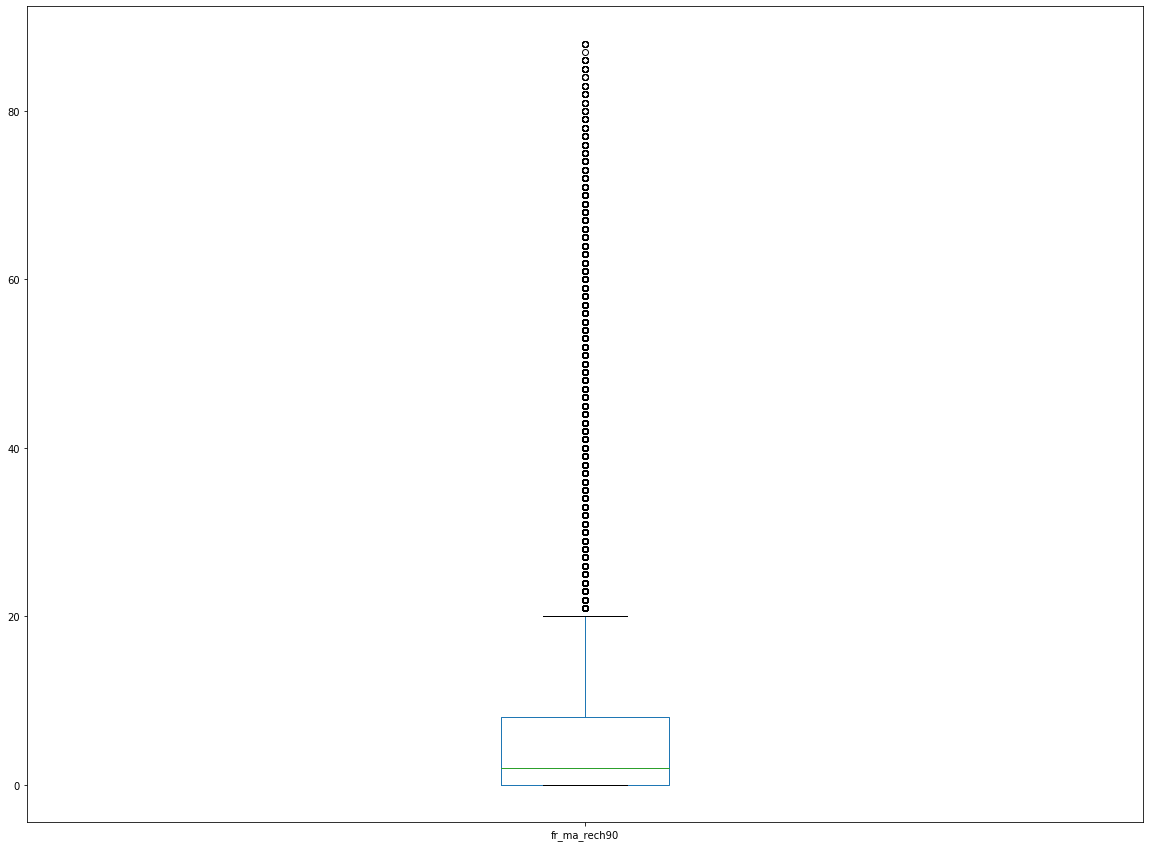

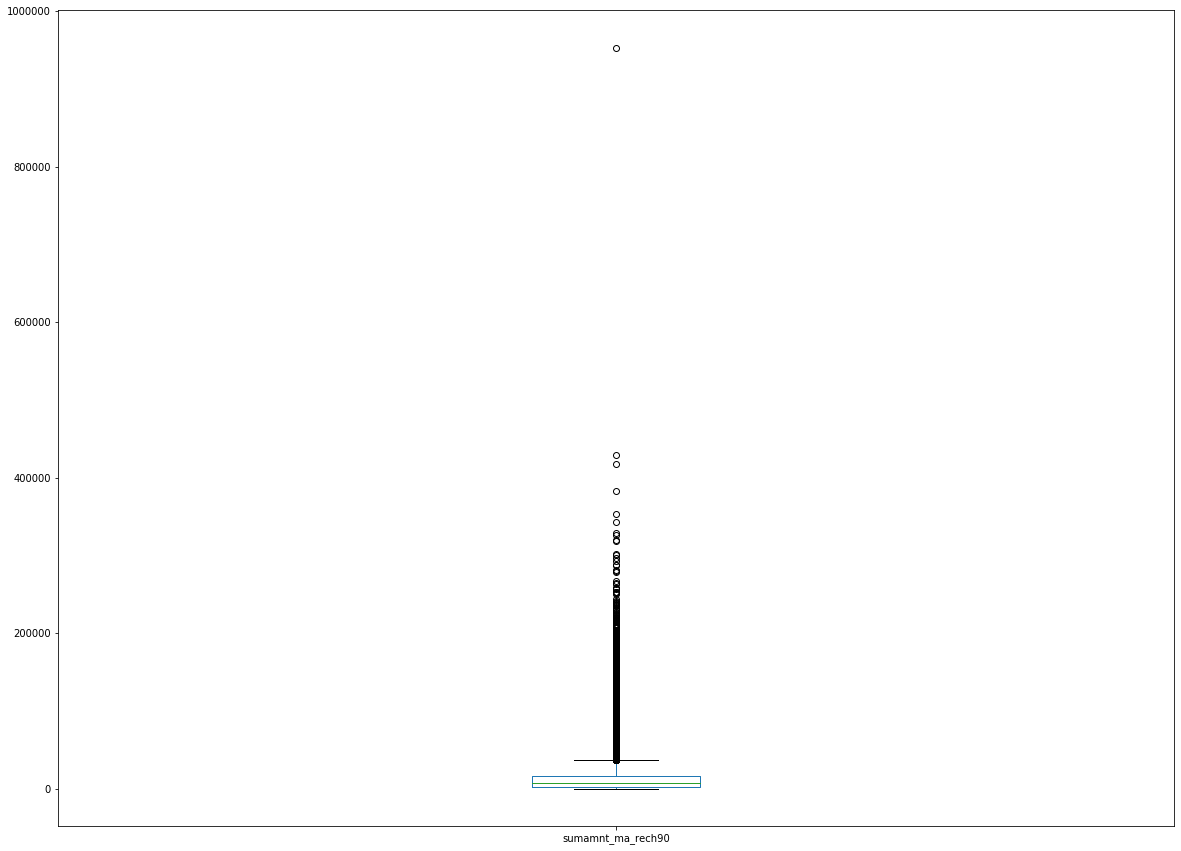

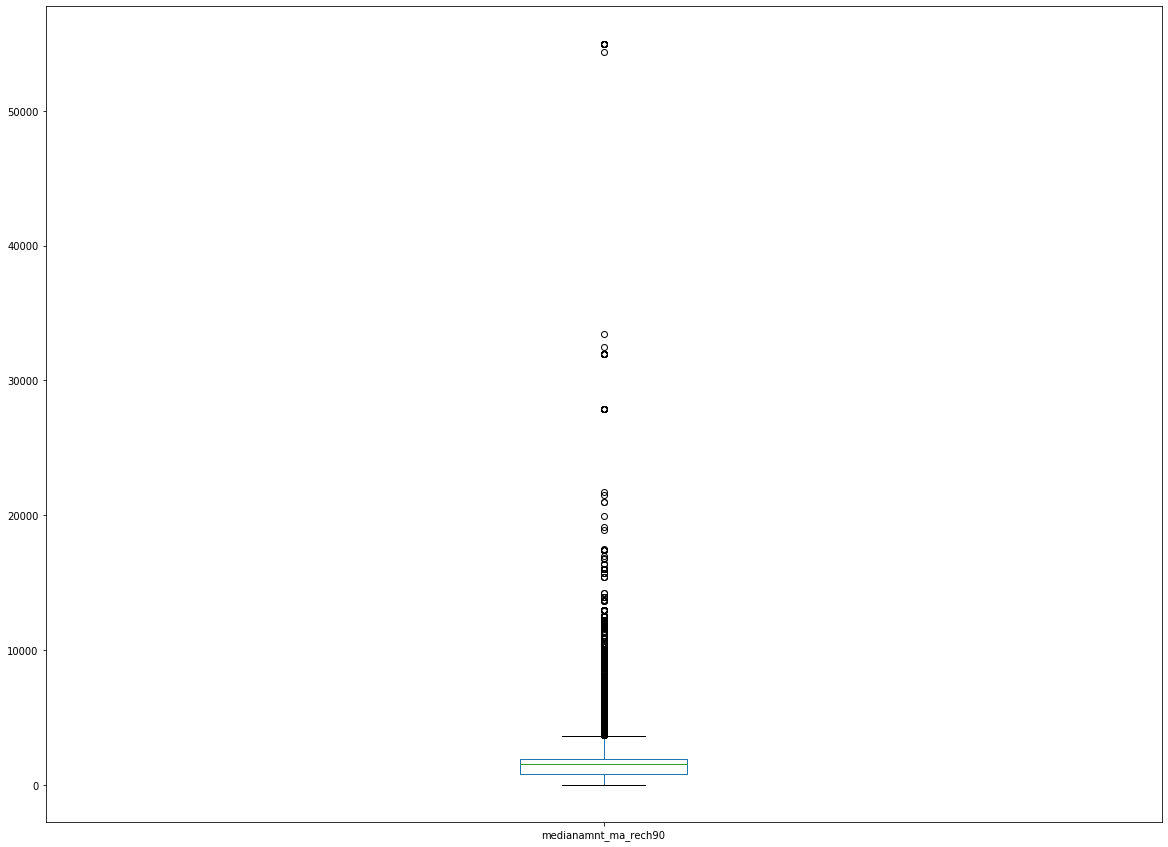

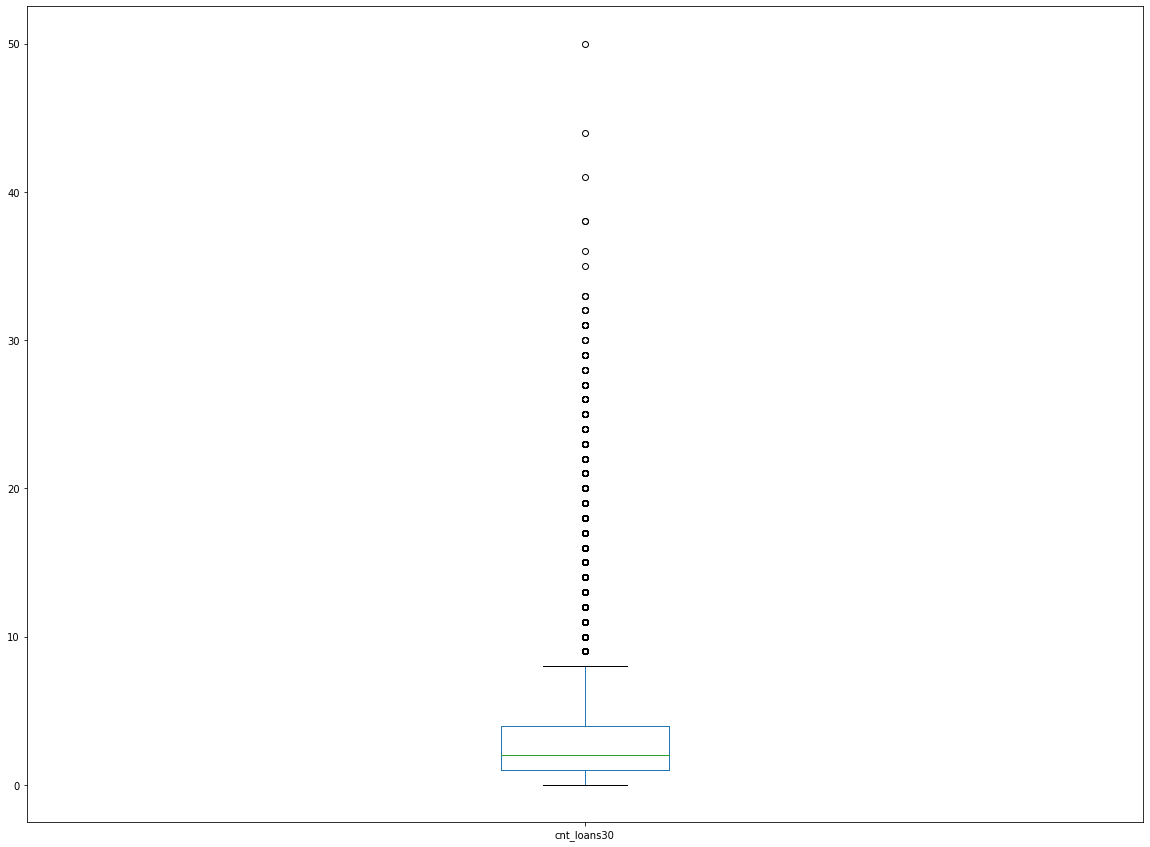

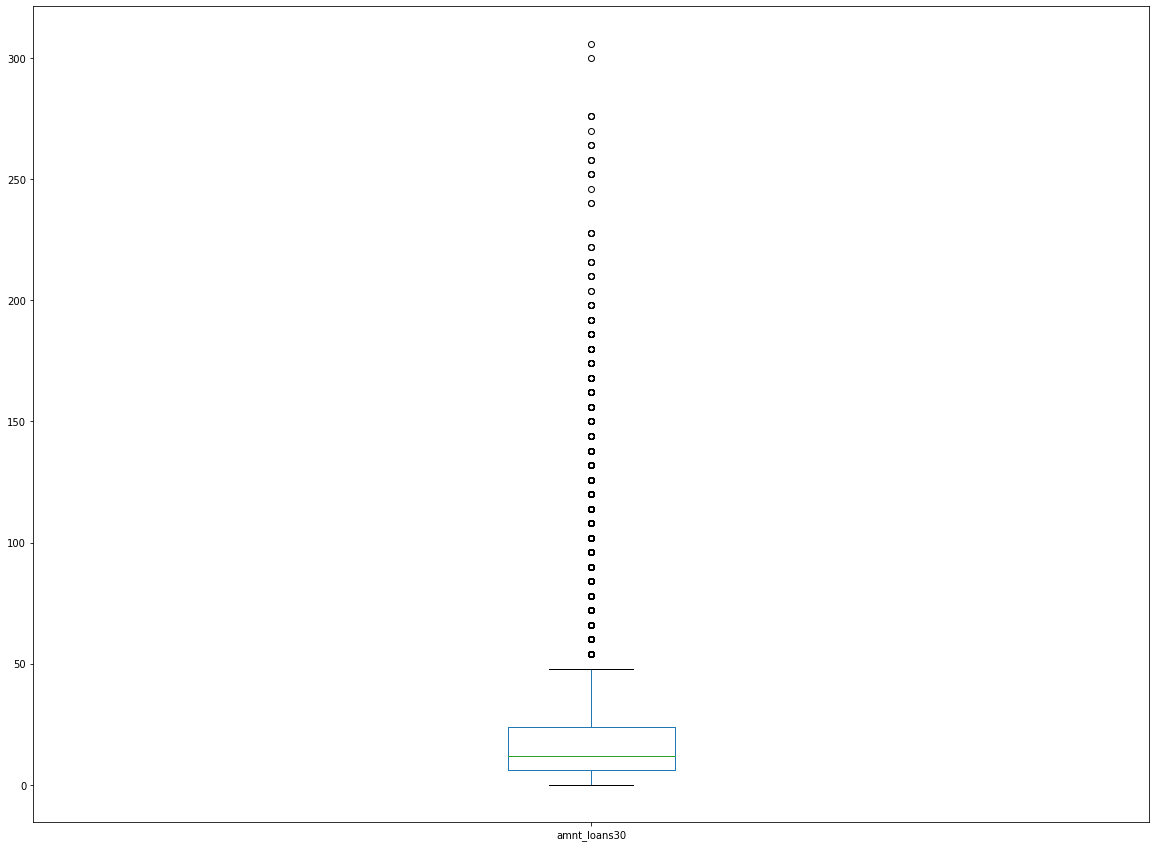

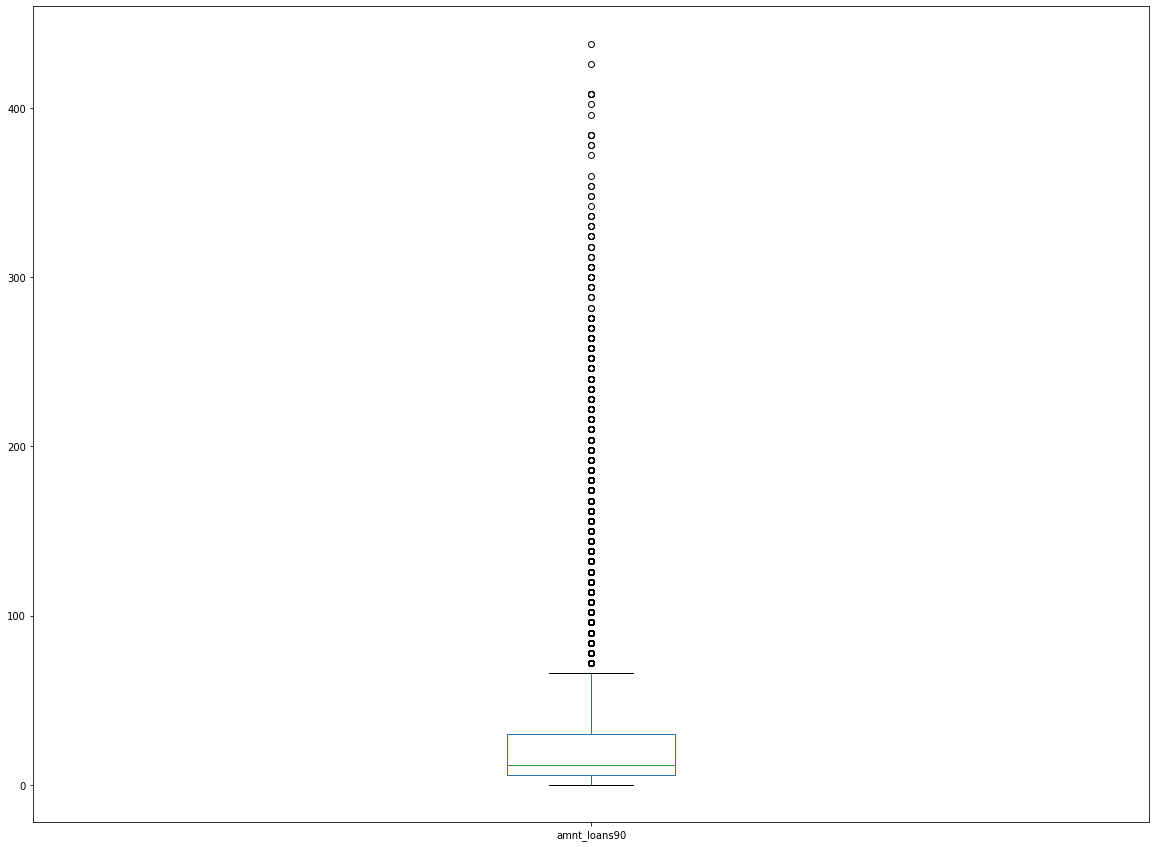

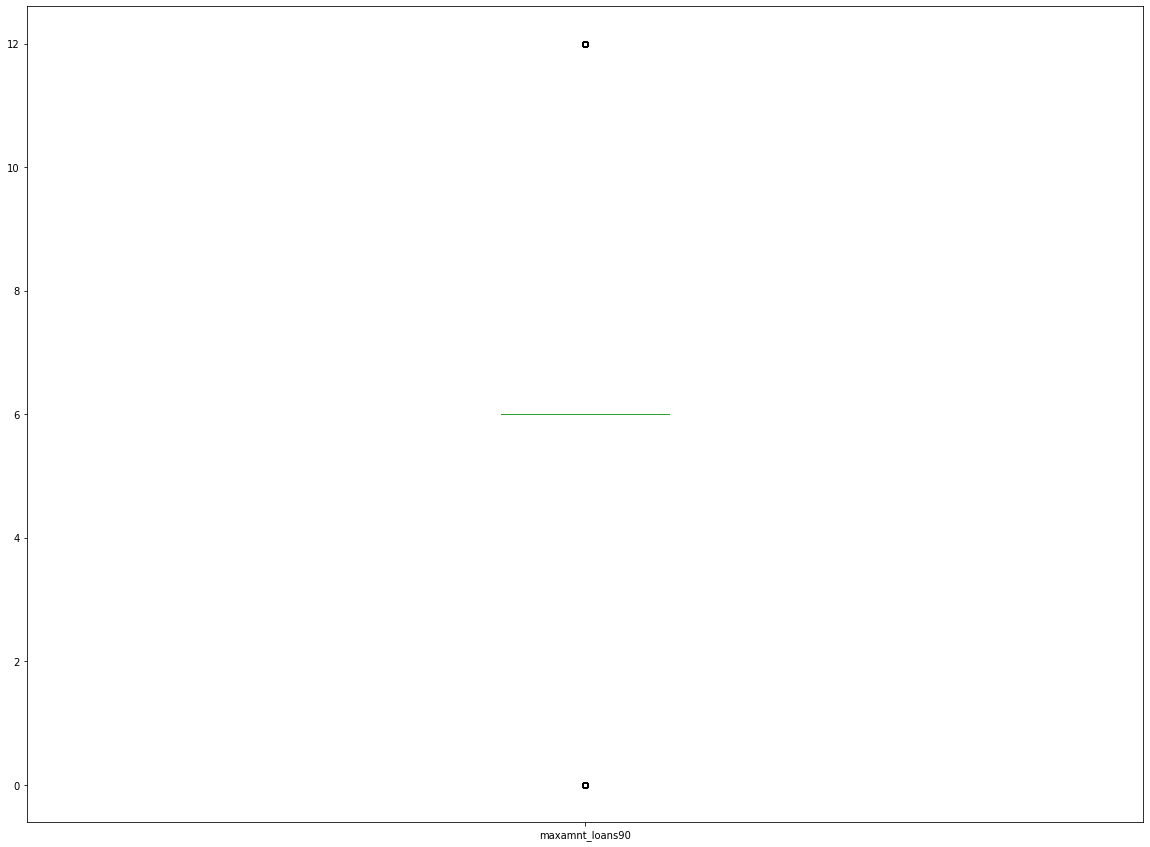

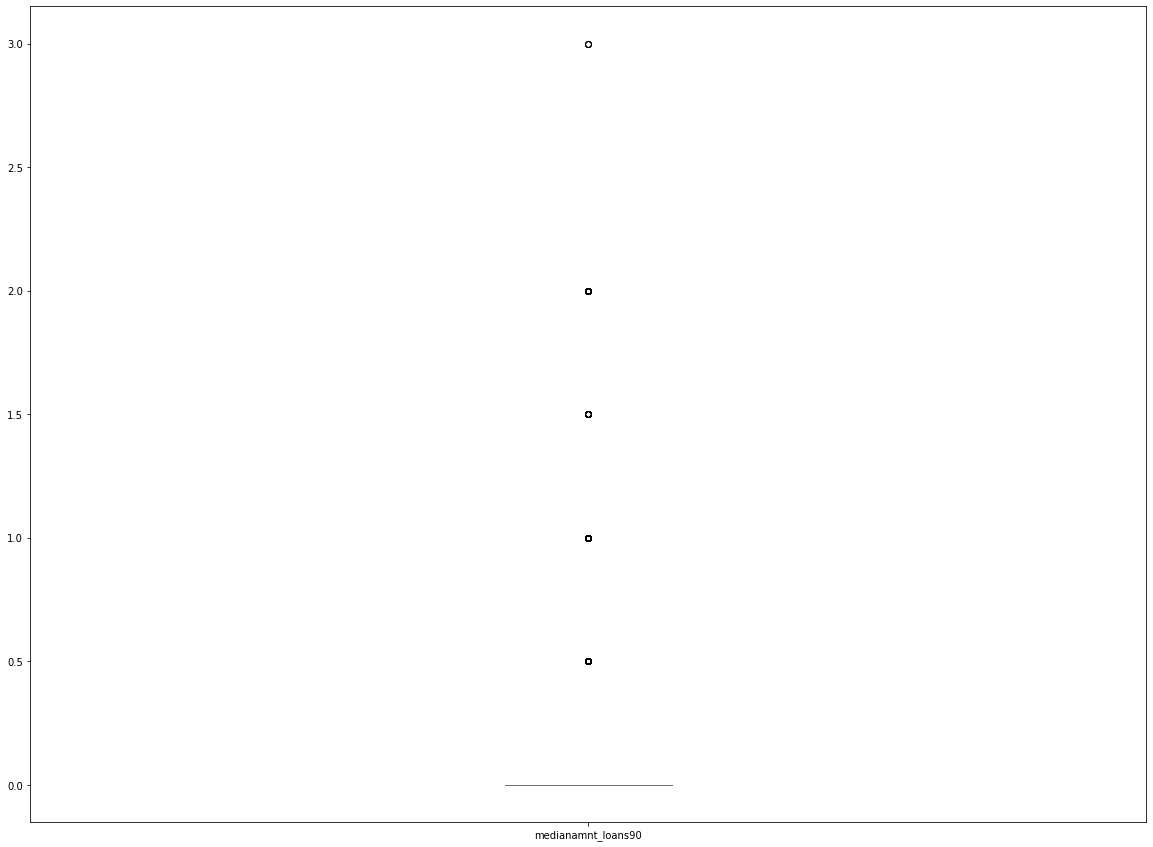

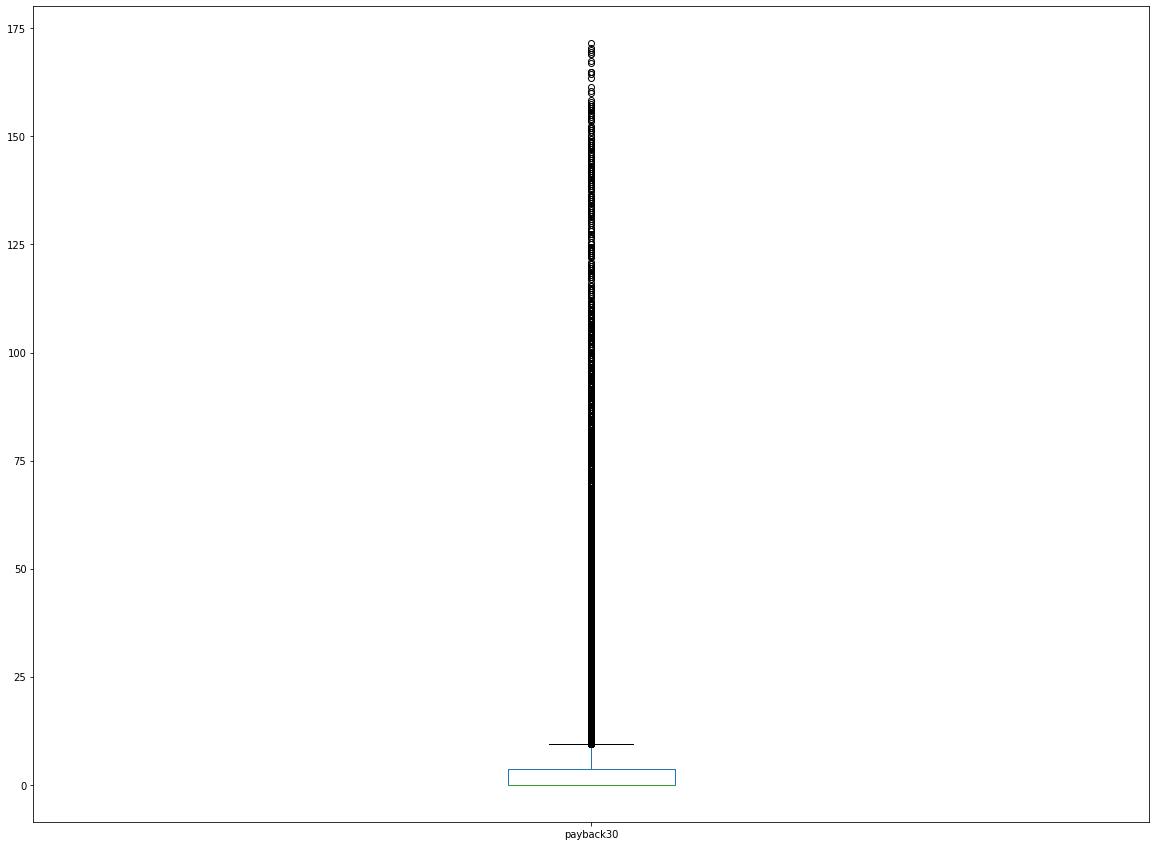

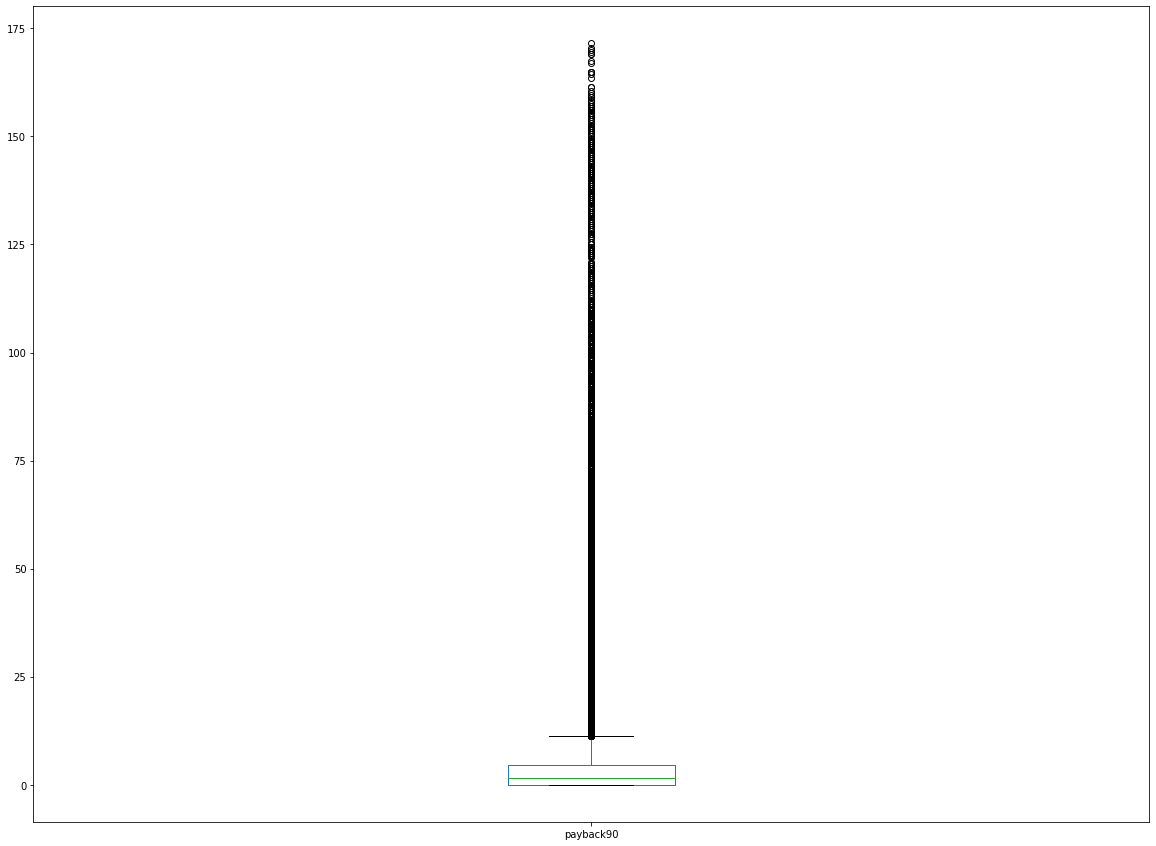

In [24]:
for i in df.columns:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [25]:
df.dtypes

label                     int64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_loans30               int64
amnt_loans30              int64
medianamnt_loans30      float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback90               float64
dtype: object

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

label                       0.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_loans30                 3.000
amnt_loans30               18.000
medianamnt_loans30          0.000
amnt_loans90               24.000
maxamnt_loans90             0.000
medianamnt_loans90          0.000
payback30                   3.750
payback90                   4.500
dtype: float64


In [27]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

        label  daily_decr30  daily_decr90  rental30  rental90  \
0        True         False         False     False     False   
1       False         False         False     False     False   
2       False         False         False     False     False   
3       False         False         False     False     False   
4       False         False         False     False     False   
...       ...           ...           ...       ...       ...   
209588  False         False         False     False     False   
209589  False         False         False     False     False   
209590  False         False         False     False     False   
209591  False         False         False     False     False   
209592  False         False         False     False     False   

        last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
0                  False          False              False   
1                  False          False              False   
2                  False         

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [28]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(69351, 22)

In [29]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[2.64789583 0.25229941 0.27634619 ... 0.22959366 2.9046997  2.39409346]
 [0.37765836 0.73103667 0.5533797  ... 0.22959366 0.38562959 0.41923266]
 [0.37765836 0.43201111 0.42903256 ... 0.22959366 0.38562959 0.41923266]
 ...
 [0.37765836 0.70079045 0.53319431 ... 0.22959366 0.06820893 0.04735622]
 [0.37765836 0.77075515 0.59455827 ... 0.22959366 0.38562959 0.59938541]
 [0.37765836 0.09674426 0.14174607 ... 0.22959366 0.38562959 0.41923266]]


In [30]:
threshold = 3
print(np.where(z > 3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([10, 10, 21, ..., 17, 16, 19], dtype=int64))


In [31]:
df_o = df[(z < 3).all(axis=1)]

In [32]:
df_o.shape

(170481, 22)

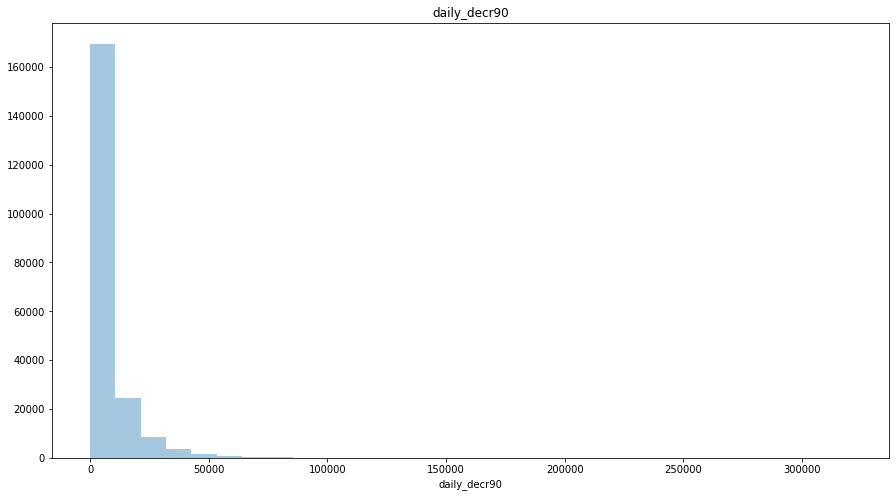

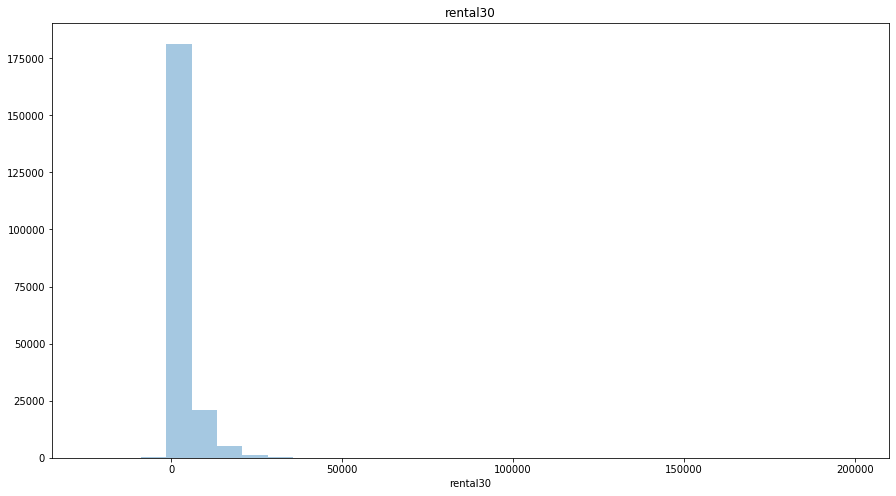

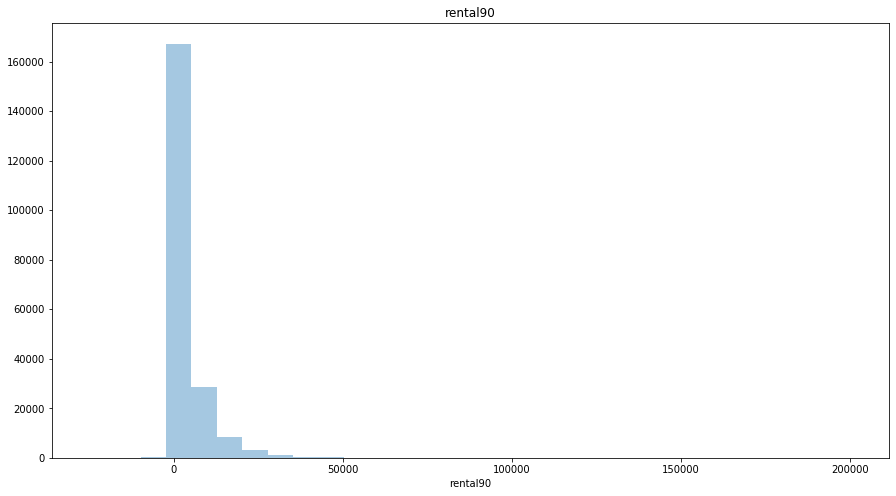

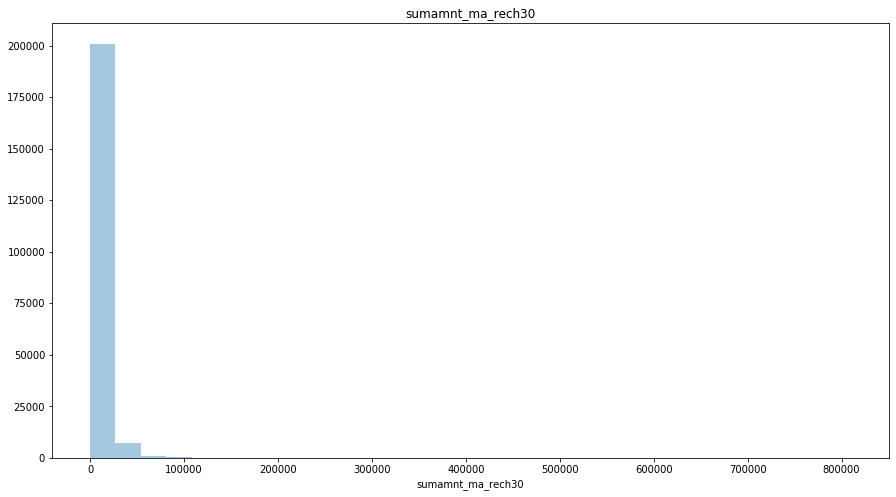

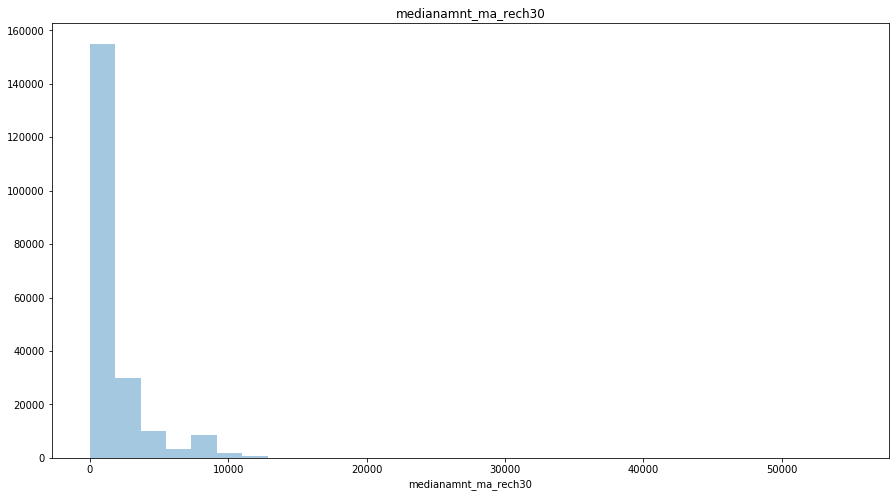

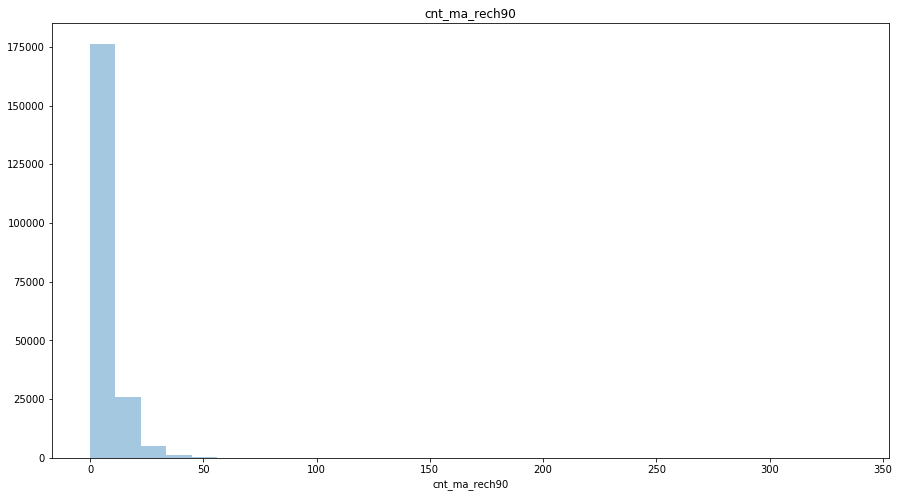

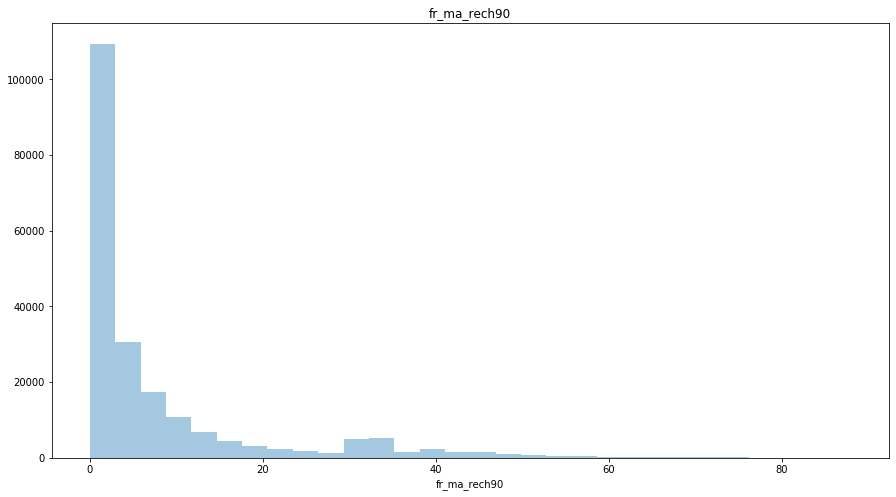

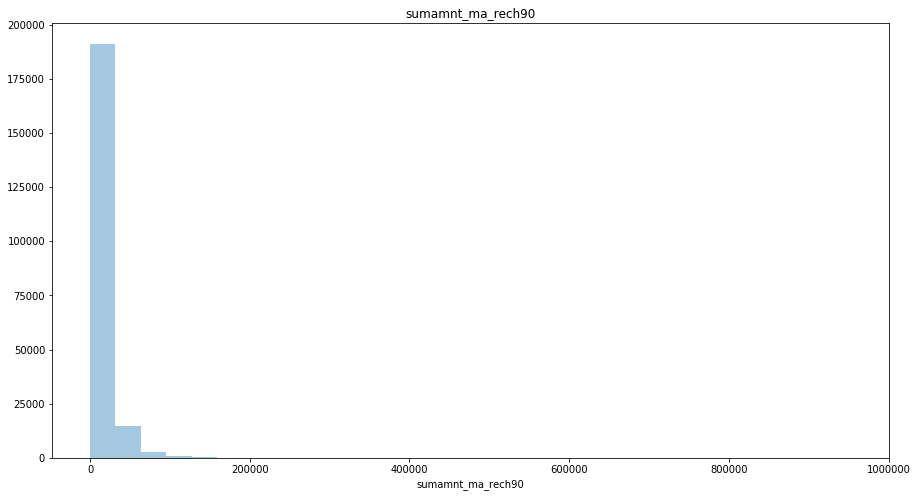

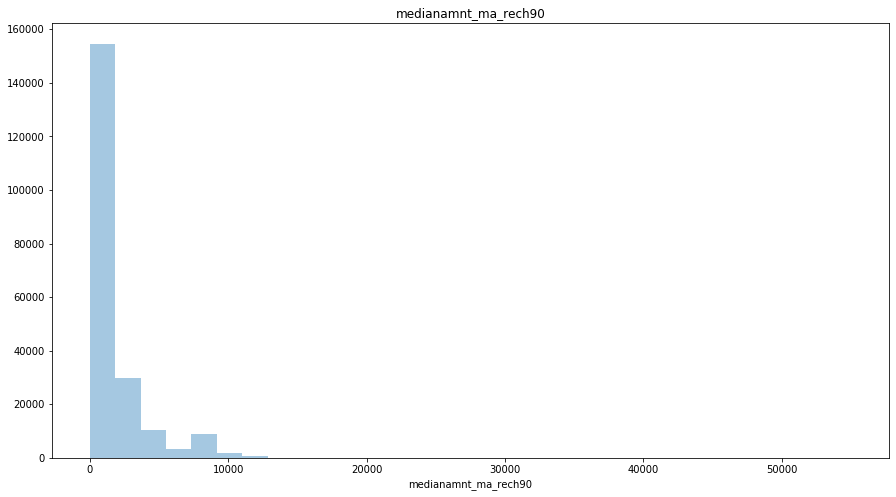

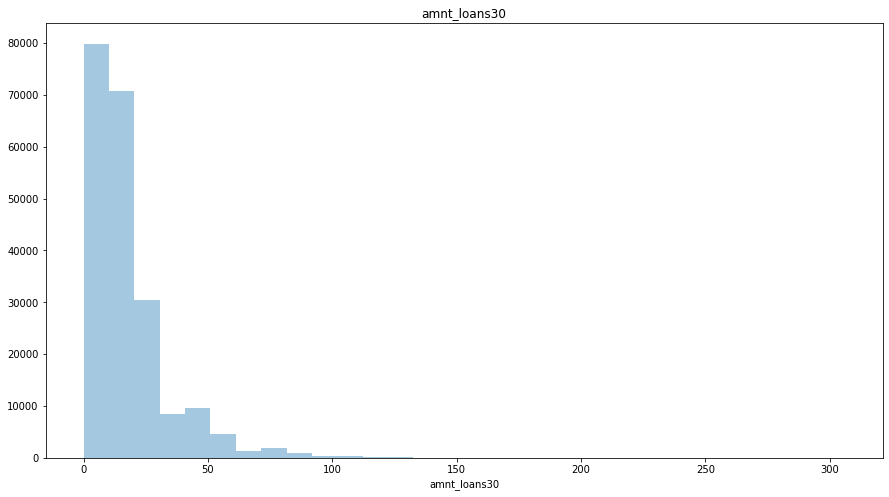

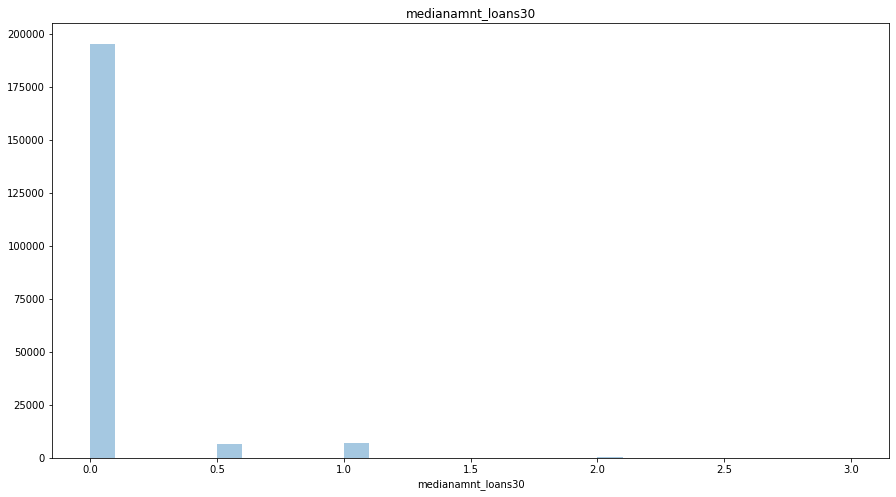

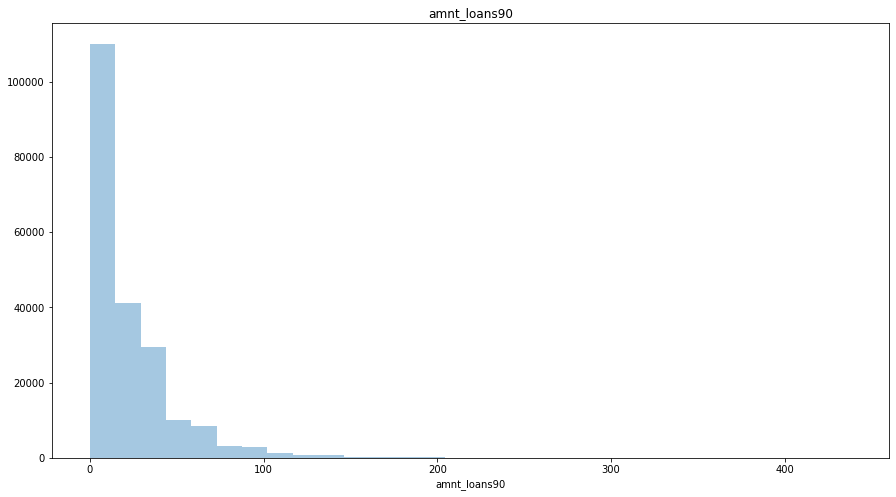

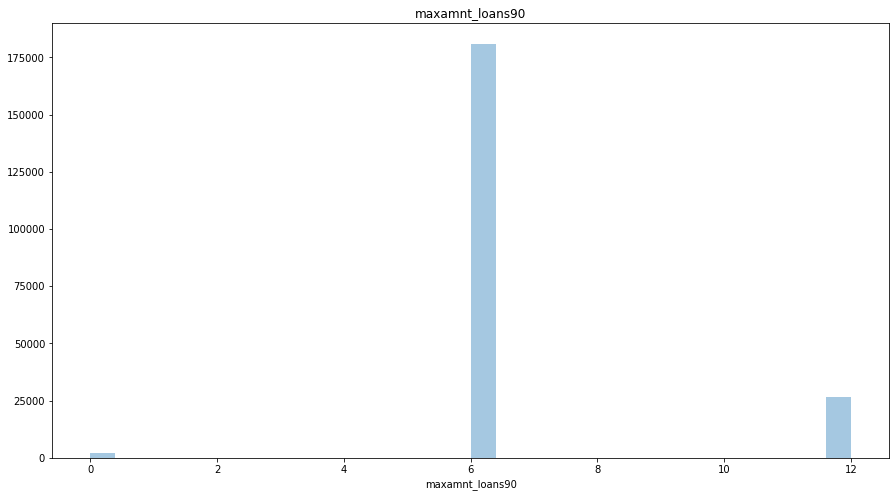

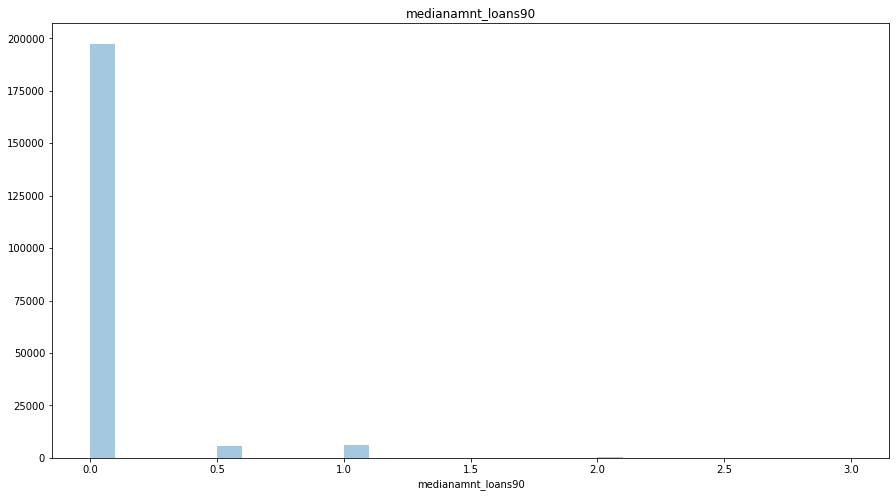

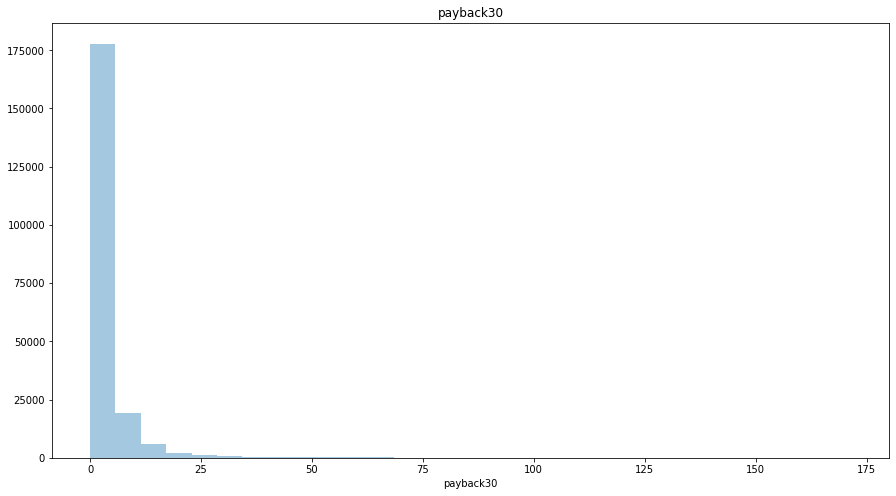

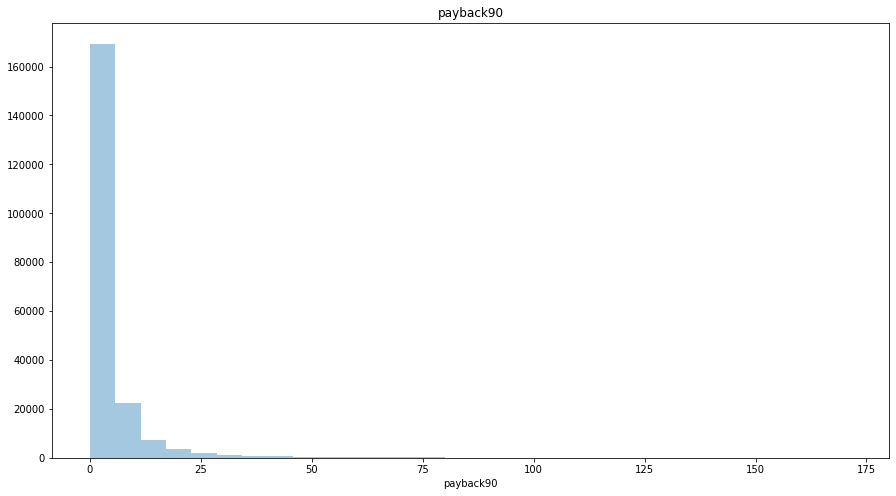

In [33]:
for i in df_o.columns:
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 30, kde = False)
    plt.title(i)
    plt.show()

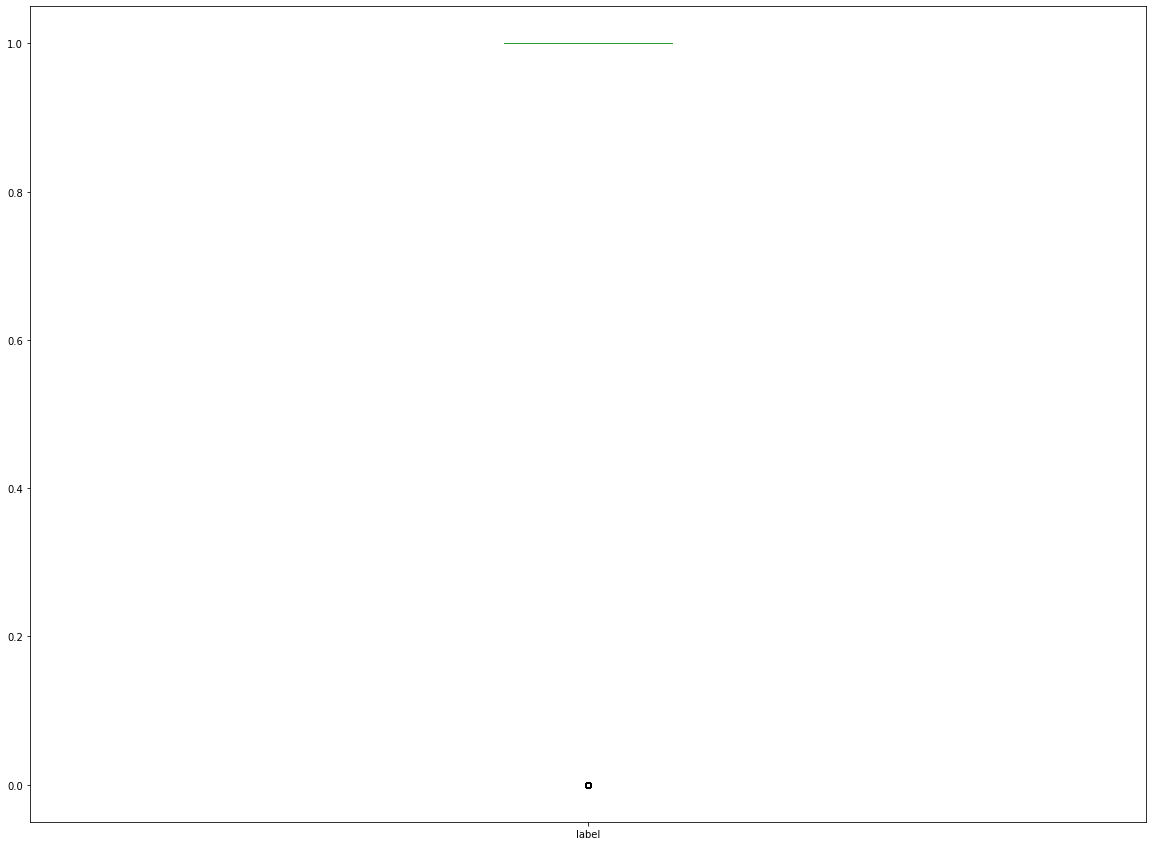

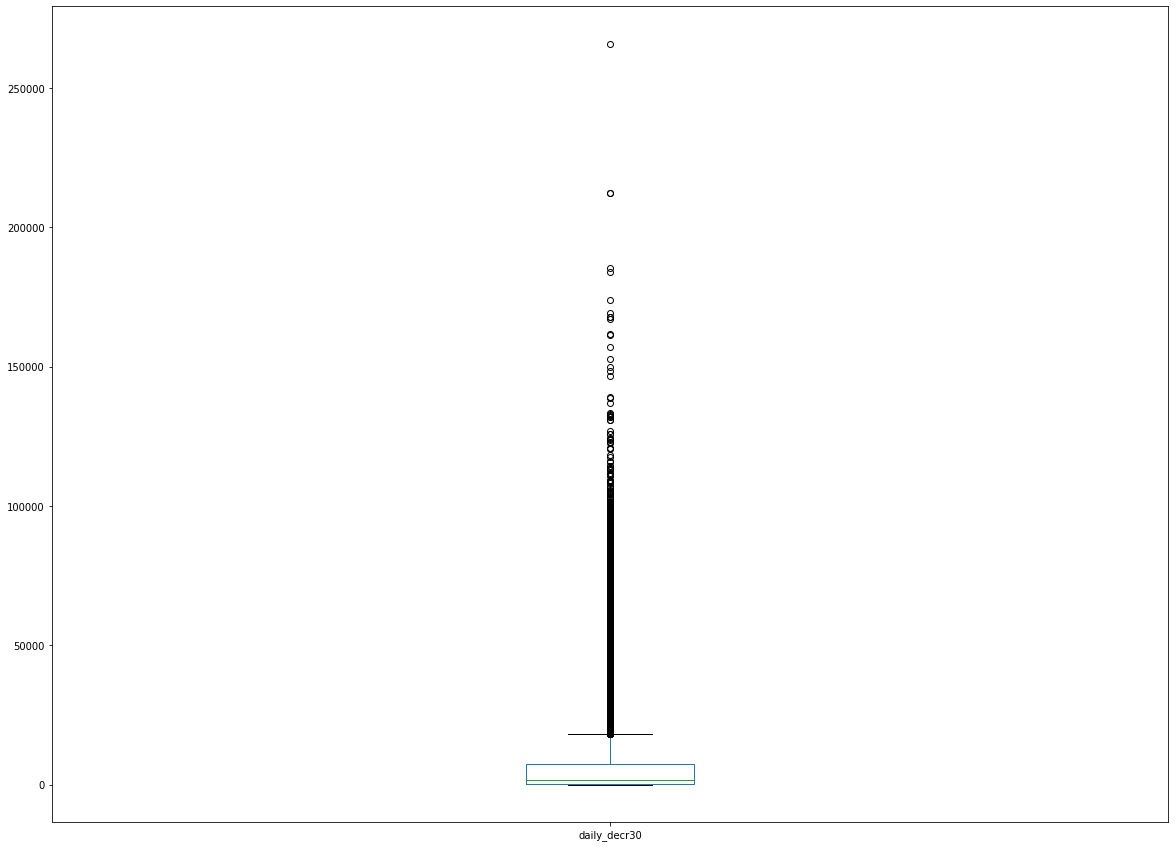

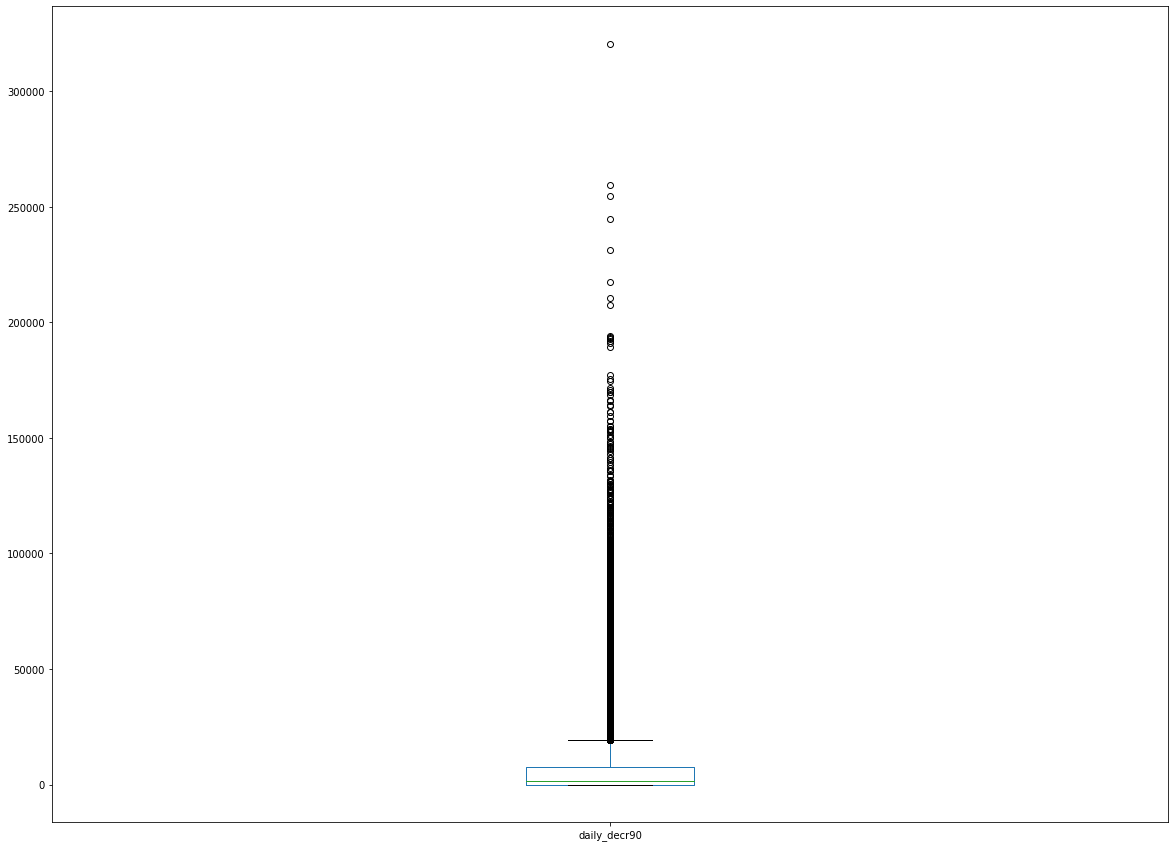

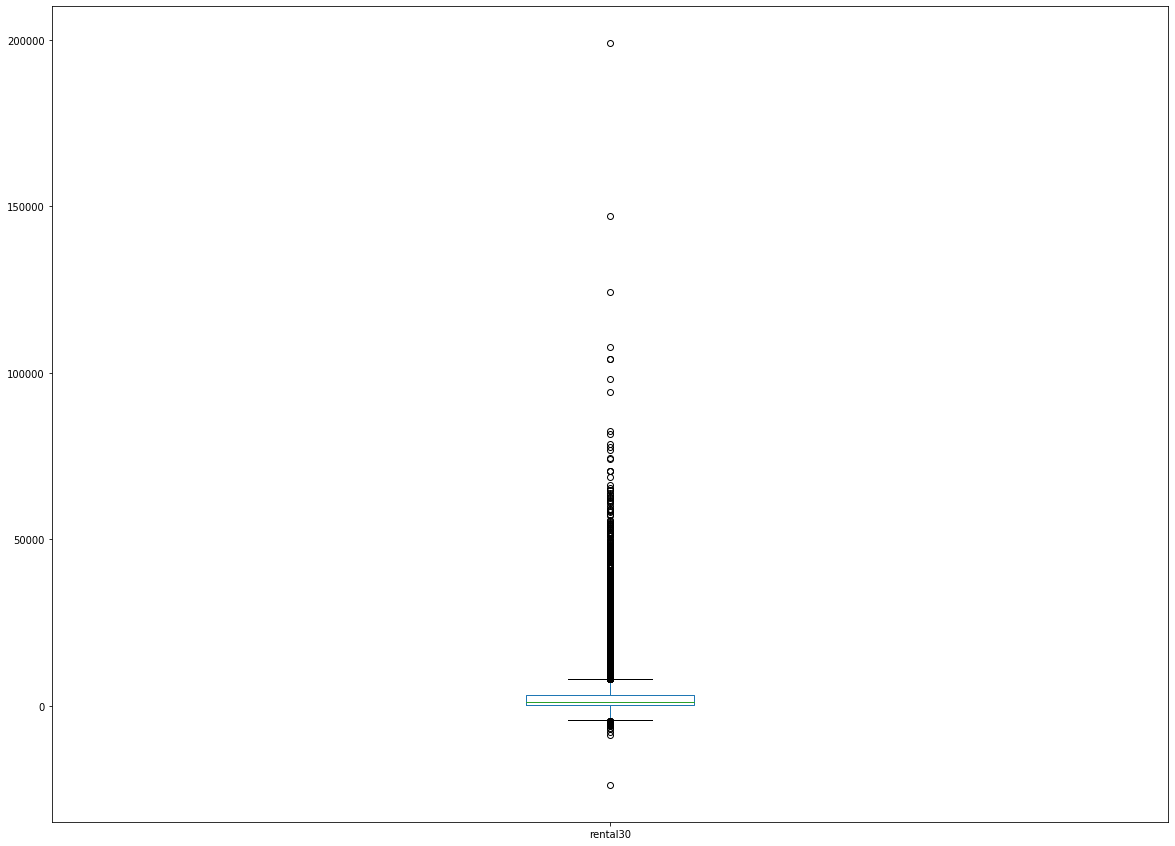

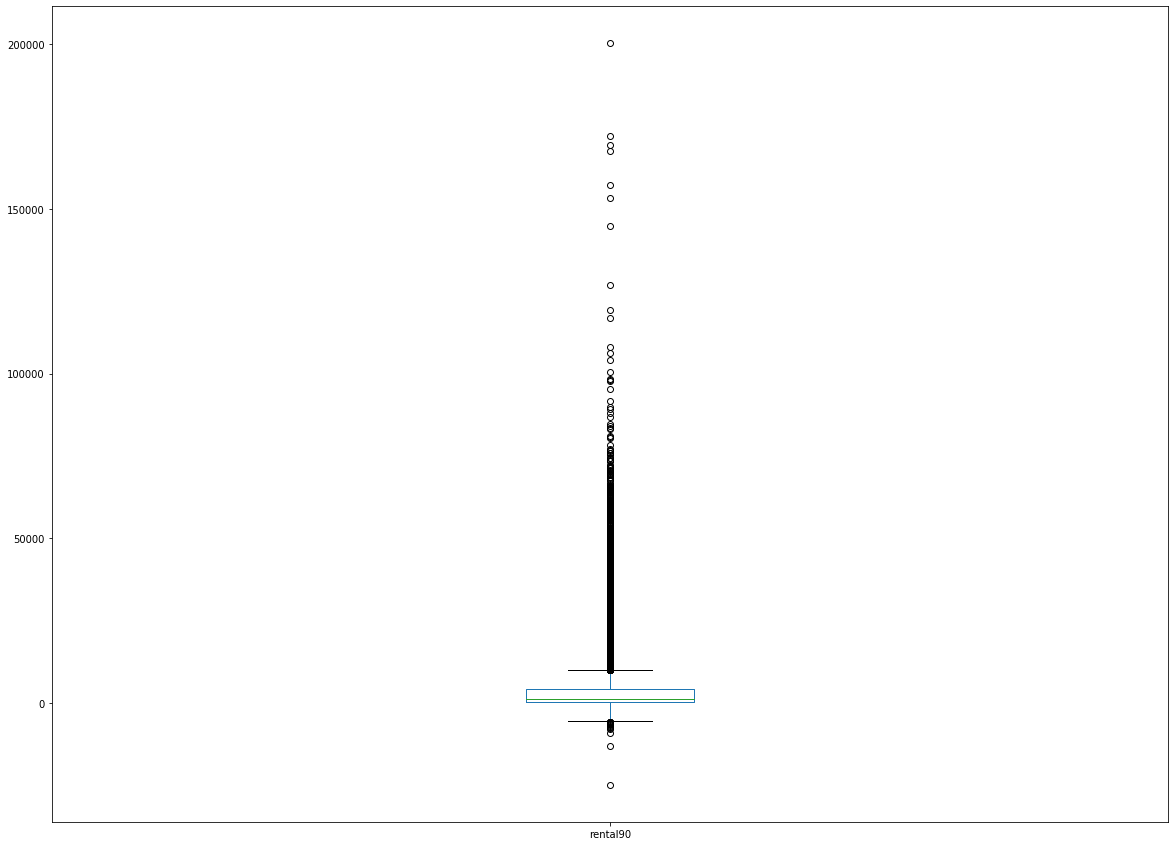

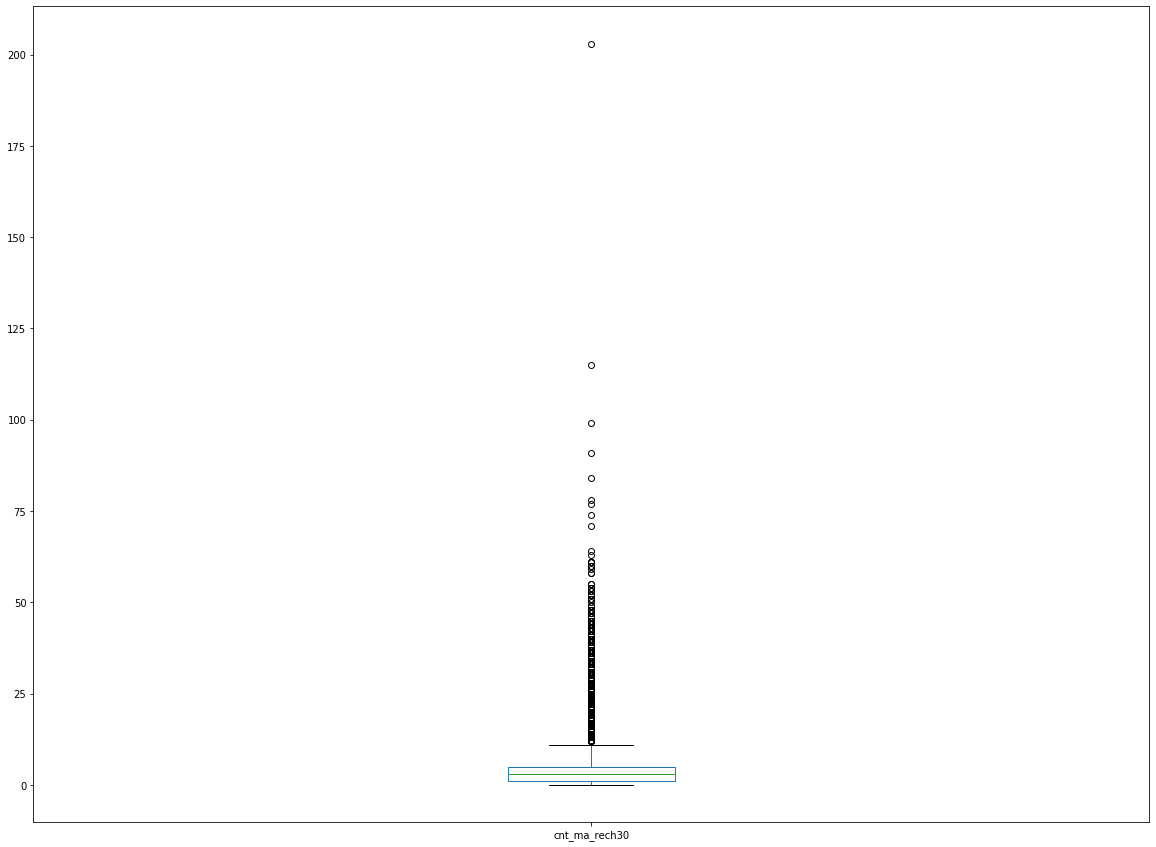

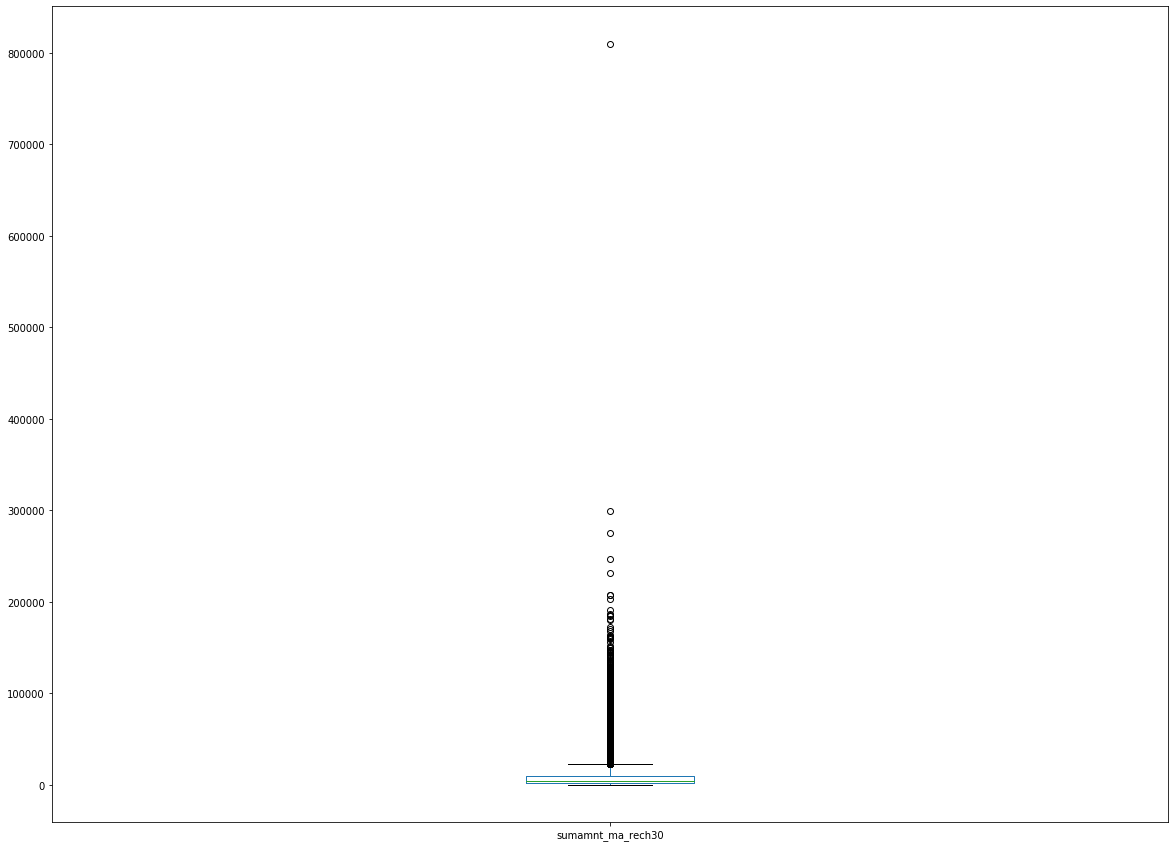

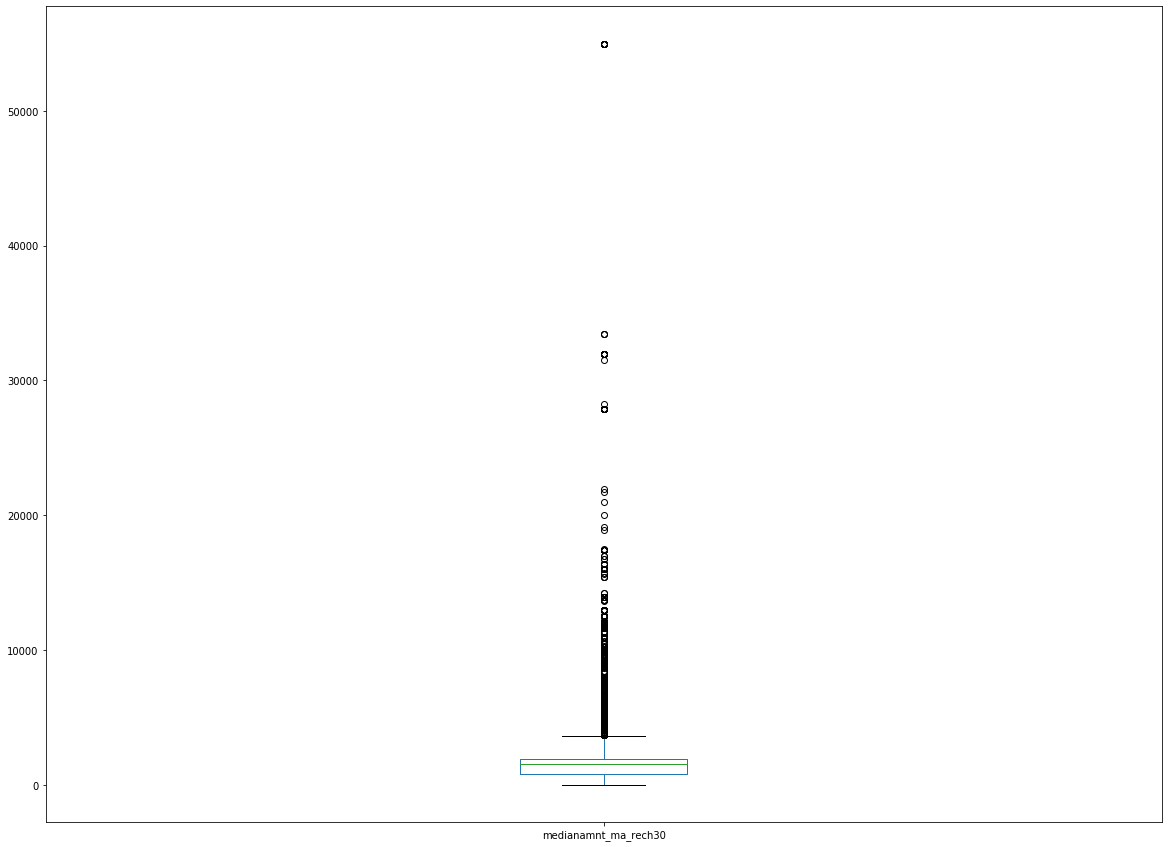

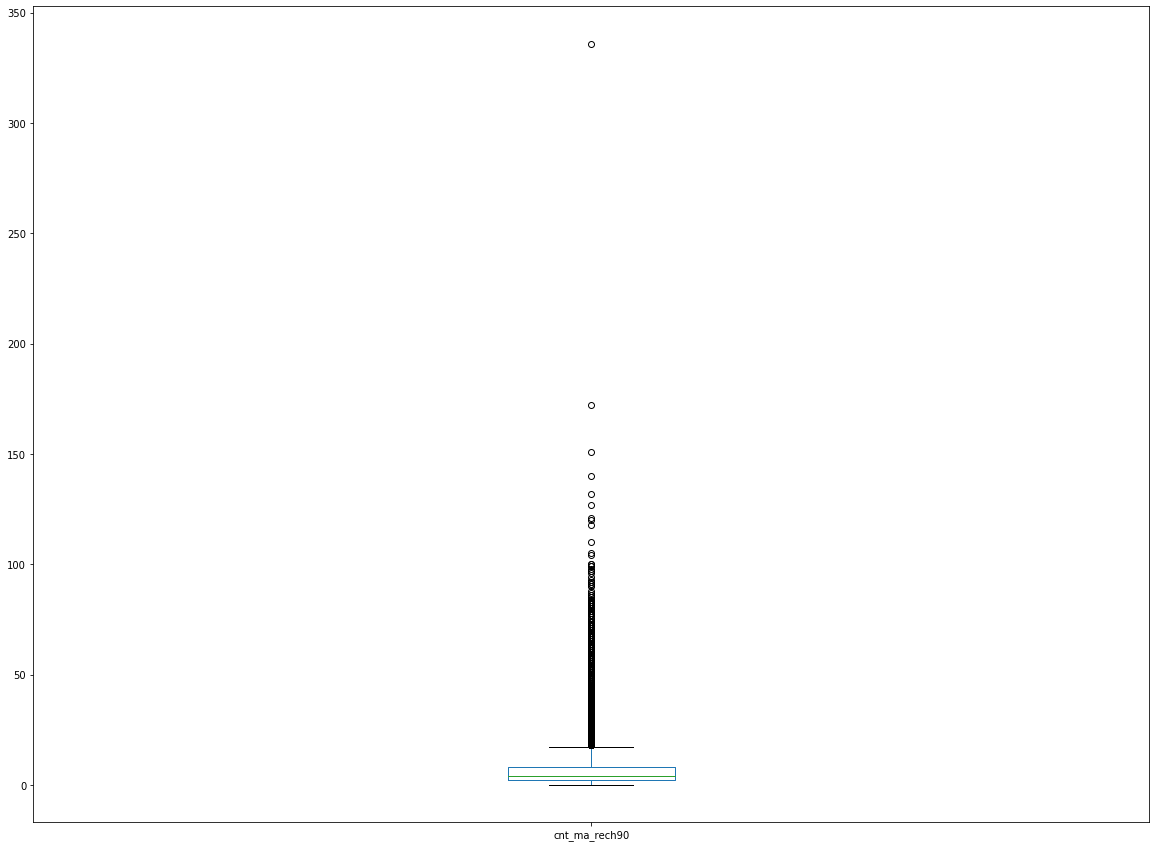

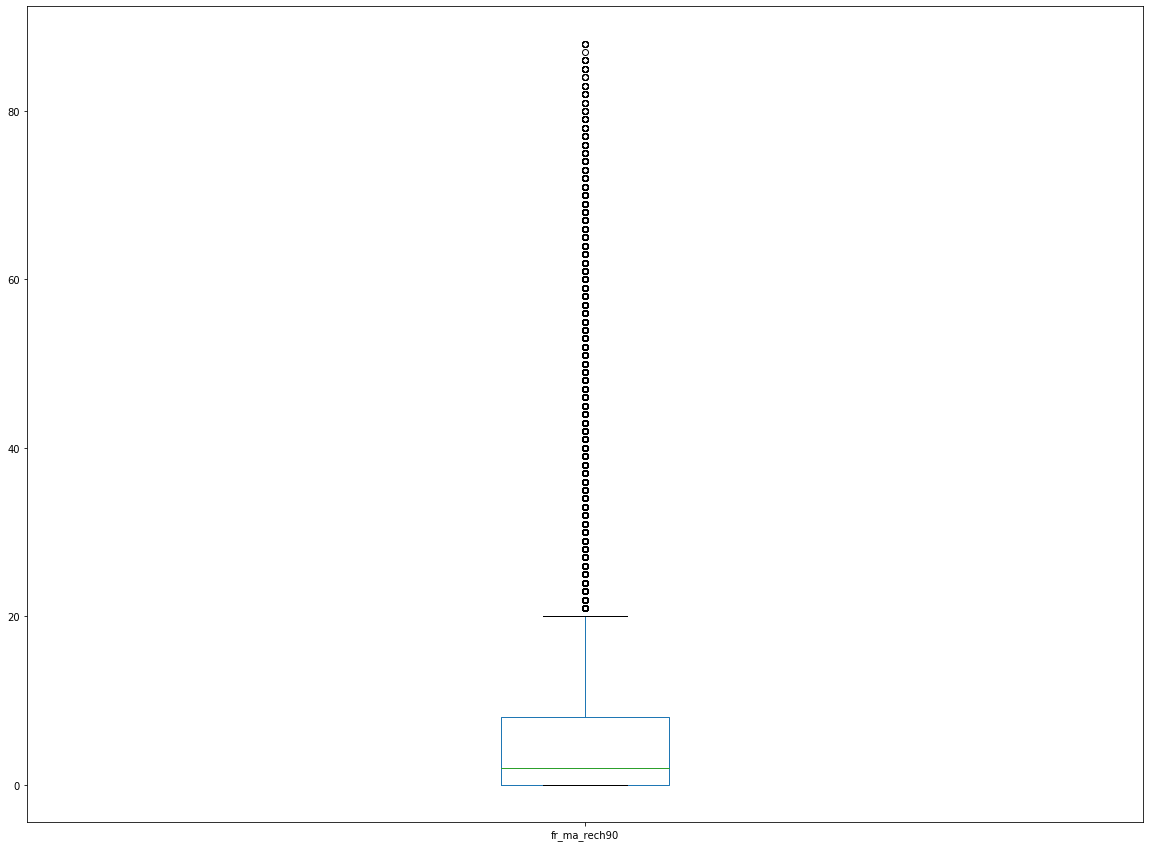

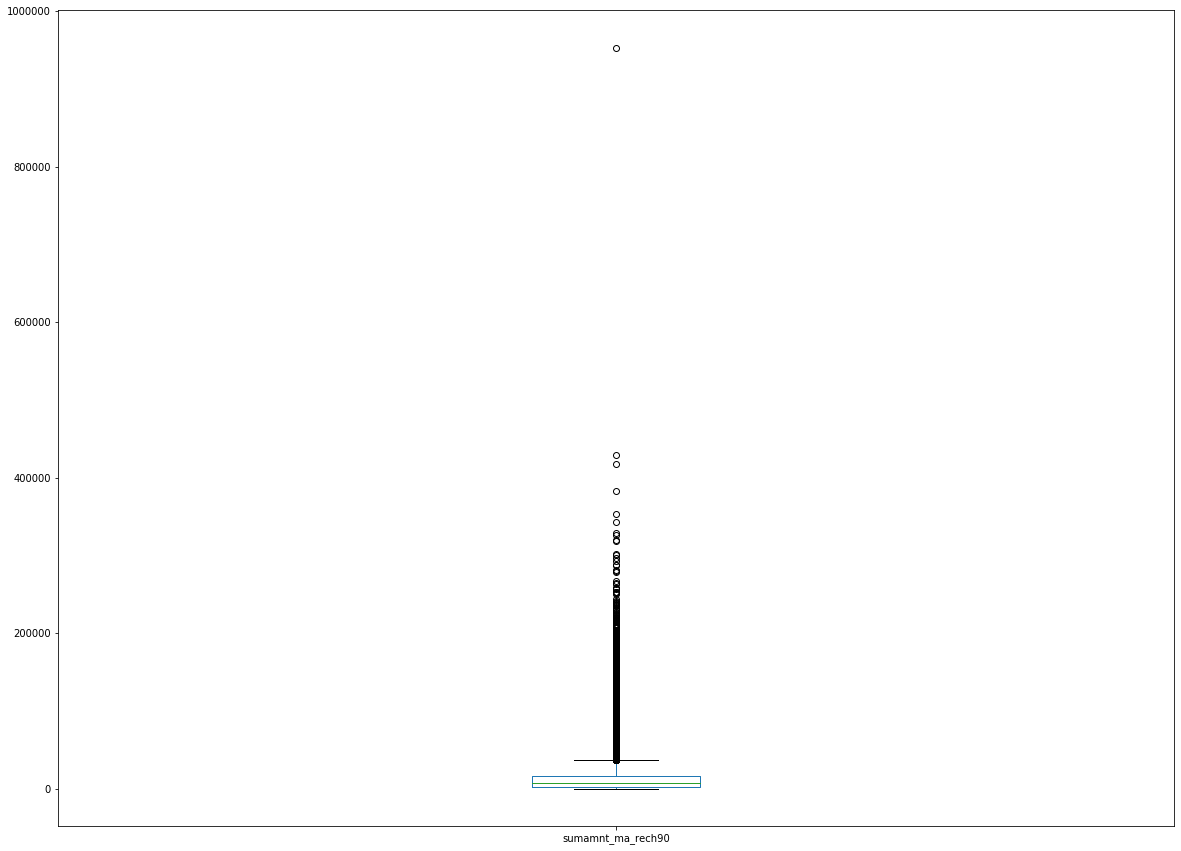

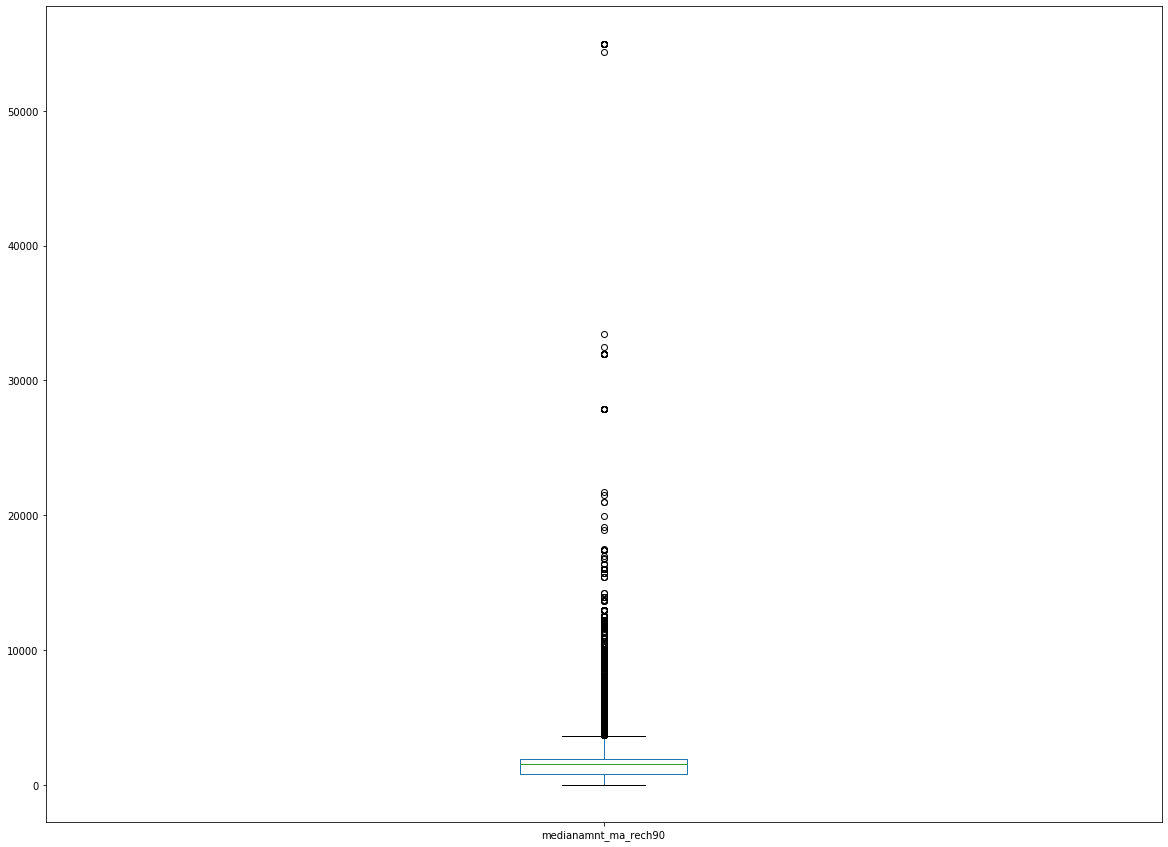

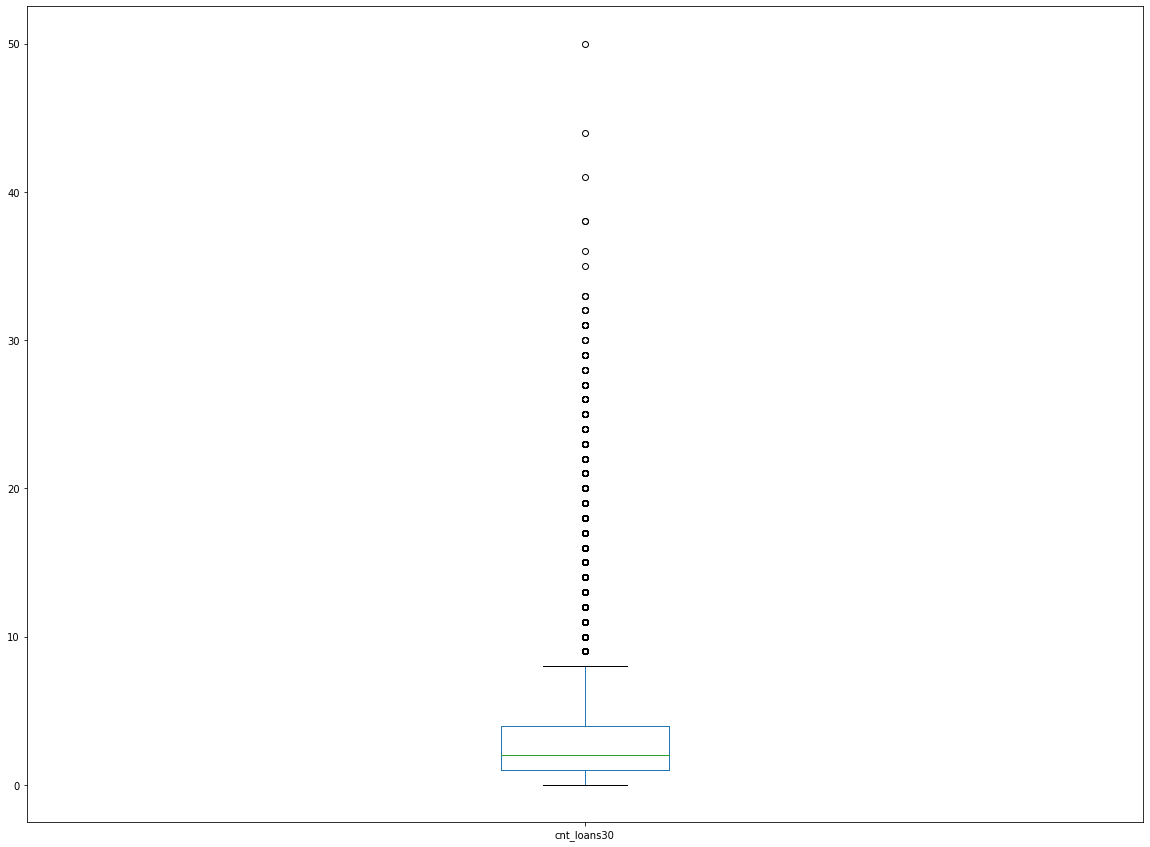

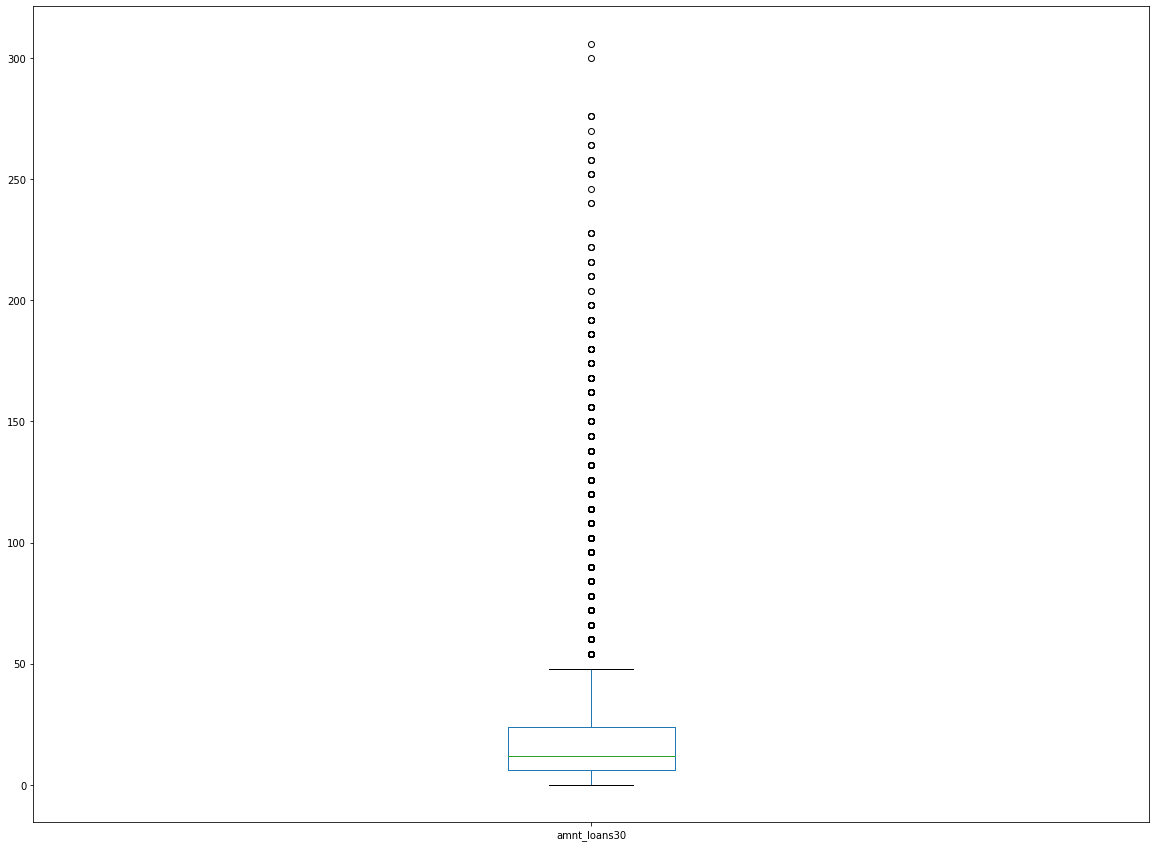

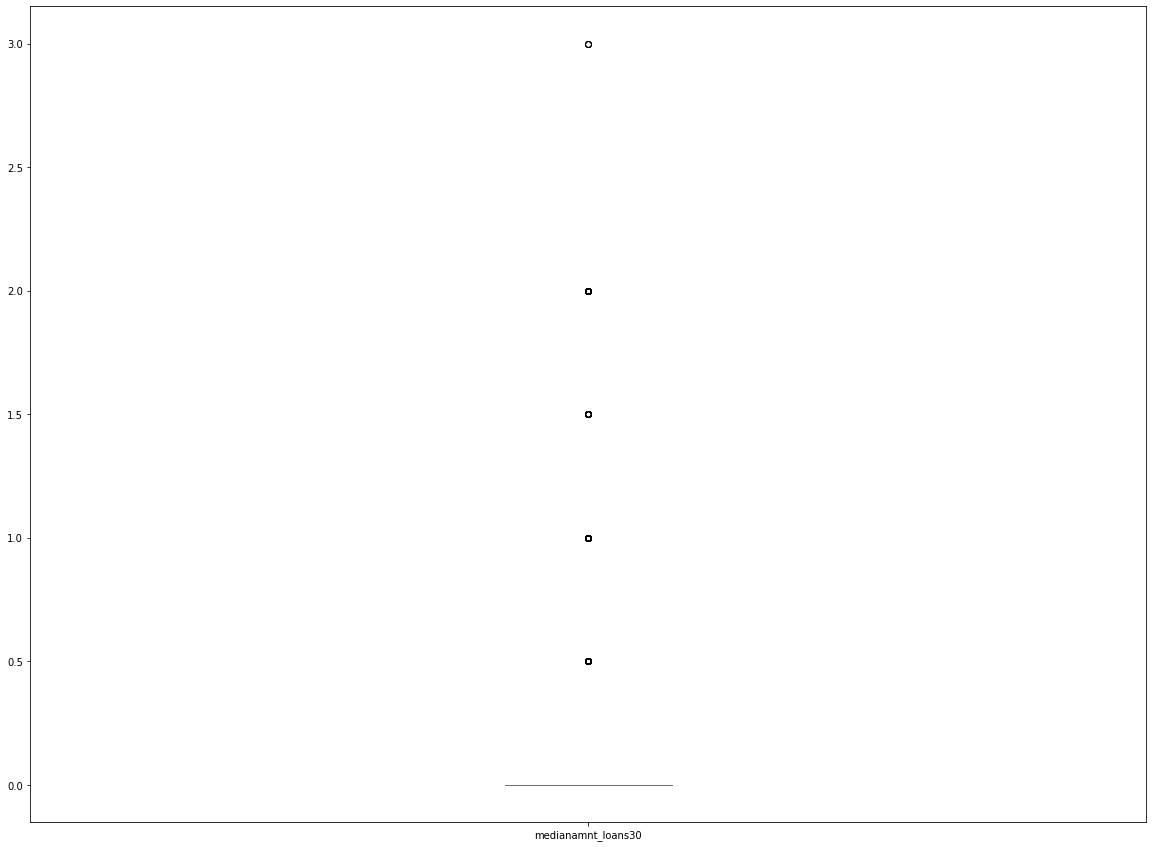

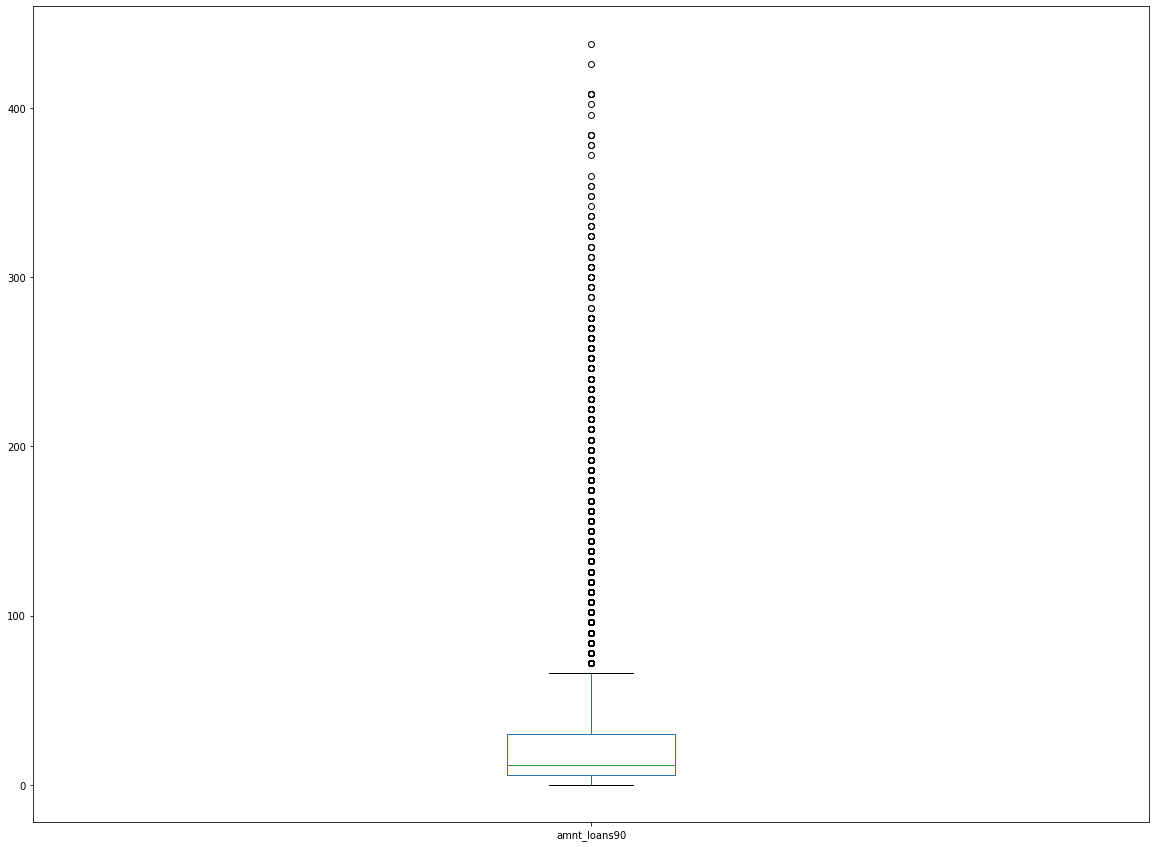

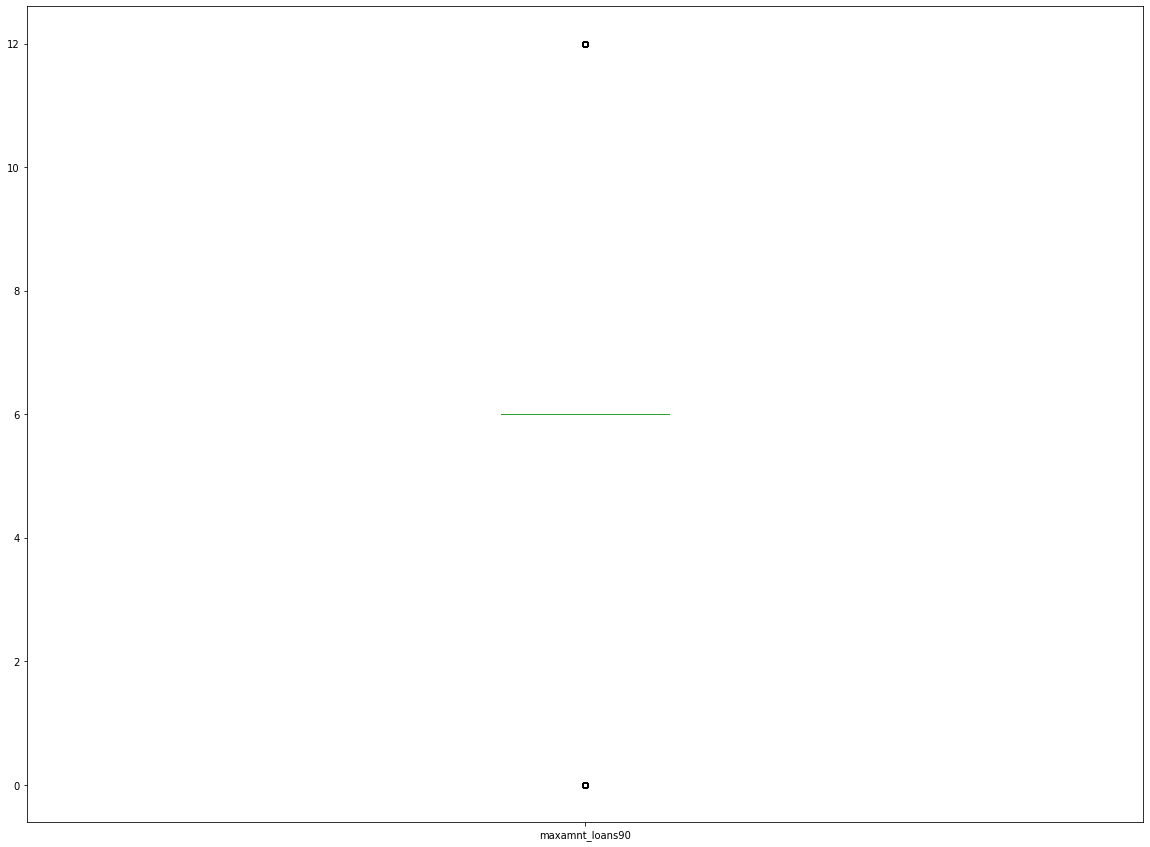

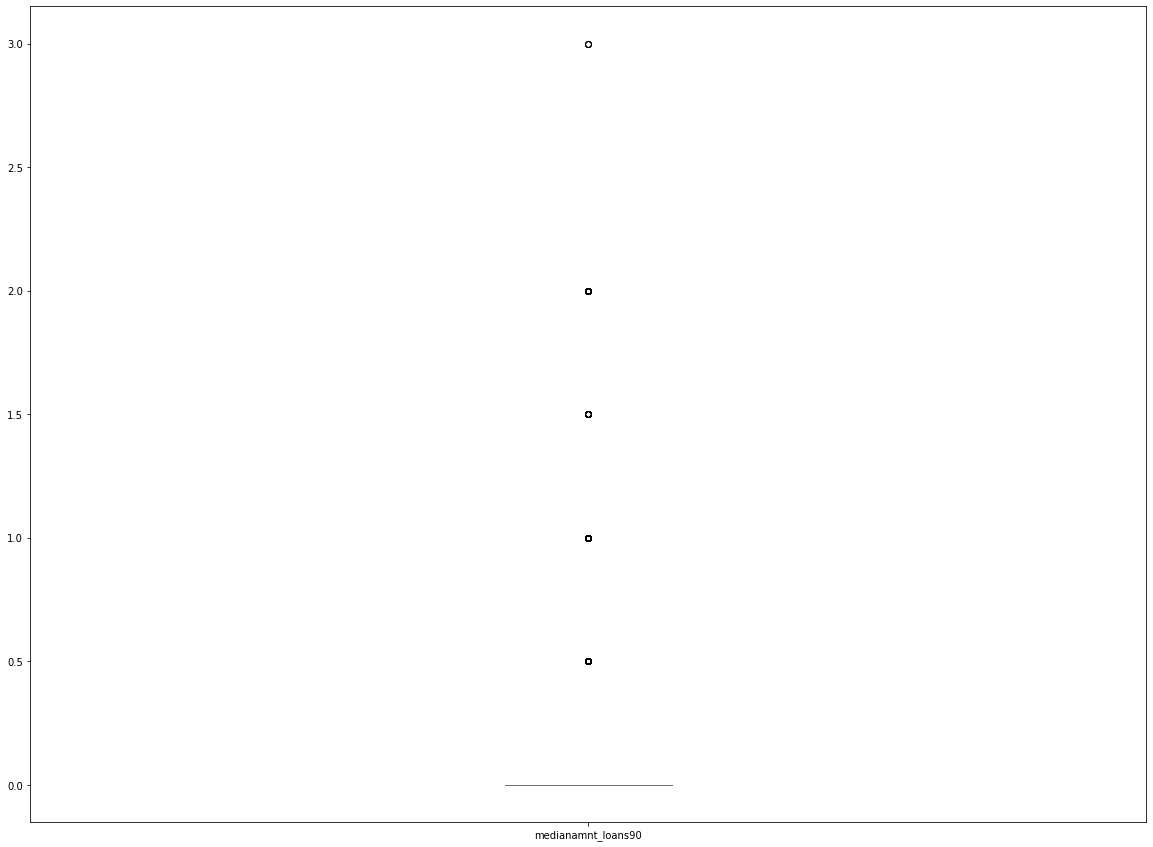

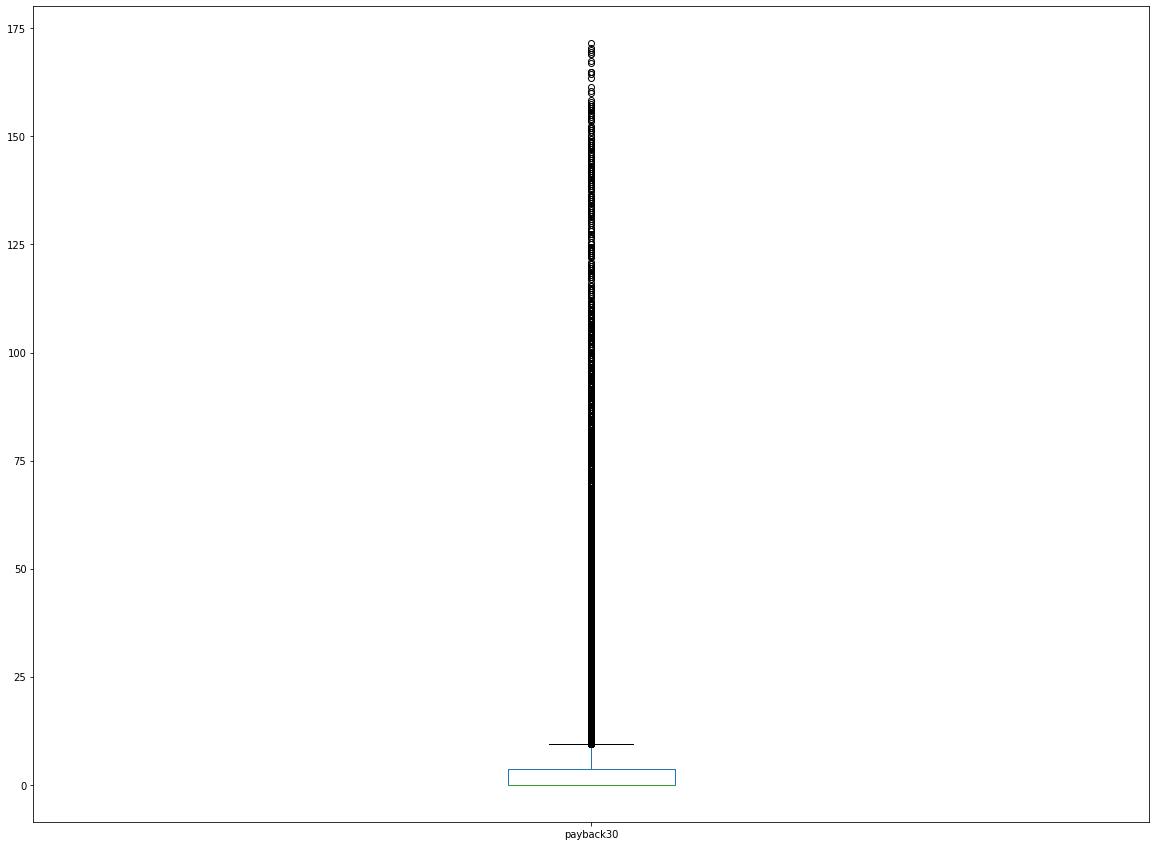

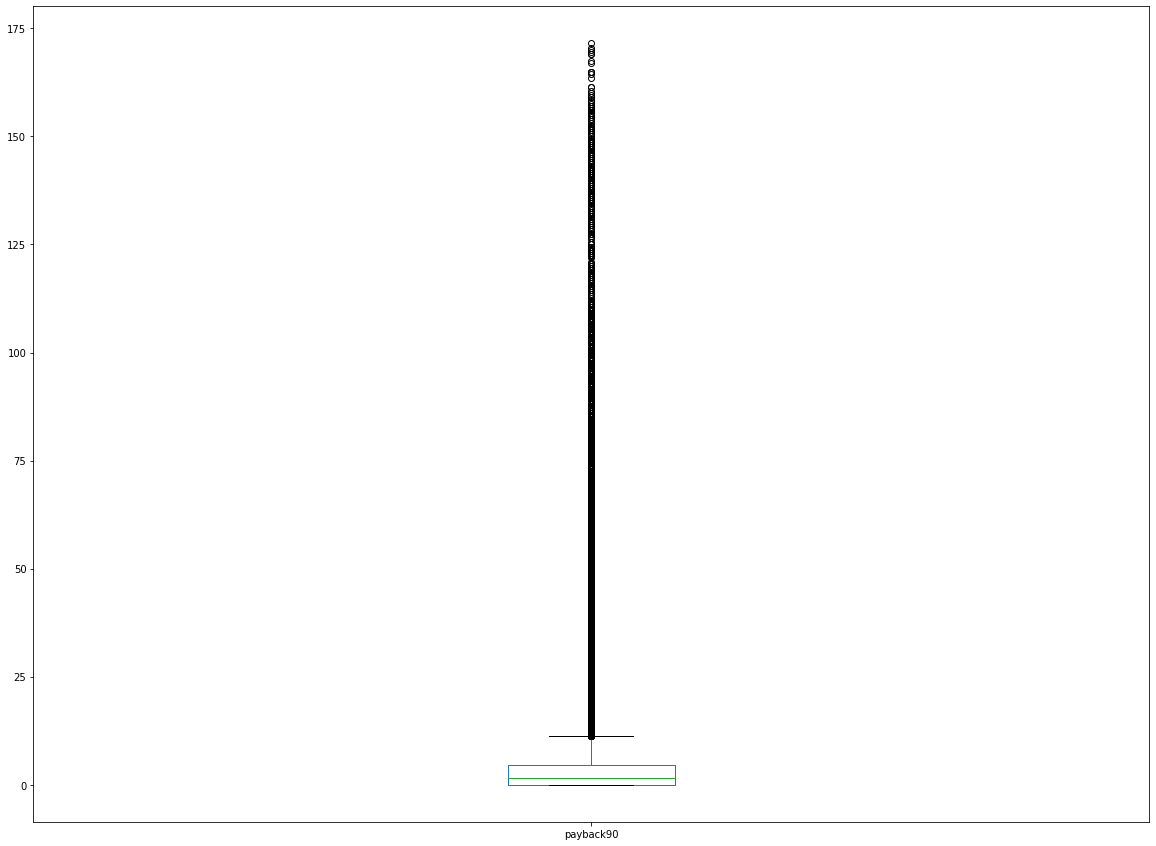

In [34]:
for i in df_o.columns:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [35]:
df_o.skew()

label                  -2.087816
daily_decr30            1.955018
daily_decr90            2.069899
rental30                2.182896
rental90                2.228026
last_rech_amt_ma        2.123872
cnt_ma_rech30           1.172535
sumamnt_ma_rech30       1.630531
medianamnt_ma_rech30    2.323886
cnt_ma_rech90           1.316931
fr_ma_rech90            1.983599
sumamnt_ma_rech90       1.703172
medianamnt_ma_rech90    2.371528
medianmarechprebal90    3.701551
cnt_loans30             1.463447
amnt_loans30            1.437650
medianamnt_loans30      5.349342
amnt_loans90            1.689485
maxamnt_loans90         2.671380
medianamnt_loans90      6.101962
payback30               2.605210
payback90               2.520806
dtype: float64

In [36]:
df_new = df_o

In [37]:
df_o.columns

Index(['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [38]:
cont = ['daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'payback30', 'payback90']

In [39]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new[cont] = power_transform(df_o[cont], method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = df_o.columns)

In [40]:
df_new[cont].skew()

daily_decr30           -1.873802
daily_decr90           -1.993720
rental30                0.204445
rental90                0.230526
last_rech_amt_ma       -0.184739
cnt_ma_rech30          -0.026795
sumamnt_ma_rech30      -0.457504
medianamnt_ma_rech30   -0.312192
cnt_ma_rech90          -0.030296
fr_ma_rech90            0.141719
sumamnt_ma_rech90      -0.365359
medianamnt_ma_rech90   -0.174301
medianmarechprebal90    0.994812
cnt_loans30             0.086830
amnt_loans30           -0.003025
amnt_loans90            0.122396
payback30               0.305664
payback90               0.207624
dtype: float64

In [41]:
cont1 = ['daily_decr30', 'daily_decr90', 'medianmarechprebal90']

In [42]:
df_new[cont1] = power_transform(df_new[cont1], method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = df_o.columns)

In [43]:
df_new[cont].skew()

daily_decr30           -0.531222
daily_decr90           -0.592474
rental30                0.204445
rental90                0.230526
last_rech_amt_ma       -0.184739
cnt_ma_rech30          -0.026795
sumamnt_ma_rech30      -0.457504
medianamnt_ma_rech30   -0.312192
cnt_ma_rech90          -0.030296
fr_ma_rech90            0.141719
sumamnt_ma_rech90      -0.365359
medianamnt_ma_rech90   -0.174301
medianmarechprebal90   -1.099212
cnt_loans30             0.086830
amnt_loans30           -0.003025
amnt_loans90            0.122396
payback30               0.305664
payback90               0.207624
dtype: float64

In [44]:
x = df_new.drop('label', axis = 1)
y = df_new['label']

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [46]:
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.naive_bayes import GaussianNB                      #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import roc_auc_score                       #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy

In [47]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.8789715514713071 on Random State 485


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

In [49]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [LR, nb, DTC, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))


LogisticRegression()
0.8789715514713071
[[ 1307  5639]
 [  551 43648]]
              precision    recall  f1-score   support

           0       0.70      0.19      0.30      6946
           1       0.89      0.99      0.93     44199

    accuracy                           0.88     51145
   macro avg       0.79      0.59      0.62     51145
weighted avg       0.86      0.88      0.85     51145

GaussianNB()
0.7482842897643953
[[ 5340  1606]
 [11268 32931]]
              precision    recall  f1-score   support

           0       0.32      0.77      0.45      6946
           1       0.95      0.75      0.84     44199

    accuracy                           0.75     51145
   macro avg       0.64      0.76      0.64     51145
weighted avg       0.87      0.75      0.78     51145

DecisionTreeClassifier()
0.8578160132955324
[[ 3688  3258]
 [ 4014 40185]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.50      6946
           1       0.93     

In [50]:
# Undersampling
count_class_1, count_class_0 = df_new.label.value_counts()

df_class_0 = df_new[df_new['label'] == 0]
df_class_1 = df_new[df_new['label'] == 1]

In [51]:
count_class_0, count_class_1

(23686, 146795)

In [52]:
df_class_0['label'].value_counts()

0    23686
Name: label, dtype: int64

In [53]:
df_class_1['label'].value_counts()

1    146795
Name: label, dtype: int64

In [54]:
df_class_1_under = df_class_1.sample(count_class_0)
df_class_1_under.shape

(23686, 22)

In [55]:
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under.label.value_counts())

Random under-sampling:
1    23686
0    23686
Name: label, dtype: int64


In [56]:
x = df_test_under.drop('label',axis='columns')
y = df_test_under['label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=485, stratify=y)

In [57]:
# Number of classes in training Data
y_train.value_counts()

1    18949
0    18948
Name: label, dtype: int64

In [58]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [LR, nb, DTC, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))


LogisticRegression()
0.7603166226912929
[[3654 1084]
 [1187 3550]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      4738
           1       0.77      0.75      0.76      4737

    accuracy                           0.76      9475
   macro avg       0.76      0.76      0.76      9475
weighted avg       0.76      0.76      0.76      9475

GaussianNB()
0.7494459102902374
[[3747  991]
 [1383 3354]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4738
           1       0.77      0.71      0.74      4737

    accuracy                           0.75      9475
   macro avg       0.75      0.75      0.75      9475
weighted avg       0.75      0.75      0.75      9475

DecisionTreeClassifier()
0.7415303430079155
[[3529 1209]
 [1240 3497]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      4738
           1       0.74      0.74      0

In [59]:
#Oversampling
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.label.value_counts())

Random over-sampling:
1    146795
0    146795
Name: label, dtype: int64


In [60]:
x = df_test_over.drop('label',axis='columns')
y = df_test_over['label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=485, stratify=y)

In [61]:
# Number of classes in training Data
y_train.value_counts()

1    117436
0    117436
Name: label, dtype: int64

In [62]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [LR, nb, DTC, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))


LogisticRegression()
0.7645355768248238
[[22871  6488]
 [ 7338 22021]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     29359
           1       0.77      0.75      0.76     29359

    accuracy                           0.76     58718
   macro avg       0.76      0.76      0.76     58718
weighted avg       0.76      0.76      0.76     58718

GaussianNB()
0.7528355870431555
[[23319  6040]
 [ 8473 20886]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     29359
           1       0.78      0.71      0.74     29359

    accuracy                           0.75     58718
   macro avg       0.75      0.75      0.75     58718
weighted avg       0.75      0.75      0.75     58718

DecisionTreeClassifier()
0.9505773357403181
[[29290    69]
 [ 2833 26526]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     29359
           1       1.00     

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [65]:
search = GridSearchCV(estimator = LR, param_grid = space, cv = 3)

In [67]:
search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [68]:
search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [70]:
glr = LogisticRegression(C = 0.01, penalty = 'l2', solver = 'newton-cg')
glr.fit(x_train, y_train)
predglr = glr.predict(x_test)
print (accuracy_score(y_test, predglr))
print (confusion_matrix(y_test, predglr))
print (classification_report(y_test, predglr))

0.7649613406451173
[[22770  6589]
 [ 7212 22147]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     29359
           1       0.77      0.75      0.76     29359

    accuracy                           0.76     58718
   macro avg       0.77      0.76      0.76     58718
weighted avg       0.77      0.76      0.76     58718



In [72]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator = nb, param_grid = params_NB, cv = 3) 
gs_NB.fit(x_train, y_train)
gs_NB.best_params_

{'var_smoothing': 0.005336699231206307}

In [74]:
gnb = GaussianNB(var_smoothing = 0.005336699231206307)
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
print (accuracy_score(y_test, predgnb))
print (confusion_matrix(y_test, predgnb))
print (classification_report(y_test, predgnb))

0.7549644061446235
[[23229  6130]
 [ 8258 21101]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     29359
           1       0.77      0.72      0.75     29359

    accuracy                           0.75     58718
   macro avg       0.76      0.75      0.75     58718
weighted avg       0.76      0.75      0.75     58718



In [76]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_gscv = GridSearchCV(DTC, param_grid, cv=3)
dtree_gscv.fit(x_train, y_train)
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [77]:
gdt = DecisionTreeClassifier(criterion = 'gini', max_depth = 14)
gdt.fit(x_train, y_train)
predgdt = gdt.predict(x_test)
print (accuracy_score(y_test, predgdt))
print (confusion_matrix(y_test, predgdt))
print (classification_report(y_test, predgdt))

0.8563983786913724
[[25984  3375]
 [ 5057 24302]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     29359
           1       0.88      0.83      0.85     29359

    accuracy                           0.86     58718
   macro avg       0.86      0.86      0.86     58718
weighted avg       0.86      0.86      0.86     58718



In [78]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rfc.fit(x_train, y_train)
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [81]:
grfc = RandomForestClassifier(random_state = maxRS, criterion = 'gini', max_depth = 8, max_features = 'auto', n_estimators = 500)
grfc.fit(x_train, y_train)
predrf = grfc.predict(x_test)
print (accuracy_score(y_test, predrf))
print (confusion_matrix(y_test, predrf))
print (classification_report(y_test, predrf))

0.79662113832215
[[23487  5872]
 [ 6070 23289]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     29359
           1       0.80      0.79      0.80     29359

    accuracy                           0.80     58718
   macro avg       0.80      0.80      0.80     58718
weighted avg       0.80      0.80      0.80     58718



In [82]:
import pickle

filename = 'MicroCreditDefaultDTC.pkl'
pickle.dump(gdt, open(filename, 'wb'))

# Conclusion

In [83]:
loaded_model = pickle.load(open('MicroCreditDefaultDTC.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8563983786913724


In [85]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predgdt[:]], index = ['Predicted', 'Original'])

In [86]:
conclusion

0      1      2      3      4      5      6      7      8      \
Predicted      0      0      0      0      0      0      0      1      0   
Original       0      0      0      0      0      0      0      1      0   

           9      ...  58708  58709  58710  58711  58712  58713  58714  58715  \
Predicted      0  ...      1      0      1      0      0      0      1      0   
Original       0  ...      1      0      1      0      0      0      1      0   

           58716  58717  
Predicted      1      0  
Original       1      0  

[2 rows x 58718 columns]